#1. Разведочный анализ данных

##Введение

Для классификации был выбран набор данных для моделирования оттока клиентов телекоммуникационной компании. По сути, это задача бинарной классификации — уйдёт ли от нас клиент или же нет. В качестве основной метрики была выбрана $Area~Under~Curve~(AUC)~Receiver~Operating~Characteristic~(ROC)$, но также мы будем обращаться к $AUC~Precision-Recall~(PR)$ и $Average~Precision~(AP)$.

##Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import (roc_auc_score, roc_curve, auc, precision_recall_curve,
                             PrecisionRecallDisplay, average_precision_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [ ]:
data = pd.read_csv('./train.csv')
data

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0               55            19.50    1026.35    Male                0   
1               72            25.85     1872.2    Male                0   
2                1            75.90       75.9    Male                0   
3               32            79.30       2570  Female                1   
4               60           115.25    6758.45  Female                0   
...            ...              ...        ...     ...              ...   
5277             3            30.40      82.15    Male                0   
5278            50            44.45    2188.45    Male                0   
5279             1            55.05      55.05    Male                0   
5280            29            76.00    2215.25  Female                0   
5281            19            75.90     1375.6  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0           Yes      Yes             Yes                      No   
1           Yes       No             Yes                     Yes   
2            No       No             Yes                      No   
3           Yes       No             Yes                     Yes   
4           Yes      Yes             Yes                     Yes   
...         ...      ...             ...                     ...   
5277         No       No              No        No phone service   
5278        Yes       No              No        No phone service   
5279         No       No             Yes                      No   
5280         No       No             Yes                     Yes   
5281         No      Yes             Yes                     Yes   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
0                    No      No internet service  No internet service   
1                    No      No internet service  No internet service   
2           Fiber optic                       No                   No   
3           Fiber optic                       No                   No   
4           Fiber optic                      Yes                  Yes   
...                 ...                      ...                  ...   
5277                DSL                       No                   No   
5278                DSL                      Yes                   No   
5279                DSL                       No                   No   
5280        Fiber optic                       No                   No   
5281                DSL                      Yes                  Yes   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
0     No internet service  No internet service  No internet service   
1     No internet service  No internet service  No internet service   
2                      No                  Yes                   No   
3                     Yes                   No                   No   
4                     Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
5277                   No                  Yes                   No   
5278                   No                  Yes                  Yes   
5279                  Yes                  Yes                   No   
5280                   No                   No                   No   
5281                   No                  Yes                  Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
0     No internet service         One year                 No   
1     No internet service         Two year                 No   
2                      No   Month-to-month                Yes   
3                      No   Month-to-month                 No   
4                     Yes         Two year                 No   
...                   ...              ...                ...   
5277                   No   Month-to-month                 No   
5278                   No         One 

In [ ]:
data.describe()

ClientPeriod  MonthlySpending  IsSeniorCitizen        Churn
count   5282.000000      5282.000000      5282.000000  5282.000000
mean      32.397009        64.924754         0.159409     0.262022
std       24.550326        30.176464         0.366092     0.439776
min        0.000000        18.250000         0.000000     0.000000
25%        9.000000        35.462500         0.000000     0.000000
50%       29.000000        70.400000         0.000000     0.000000
75%       55.000000        90.050000         0.000000     1.000000
max       72.000000       118.750000         1.000000     1.000000

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.isna().mean()

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

In [ ]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [ ]:
data.TotalSpent.dtype

dtype('O')

In [ ]:
data.TotalSpent.sort_values(ascending=True).values

array([' ', ' ', ' ', ..., '997.65', '998.1', '999.9'], dtype=object)

In [ ]:
data.replace(' ', 1, inplace=True)
data['TotalSpent'] = data.TotalSpent.fillna(0).astype(float)

In [ ]:
data.nunique()

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4978
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64

##Графики распределения значений признаков и целевой переменной

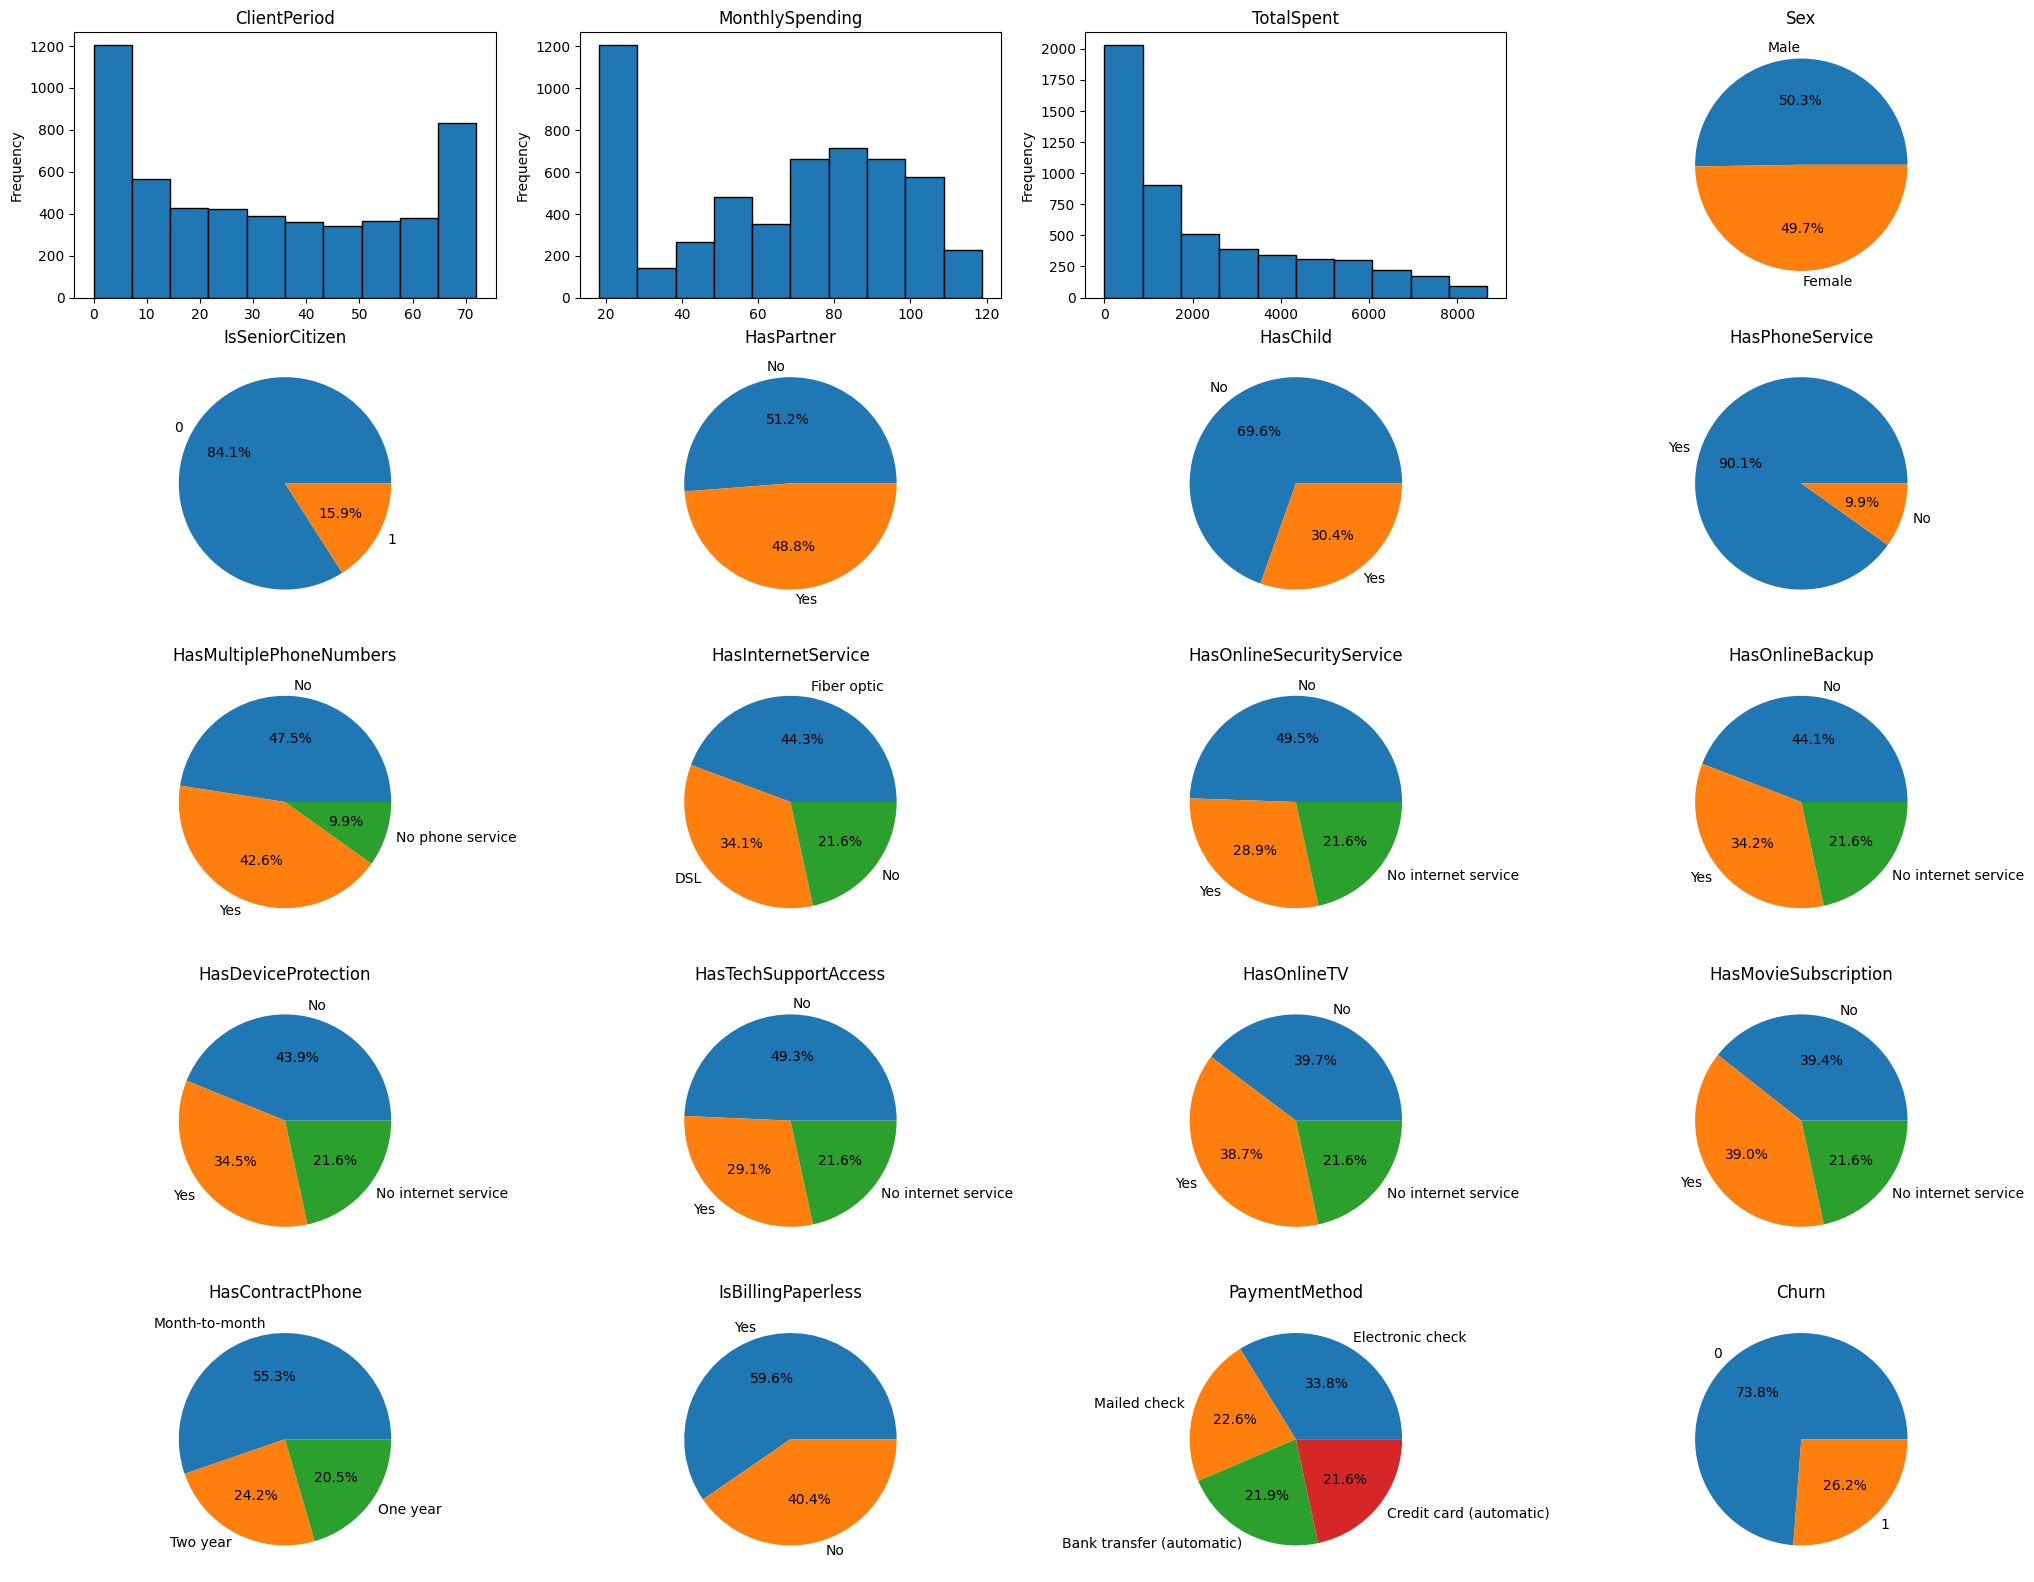

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
    else:
        data[col].plot(kind="hist", ec="black", ax=ax)

В нашем наборе, по сути, 3 числовых признака ($int64$ и $float64$ для колонки $«Monthly~Spending»$), все остальные — категориальные, целевая переменная ($«Churn»$) числовая бинарная. Большинство категориальных признаков имеют 3 уникальных значения, некоторые имеют 2 значения и один — 4. В нашем наборе данных клиентов, оставшихся с компанией, почти в 3 раза больше, чем ушедших, что говорит о несбалансированности целевой переменной (эту проблему мы попробуем решить чуть позже).

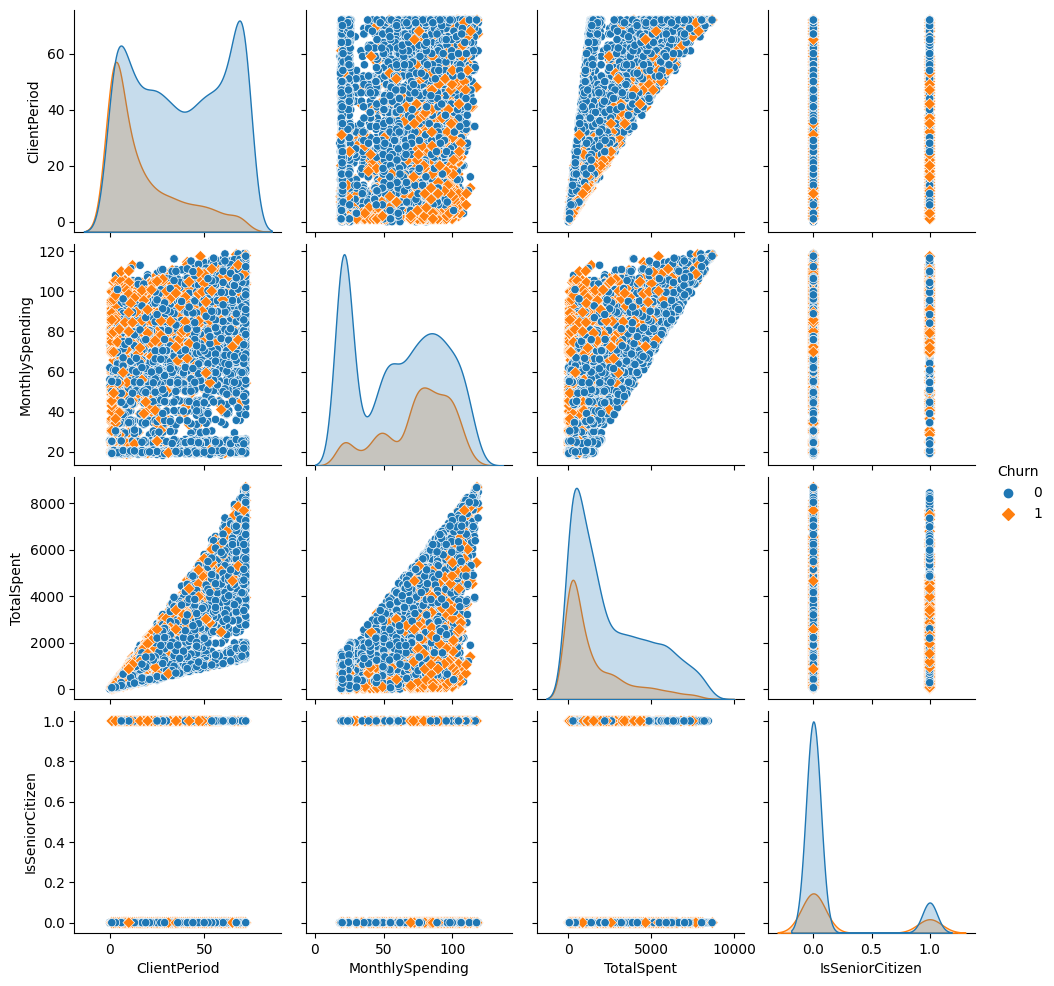

In [ ]:
sns.pairplot(data, hue='Churn', markers=["o", "D"])

Распределение числовых признаков в целом поддаётся пониманию:

1.   признак $«Total~Spent»$ имеет распределение, близкое к лог-нормальному;
2.   $«Monthly~Spending»$ — издалека напоминает нормальное для значений целевой переменной $1$, а для значений целевой переменной $0$ — нормальное распределение с двумя пиками;
3.   $«Client~Period»$ — что-то близкое к смещённому нормальному распределению для значений целевой переменной $1$, а для значений целевой переменной $0$ — нормальное распределение с двумя пиками.

Признак $«Is~Senior~Citizen»$ — бинарный.

In [ ]:
num_cols = data.nunique()[data.nunique() > 50].index.tolist()
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

In [ ]:
target = data.Churn
data.drop(columns='Churn', inplace=True)
bin_cols = data.nunique()[(data.nunique() == 2)].index.tolist()
bin_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'IsBillingPaperless']

In [ ]:
cat_cols = list(set(data.nunique().index.tolist()) - set(bin_cols + num_cols))
cat_cols

['HasOnlineSecurityService',
 'HasInternetService',
 'HasTechSupportAccess',
 'HasContractPhone',
 'HasMultiplePhoneNumbers',
 'HasDeviceProtection',
 'HasOnlineBackup',
 'HasOnlineTV',
 'PaymentMethod',
 'HasMovieSubscription']

In [ ]:
categ_cols = bin_cols + cat_cols
data[bin_cols] = data[bin_cols].apply(LabelEncoder().fit_transform)
X = pd.concat((data[bin_cols + num_cols], pd.get_dummies(data[cat_cols])), axis = 1)
X

Sex  IsSeniorCitizen  HasPartner  HasChild  HasPhoneService  \
0       1                0           1         1                1   
1       1                0           1         0                1   
2       1                0           0         0                1   
3       0                1           1         0                1   
4       0                0           1         1                1   
...   ...              ...         ...       ...              ...   
5277    1                0           0         0                0   
5278    1                0           1         0                0   
5279    1                0           0         0                1   
5280    0                0           0         0                1   
5281    0                0           0         1                1   

      IsBillingPaperless  ClientPeriod  MonthlySpending  TotalSpent  \
0                      0            55            19.50     1026.35   
1                      0            72            25.85     1872.20   
2                      1             1            75.90       75.90   
3                      0            32            79.30     2570.00   
4                      0            60           115.25     6758.45   
...                  ...           ...              ...         ...   
5277                   0             3            30.40       82.15   
5278                   1            50            44.45     2188.45   
5279                   0             1            55.05       55.05   
5280                   1            29            76.00     2215.25   
5281                   1            19            75.90     1375.60   

      HasOnlineSecurityService_No  ...  HasOnlineTV_No  \
0                               0  ...               0   
1                               0  ...               0   
2                               1  ...               1   
3                               1  ...               1   
4                               0  ...               0   
...                           ...  ...             ...   
5277                            1  ...               1   
5278                            0  ...               0   
5279                            1  ...               1   
5280                            1  ...               1   
5281                            0  ...               0   

      HasOnlineTV_No internet service  HasOnlineTV_Yes  \
0                                   1                0   
1                                   1                0   
2                                   0                0   
3                                   0                0   
4                                   0                1   
...                               ...              ...   
5277                                0                0   
5278                                0                1   
5279                                0                0   
5280                                0                0   
5281                                0                1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
5277                                        0   
5278                                        1   
5279                                        0   
5280                                        0   
5281                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               0   
1                                         1                               0   
2                                         0                               1   
3                        

##Корреляционный анализ

In [ ]:
import statsmodels.api as sm

np.random.seed(42)

#X = sm.add_constant(X)

# Создаем модель OLS (Ordinary Least Squares) и подгоняем ее
model = sm.OLS(target, X)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     89.62
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:57:10   Log-Likelihood:                -2281.7
No. Observations:                5282   AIC:                             4611.
Df Residuals:                    5258   BIC:                             4769.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Вариацией признаков объясняется $28,2\%$ ($R-squared$) дисперсии целевой переменной, т.е. оттока клиентов. Т.е. представленные признаки имеют некоторое влияние на формирование целевой переменной.

Отметим, что уклон ($coef$) для всех признаков в целом невысокий. Максимальные значения можно отметить у 4-х признаков: у 3-х признаков ($«Has~Online~TV~-~Yes»$, $«Has~Contract~Phone~-~Month~to~month»$, $«Has~Movie~Subscription~-~Yes»$) около $0.1$, а у одного ($«Has~Internet~Service~-~Fiber~optic»$) — $0.186$. Такие значения говорят о том, что при увеличении данных признаков на одну единицу, значение целевой переменной увеличится на $0.1$ или $0.186$, соответственно.

Значения уклона для всех признаков лежат на отрезке ${\mathbb{E}[x]±2σ}$. В целом оценка наибольших значений уклонов, представленных в таблице, по сути, представляет собой математические ожидания их значений из этого интервала. Однако разброс вполне солидный. Зачастую, чем меньше уклон по абсолютной величине, тем более уверенно определено его значение (как будто неудивительно), но это справедливо не во всех случаях.

Также у признаков, которые имеют минимальные значения по показателю уклона довольно высокое $p$-значение ($P>[t]$), намного выше обычного порога значимости в $0.05$, что подкрепляет предположение о незначительном вкладе в формировании значения целевой переменной (нулевая гипотеза состоит в том, что коэффициент уклона вносит незначительный вклад). По этому критерию особое внимание привлекают признаки: $«Total~Spent»$, $«Client~Period»$ — они имеют близкие к нулю значения, а также характеризуются и низкими значениями уклона, что не позволяет принять гипотезу о незначительном вкладе данных признаков в значение целевой переменной.

Также отметим потенциальную проблему мультиколлинеарности, поскольку имеем довольное число обусловленности ($Cond. No.$), равное $1.16e+16$, и наименьшее собственное значение матрицы почти нулевое — $4.07e-22$. Значение коэффициента $Durbin-Watson$ между $1$ и $2$ или $1.5$ и $2.5$ ($1.8$ в нашем случае) позволяет принять гипотезу о гомоскедастичности (постоянство условной дисперсии). Значения статистик $Jarque-Bera$ ($JB$) и $Prob(JB)$ позволяют сделать предположение о том, что наши остатки (остатки необъясненной дисперсии) не подчиняются нормальному распределению, об этом также говорят значения перекоса ($Skew$, не равно $0$) и эксцесс ($Kurtosis$, не равно $3$). В нашем случае $Prob~(F-statistic)$ равна нулю, что позволяет отвергнуть нулевую гипотезу об отсутствии корреляции между признаками и целевой переменной.

##Корреляция между признаками и целевой переменной

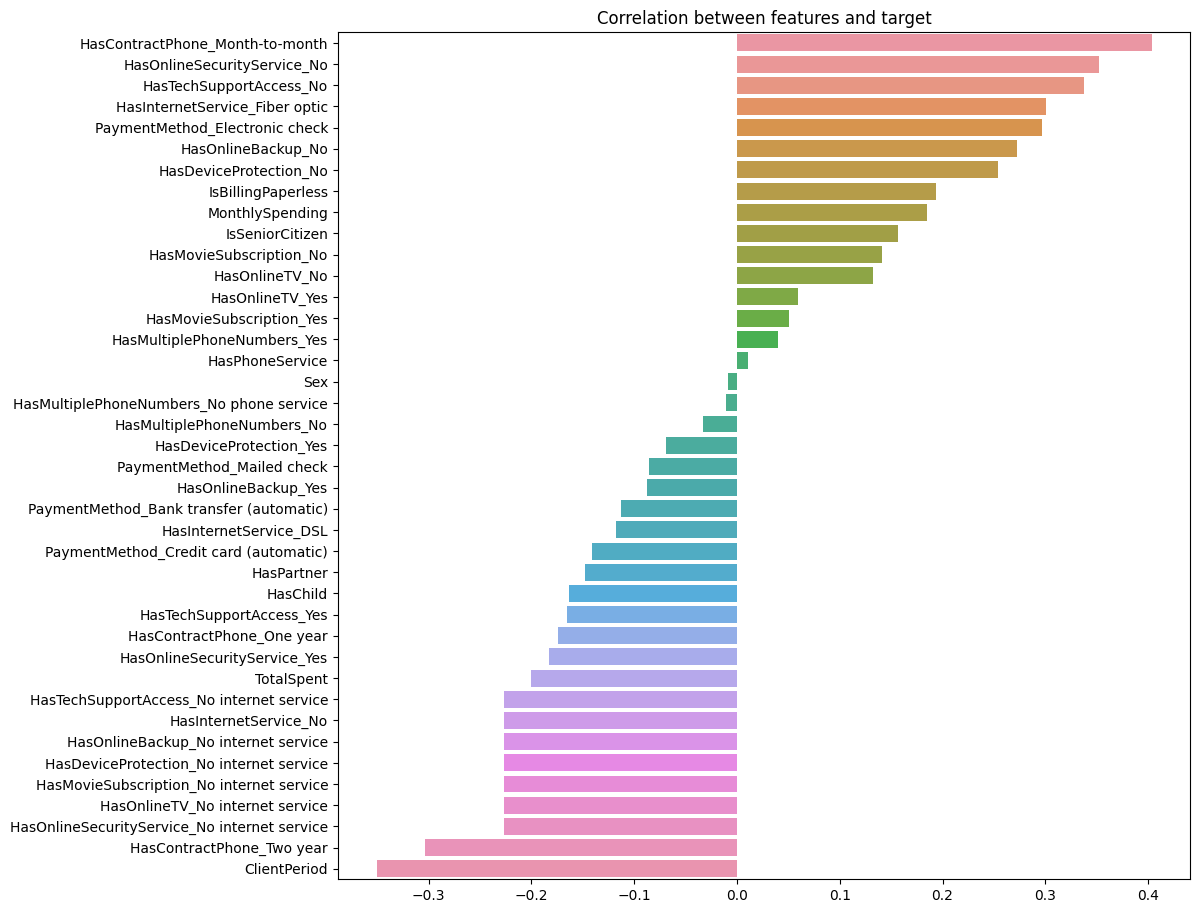

In [ ]:
fig, ax = plt.subplots(1, figsize=(11, 11))
df = pd.DataFrame(X.corrwith(target).sort_values(ascending=False)).transpose()
sns.barplot(data=df, orient='h')
ax.set(title='Correlation between features and target');

In [ ]:
X.corrwith(target).sort_values(ascending=False)

HasContractPhone_Month-to-month                 0.403429
HasOnlineSecurityService_No                     0.352716
HasTechSupportAccess_No                         0.337312
HasInternetService_Fiber optic                  0.300399
PaymentMethod_Electronic check                  0.296715
HasOnlineBackup_No                              0.272217
HasDeviceProtection_No                          0.254124
IsBillingPaperless                              0.194040
MonthlySpending                                 0.184769
IsSeniorCitizen                                 0.156872
HasMovieSubscription_No                         0.140742
HasOnlineTV_No                                  0.131984
HasOnlineTV_Yes                                 0.059193
HasMovieSubscription_Yes                        0.050521
HasMultiplePhoneNumbers_Yes                     0.039572
HasPhoneService                                 0.010849
Sex                                            -0.008325
HasMultiplePhoneNumbers_No phon

In [ ]:
abs(X.corrwith(target).sort_values(ascending=False)).mean()

0.178228010706884

Преобразовав все категориальные признаки к числовым, была оценена корреляция между признаками и целевой в переменной. В целом, отметим, что наибольшее по модулю значение доходит до $0.4$, но в среднем около $0.2$. Заметим, что признаки $«Sex»$, $«Has Phone Service»$, и $«Has~Multiple~Phone~Numbers~-~No~phone~service»$ характеризуются очень низкими, близкими к нулю, значениями. Вообще говоря, это не означает, что данные признаки нам точно не нужны, но в дальнейшем можно будет попробовать исключить их из рассмотрения.

##Корреляционная матрица признаков

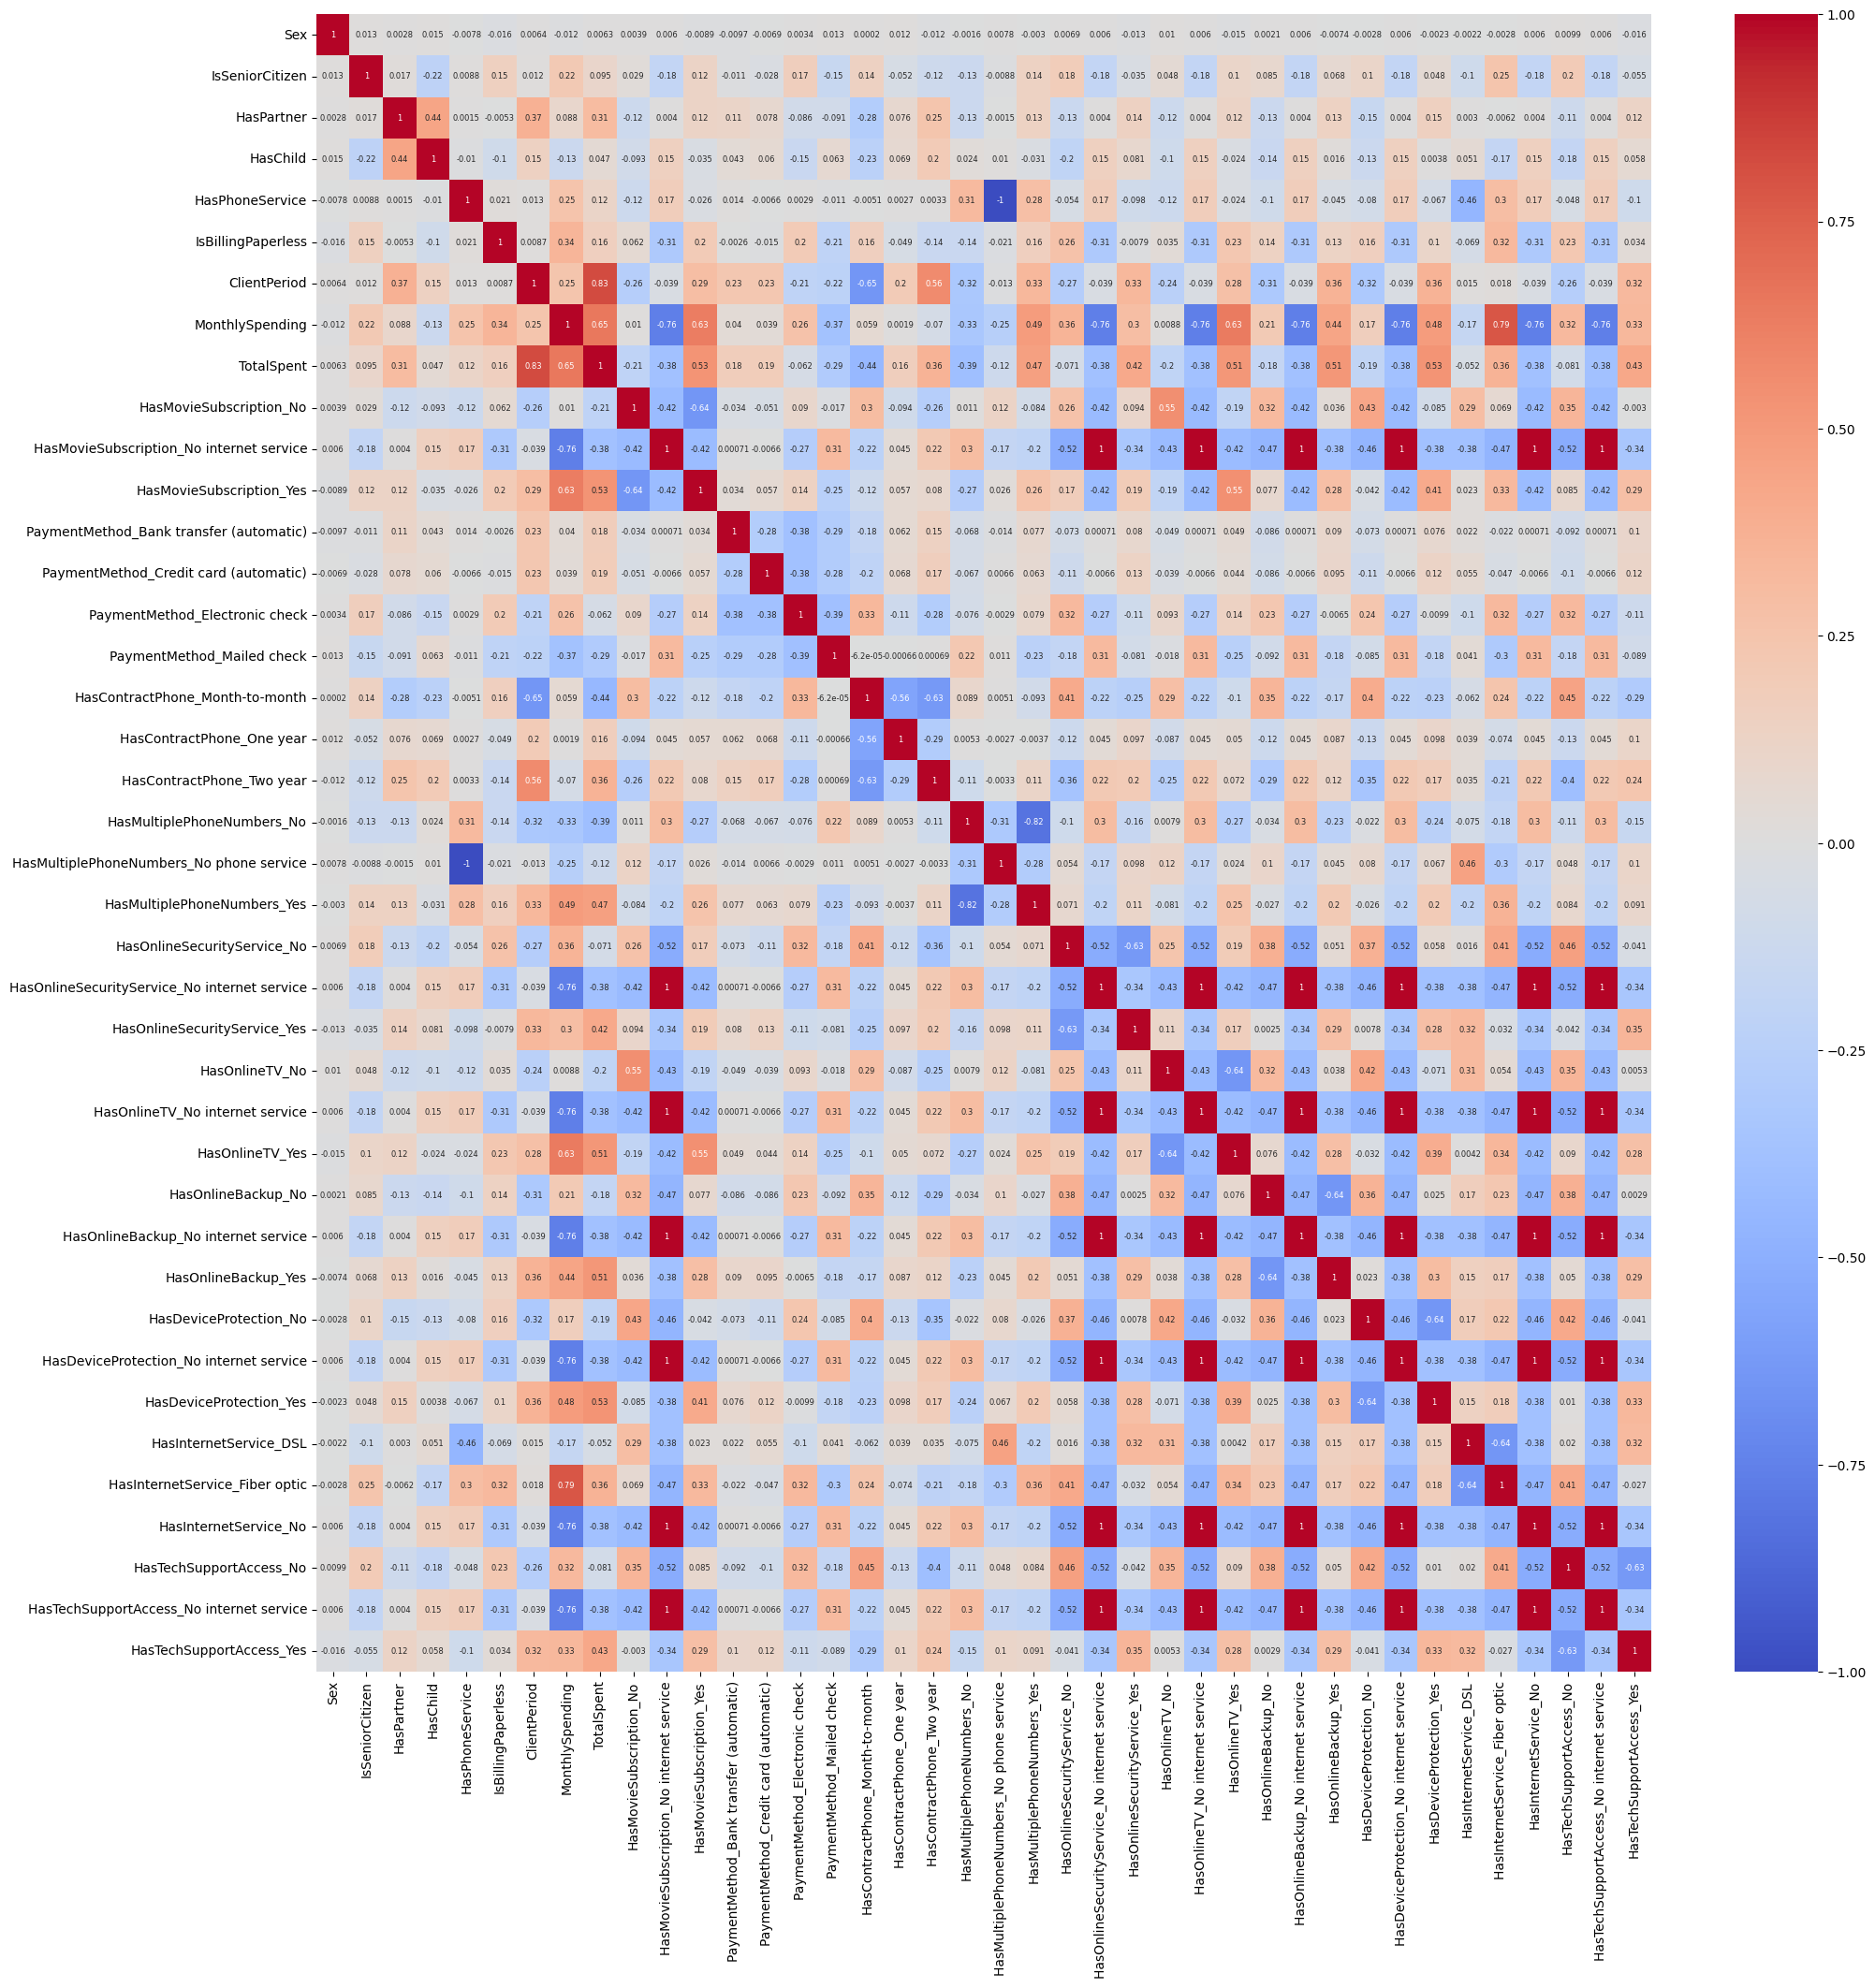

In [ ]:
fig, ax = plt.subplots(1, figsize=(23, 23))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 6})
plt.show()

Построив матрицы корреляций признаков, можно отметить, что все колонки с приставкой $«No~internet~service»$ имеют корреляцию, равную $1.0$, со всеми признаками с аналогичными приставками и признаком $«Has~Internet~Service~-~No»$. Исходя из этого в будущем стоит оставить только признак $«Has~Internet~Service~-~No»$, а остальные признаки с приставкой $«No~internet~service»$ исключить из рассмотрения. То же касается признака $«Has~Multiple~Phone~Numbers~-~No~phone~service»$, потому что у нас имеется бинарный признак $«Has~phone~service»$.

Также стоит отметить высокую корреляцию признаков $«Total~Spent»$ и $«Client~Period»$ более $0.8$, а также обратную корреляцию между $«Has~Multiple~Phone~Numbers~-~Yes»$ и $«Has Multiple Phone Numbers~-~No»$ более $0.8$ по модулю. Последний факт говорит о том, что большинство клиентов, не имеющих несколько телефонных номеров, имеют один номер. Однако это относится не ко всем клиентам, т.к. данный категориальный признак изначально содержал ещё одно значение — $«No~phone~service»$. В целом оба этих обратно коррелирующих признака не сильно важны для предсказания целевой переменной, поэтому при желании от них в дальнейшем тоже можно избавиться или оставить $«Has~Multiple~Phone~Numbers~-~Yes»$, т.к. он оказывает чуть более значимое влияние на предсказание.

Также оказывается, что достаточно высокую обратную корреляцию имеют признаки $«Monthly~Spending»$, признаки с приставкой $«No~internet~service»$ и признак $«Has~Internet~Service~-~No»$ около $0.76$ по модулю, а также прямую корреляцию с признаком $«Has~Internet~Service~-~Fiber~optic»$ примерно $0.79$, что не выглядит нелогично. Ни один из признаков группы $«Has~Internet~Service»$ и $«Monthly~Spending»$ удалять нецелесообразно, т.к. они оказывают весомый и, самое важное, разный (по значению коэффициента корреляции) вклад в предсказание целевой переменной. А вот признаки с приставкой $«No~internet~service»$ хоть и оказывают весомый вклад, но этот вклад равен вкладу признака $«Has~Internet~Service~-~No»$, который целесообразнее всего оставить. Поэтому это ещё один аргумент за то, чтобы избавиться от признаков с приставкой $«No~internet~service»$.

In [ ]:
X.corr().iloc[:, [x for x in range(0, 10)]]

Sex  IsSeniorCitizen  \
Sex                                           1.000000         0.013207   
IsSeniorCitizen                               0.013207         1.000000   
HasPartner                                    0.002780         0.016764   
HasChild                                      0.014605        -0.217007   
HasPhoneService                              -0.007771         0.008763   
IsBillingPaperless                           -0.015698         0.151964   
ClientPeriod                                  0.006370         0.011561   
MonthlySpending                              -0.011778         0.215456   
TotalSpent                                    0.006341         0.094639   
HasMovieSubscription_No                       0.003862         0.028863   
HasMovieSubscription_No internet service      0.005958        -0.180831   
HasMovieSubscription_Yes                     -0.008897         0.123656   
HasTechSupportAccess_No                       0.009920         0.198516   
HasTechSupportAccess_No internet service      0.005958        -0.180831   
HasTechSupportAccess_Yes                     -0.016317        -0.054669   
HasContractPhone_Month-to-month               0.000198         0.143054   
HasContractPhone_One year                     0.012321        -0.051876   
HasContractPhone_Two year                    -0.011835        -0.117132   
HasInternetService_DSL                       -0.002214        -0.102503   
HasInternetService_Fiber optic               -0.002824         0.247603   
HasInternetService_No                         0.005958        -0.180831   
HasOnlineTV_No                                0.010010         0.047982   
HasOnlineTV_No internet service               0.005958        -0.180831   
HasOnlineTV_Yes                              -0.015094         0.104599   
HasDeviceProtection_No                       -0.002778         0.103860   
HasDeviceProtection_No internet service       0.005958        -0.180831   
HasDeviceProtection_Yes                      -0.002257         0.048119   
HasOnlineSecurityService_No                   0.006874         0.180638   
HasOnlineSecurityService_No internet service  0.005958        -0.180831   
HasOnlineSecurityService_Yes                 -0.012985        -0.035052   
HasOnlineBackup_No                            0.002150         0.084633   
HasOnlineBackup_No internet service           0.005958        -0.180831   
HasOnlineBackup_Yes                          -0.007417         0.068258   
PaymentMethod_Bank transfer (automatic)      -0.009673        -0.010942   
PaymentMethod_Credit card (automatic)        -0.006924        -0.027889   
PaymentMethod_Electronic check                0.003415         0.169778   
PaymentMethod_Mailed check                    0.012525        -0.153740   
HasMultiplePhoneNumbers_No                   -0.001634        -0.128706   
HasMultiplePhoneNumbers_No phone service      0.007771        -0.008763   
HasMultiplePhoneNumbers_Yes                  -0.003035         0.135267   

                                              HasPartner  HasChild  \
Sex                                             0.002780  0.014605   
IsSeniorCitizen                                 0.016764 -0.217007   
HasPartner                                      1.000000  0.442530   
HasChild                                        0.442530  1.000000   
HasPhoneService                                 0.001508 -0.010475   
IsBillingPaperless                             -0.005293 -0.100777   
ClientPeriod                                    0.370314  0.146120   
MonthlySpending                                 0.087652 -0.125682   
TotalSpent                                      0.308734  0.047243   
HasMovieSubscription_No                        -0.121143 -0.093267   
HasMovieSubscription_No internet service        0.003981  0.152092   
HasMovieSubscription_Yes                        0.118002 -0.034888   
HasTechSupportAccess_No                        -0.113977 -0.17760

In [ ]:
X.corr().iloc[:, [x for x in range(10, 20)]]

HasOnlineSecurityService_No internet service  \
Sex                                                                               0.005958   
IsSeniorCitizen                                                                  -0.180831   
HasPartner                                                                        0.003981   
HasChild                                                                          0.152092   
HasPhoneService                                                                   0.173644   
IsBillingPaperless                                                               -0.311281   
ClientPeriod                                                                     -0.038681   
MonthlySpending                                                                  -0.761773   
TotalSpent                                                                       -0.375166   
HasOnlineSecurityService_No                                                      -0.519184   
HasOnlineSecurityService_No internet service                                      1.000000   
HasOnlineSecurityService_Yes                                                     -0.335046   
PaymentMethod_Bank transfer (automatic)                                           0.000708   
PaymentMethod_Credit card (automatic)                                            -0.006599   
PaymentMethod_Electronic check                                                   -0.272103   
PaymentMethod_Mailed check                                                        0.313550   
HasContractPhone_Month-to-month                                                  -0.221852   
HasContractPhone_One year                                                         0.044764   
HasContractPhone_Two year                                                         0.215264   
HasOnlineTV_No                                                                   -0.426263   
HasOnlineTV_No internet service                                                   1.000000   
HasOnlineTV_Yes                                                                  -0.416721   
HasMultiplePhoneNumbers_No                                                        0.304537   
HasMultiplePhoneNumbers_No phone service                                         -0.173644   
HasMultiplePhoneNumbers_Yes                                                      -0.202852   
HasOnlineBackup_No                                                               -0.466706   
HasOnlineBackup_No internet service                                               1.000000   
HasOnlineBackup_Yes                                                              -0.378841   
HasInternetService_DSL                                                           -0.377409   
HasInternetService_Fiber optic                                                   -0.468321   
HasInternetService_No                                                             1.000000   
HasDeviceProtection_No                                                           -0.464024   
HasDeviceProtection_No internet service                                           1.000000   
HasDeviceProtection_Yes                                                          -0.381233   
HasTechSupportAccess_No                                                          -0.517613   
HasTechSupportAccess_No internet service                                          1.000000   
HasTechSupportAccess_Yes                                                         -0.336280   
HasMovieSubscription_No                                                          -0.423237   
HasMovieSubscription_No internet service                                          1.000000   
HasMovieSubscription_Yes                                                         -0.419721   

                                              HasOnlineSecurityService_Yes  \
Sex                                                              -0.012985   
IsSeniorCitizen                    

In [ ]:
X.corr().iloc[:, [x for x in range(20, 30)]]

HasInternetService_No  \
Sex                                                        0.005958   
IsSeniorCitizen                                           -0.180831   
HasPartner                                                 0.003981   
HasChild                                                   0.152092   
HasPhoneService                                            0.173644   
IsBillingPaperless                                        -0.311281   
ClientPeriod                                              -0.038681   
MonthlySpending                                           -0.761773   
TotalSpent                                                -0.375166   
HasMovieSubscription_No                                   -0.423237   
HasMovieSubscription_No internet service                   1.000000   
HasMovieSubscription_Yes                                  -0.419721   
HasTechSupportAccess_No                                   -0.517613   
HasTechSupportAccess_No internet service                   1.000000   
HasTechSupportAccess_Yes                                  -0.336280   
HasContractPhone_Month-to-month                           -0.221852   
HasContractPhone_One year                                  0.044764   
HasContractPhone_Two year                                  0.215264   
HasInternetService_DSL                                    -0.377409   
HasInternetService_Fiber optic                            -0.468321   
HasInternetService_No                                      1.000000   
HasOnlineTV_No                                            -0.426263   
HasOnlineTV_No internet service                            1.000000   
HasOnlineTV_Yes                                           -0.416721   
HasDeviceProtection_No                                    -0.464024   
HasDeviceProtection_No internet service                    1.000000   
HasDeviceProtection_Yes                                   -0.381233   
HasOnlineSecurityService_No                               -0.519184   
HasOnlineSecurityService_No internet service               1.000000   
HasOnlineSecurityService_Yes                              -0.335046   
HasOnlineBackup_No                                        -0.466706   
HasOnlineBackup_No internet service                        1.000000   
HasOnlineBackup_Yes                                       -0.378841   
PaymentMethod_Bank transfer (automatic)                    0.000708   
PaymentMethod_Credit card (automatic)                     -0.006599   
PaymentMethod_Electronic check                            -0.272103   
PaymentMethod_Mailed check                                 0.313550   
HasMultiplePhoneNumbers_No                                 0.304537   
HasMultiplePhoneNumbers_No phone service                  -0.173644   
HasMultiplePhoneNumbers_Yes                               -0.202852   

                                              HasOnlineTV_No  \
Sex                                                 0.010010   
IsSeniorCitizen                                     0.047982   
HasPartner                                         -0.120020   
HasChild                                           -0.104460   
HasPhoneService                                    -0.121914   
IsBillingPaperless                                  0.035498   
ClientPeriod                                       -0.241907   
MonthlySpending                                     0.008786   
TotalSpent                                         -0.195859   
HasMovieSubscription_No                             0.548721   
HasMovieSubscription_No internet service           -0.426263   
HasMovieSubscription_Yes                           -0.190063   
HasTechSupportAccess_No                             0.346061   
HasTechSupportAccess_No internet service           -0.426263   
HasTechSupportAccess_Yes                            0.005294   
HasContractPhone_Month-to-month                     0.288391   
HasContractPhone_One year                     

In [ ]:
X.corr().iloc[:, [x for x in range(30, 40)]]

HasOnlineBackup_No  \
Sex                                                     0.002150   
IsSeniorCitizen                                         0.084633   
HasPartner                                             -0.131761   
HasChild                                               -0.141769   
HasPhoneService                                        -0.100987   
IsBillingPaperless                                      0.136872   
ClientPeriod                                           -0.314569   
MonthlySpending                                         0.207470   
TotalSpent                                             -0.177419   
HasMovieSubscription_No                                 0.316196   
HasMovieSubscription_No internet service               -0.466706   
HasMovieSubscription_Yes                                0.077004   
HasTechSupportAccess_No                                 0.381556   
HasTechSupportAccess_No internet service               -0.466706   
HasTechSupportAccess_Yes                                0.002867   
HasContractPhone_Month-to-month                         0.347998   
HasContractPhone_One year                              -0.120638   
HasContractPhone_Two year                              -0.290172   
HasInternetService_DSL                                  0.165949   
HasInternetService_Fiber optic                          0.228291   
HasInternetService_No                                  -0.466706   
HasOnlineTV_No                                          0.317326   
HasOnlineTV_No internet service                        -0.466706   
HasOnlineTV_Yes                                         0.075520   
HasDeviceProtection_No                                  0.362687   
HasDeviceProtection_No internet service                -0.466706   
HasDeviceProtection_Yes                                 0.025423   
HasOnlineSecurityService_No                             0.381899   
HasOnlineSecurityService_No internet service           -0.466706   
HasOnlineSecurityService_Yes                            0.002478   
HasOnlineBackup_No                                      1.000000   
HasOnlineBackup_No internet service                    -0.466706   
HasOnlineBackup_Yes                                    -0.641682   
PaymentMethod_Bank transfer (automatic)                -0.086319   
PaymentMethod_Credit card (automatic)                  -0.085767   
PaymentMethod_Electronic check                          0.231690   
PaymentMethod_Mailed check                             -0.092200   
HasMultiplePhoneNumbers_No                             -0.034054   
HasMultiplePhoneNumbers_No phone service                0.100987   
HasMultiplePhoneNumbers_Yes                            -0.026503   

                                              HasOnlineBackup_No internet service  \
Sex                                                                      0.005958   
IsSeniorCitizen                                                         -0.180831   
HasPartner                                                               0.003981   
HasChild                                                                 0.152092   
HasPhoneService                                                          0.173644   
IsBillingPaperless                                                      -0.311281   
ClientPeriod                                                            -0.038681   
MonthlySpending                                                         -0.761773   
TotalSpent                                                              -0.375166   
HasMovieSubscription_No                                                 -0.423237   
HasMovieSubscription_No internet service                                 1.000000   
HasMovieSubscription_Yes                                                -0.419721   
HasTechSupportAccess_No                                                 -0.517613   
HasTechSupportAccess_No internet service                           

In [ ]:
X.drop(columns=['HasOnlineSecurityService_No internet service', 'HasOnlineBackup_No internet service',
                'HasOnlineTV_No internet service', 'HasDeviceProtection_No internet service',
                'HasMovieSubscription_No internet service', 'HasTechSupportAccess_No internet service',
                'HasMultiplePhoneNumbers_No phone service', 'HasMultiplePhoneNumbers_No'], inplace=True)
#'ClientPeriod', 'TotalSpent', 'MonthlySpending'

In [ ]:
X.corrwith(target).sort_values(ascending=False)

HasContractPhone_Month-to-month            0.403429
HasOnlineSecurityService_No                0.352716
HasTechSupportAccess_No                    0.337312
HasInternetService_Fiber optic             0.300399
PaymentMethod_Electronic check             0.296715
HasOnlineBackup_No                         0.272217
HasDeviceProtection_No                     0.254124
IsBillingPaperless                         0.194040
MonthlySpending                            0.184769
IsSeniorCitizen                            0.156872
HasMovieSubscription_No                    0.140742
HasOnlineTV_No                             0.131984
HasOnlineTV_Yes                            0.059193
HasMovieSubscription_Yes                   0.050521
HasMultiplePhoneNumbers_Yes                0.039572
HasPhoneService                            0.010849
Sex                                       -0.008325
HasDeviceProtection_Yes                   -0.068752
PaymentMethod_Mailed check                -0.085284
HasOnlineBac

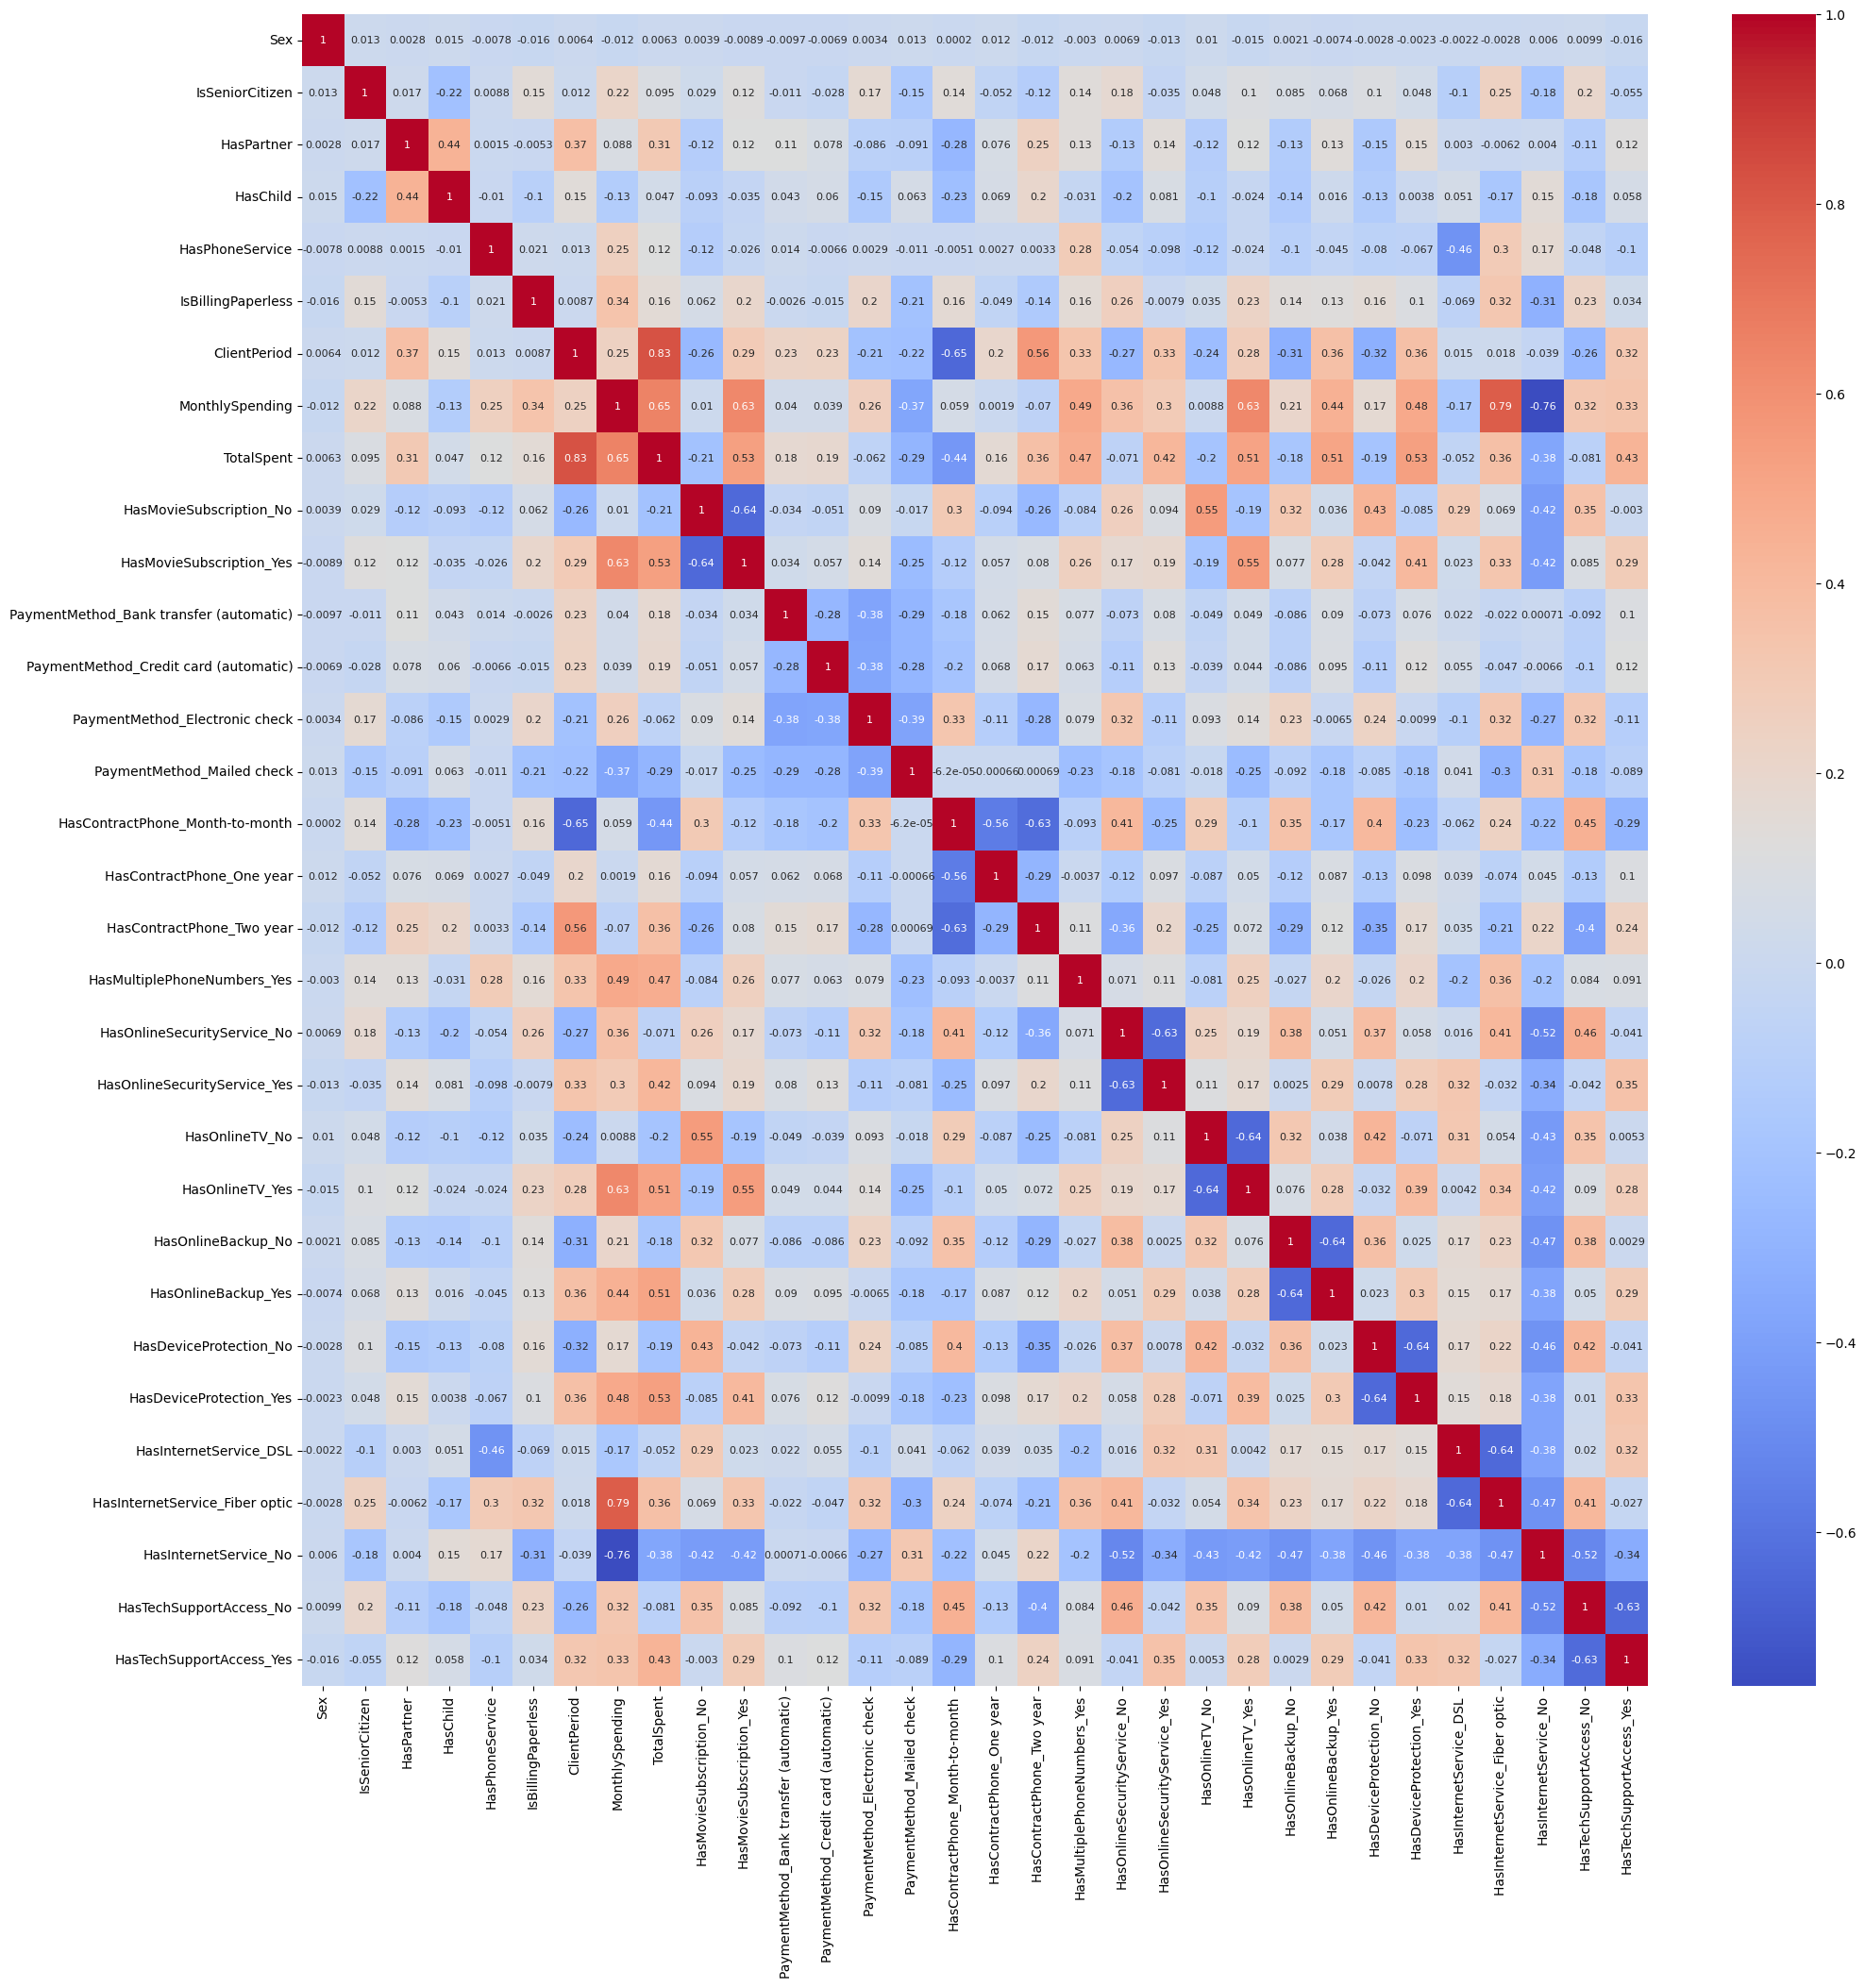

In [ ]:
fig, ax = plt.subplots(1, figsize=(23, 23))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 8})
plt.show()

Остальные признаки с коэффициентом корреляции выше $0.7$ (но не выше $0.83$) по модулю удалять не целесообразно, т.к. мы потеряем достаточно важную информацию для предсказания целевой переменной лишь немного облегчив модель.

##Базовая модель

На данном этапе мы исключили из рассмотрения некоторые признаки и теперь построим бейзлайн, основанный на значениях одного из четырёх наиболее весомых признаках. Если значения признаков $«Has~Contract~Phone~-~Month~to~month»$, $«Has~Online~Security~Service~-~No»$ и $«Has~Tech~Support~Access~-~No»$ будут равны $1$, или (!!!) значение признака $«Client~Period»$ меньше $3$, то мы будем брать значение предсказания из равномерного распределения, начиная со значения $0.5$ и до $1.0$, иначе — из полуинтервала от $0$ до $0.5$ не включая. Также в этой части будет предпринята попытка избавиться от дисбаланса классов, о котором упоминалось при анализе графиков.

Также в дальнейшем (перед обучением логистической регрессии, например) было бы неплохо стандартизовать данные, но для нашего базового классификатора это не важно.

In [ ]:
features = abs(X.corrwith(target)).sort_values(ascending=False)[:4].index.tolist()
features

['HasContractPhone_Month-to-month',
 'HasOnlineSecurityService_No',
 'ClientPeriod',
 'HasTechSupportAccess_No']

In [ ]:
np.random.seed(777)
X_train, X_val, y_train, y_val = train_test_split(
    X, target, test_size=.2, random_state=777
)

In [ ]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

3128
1097


In [ ]:
to_add = np.sum(y_train==0) - np.sum(y_train==1)
to_add

2031

In [ ]:
np.random.seed(777)
indices_to_add = np.random.randint(0, 1032, size=to_add)

In [ ]:
X_train = np.array(X_train)
X_train_to_add = X_train[y_train.to_numpy() == 1, :][indices_to_add, :]
X_train_to_add

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [ ]:
X_train = np.vstack([X_train, X_train_to_add])
X_train.shape

(6256, 32)

In [ ]:
y_train_to_add = np.ones(X_train_to_add.shape[0])
y_train = np.hstack([y_train, y_train_to_add])
y_train.shape, X_train.shape

((6256,), (6256, 32))

In [ ]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

3128
3128


In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
y_train = pd.Series(y_train.astype('int'))

In [ ]:
X_train

Sex  IsSeniorCitizen  HasPartner  HasChild  HasPhoneService  \
0     1.0              0.0         1.0       0.0              0.0   
1     1.0              0.0         1.0       1.0              1.0   
2     1.0              0.0         1.0       0.0              1.0   
3     0.0              0.0         1.0       1.0              1.0   
4     0.0              0.0         0.0       0.0              1.0   
...   ...              ...         ...       ...              ...   
6251  1.0              0.0         0.0       0.0              1.0   
6252  0.0              0.0         1.0       0.0              1.0   
6253  1.0              0.0         0.0       0.0              0.0   
6254  1.0              0.0         0.0       0.0              1.0   
6255  0.0              1.0         1.0       1.0              1.0   

      IsBillingPaperless  ClientPeriod  MonthlySpending  TotalSpent  \
0                    1.0          51.0            30.05     1529.45   
1                    1.0          20.0            90.20     1776.55   
2                    1.0          70.0            74.80     5315.80   
3                    0.0          54.0            91.30     4965.00   
4                    1.0          66.0            92.15     6056.90   
...                  ...           ...              ...         ...   
6251                 0.0           1.0            50.80       50.80   
6252                 1.0          24.0            99.30     2431.35   
6253                 0.0           3.0            24.75       66.95   
6254                 1.0           3.0            78.50      242.05   
6255                 1.0           1.0            69.25       69.25   

      HasDeviceProtection_No  ...  PaymentMethod_Mailed check  \
0                        1.0  ...                         0.0   
1                        1.0  ...                         0.0   
2                        0.0  ...                         0.0   
3                        0.0  ...                         0.0   
4                        0.0  ...                         0.0   
...                      ...  ...                         ...   
6251                     1.0  ...                         0.0   
6252                     0.0  ...                         0.0   
6253                     1.0  ...                         0.0   
6254                     1.0  ...                         0.0   
6255                     1.0  ...                         0.0   

      HasOnlineSecurityService_No  HasOnlineSecurityService_Yes  \
0                             1.0                           0.0   
1                             1.0                           0.0   
2                             0.0                           1.0   
3                             0.0                           1.0   
4                             1.0                           0.0   
...                           ...                           ...   
6251                          1.0                           0.0   
6252                          1.0                           0.0   
6253                          1.0                           0.0   
6254                          1.0                           0.0   
6255                          1.0                           0.0   

      HasTechSupportAccess_No  HasTechSupportAccess_Yes  \
0                         1.0                       0.0   
1                         1.0                       0.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         1.0                       0.0   
...                       ...                       ...   
6251                      1.0                       0.0   
6252                      1.0                       0.0   
6253                      1.0                       0.0   
6254                      1.0                       0.0   
6255                      1.0                       0.0   

      HasMovieSubscription_No

In [ ]:
np.random.seed(42)
train_preds = []
for i in X_train.loc[:, features[0]].index:
    if (X_train.loc[i, features[0]] == 1 and
        X_train.loc[i, features[1]] == 1 and
        X_train.loc[i, features[3]] == 1 or
        X_train.loc[i, features[2]] < 3):
        train_preds.append(np.random.uniform(0.5, 1.0))
    else:
        train_preds.append(np.random.uniform(0., 0.5))

In [ ]:
np.random.seed(42)
val_preds = []
for i in X_val.loc[:, features[0]].index:
    if (X_val.loc[i, features[0]] == 1 and
        X_val.loc[i, features[1]] == 1 and
        X_val.loc[i, features[3]] == 1 or
        X_val.loc[i, features[2]] < 3):
        val_preds.append(np.random.uniform(0.5, 1.0))
    else:
        val_preds.append(np.random.uniform(0., 0.5))

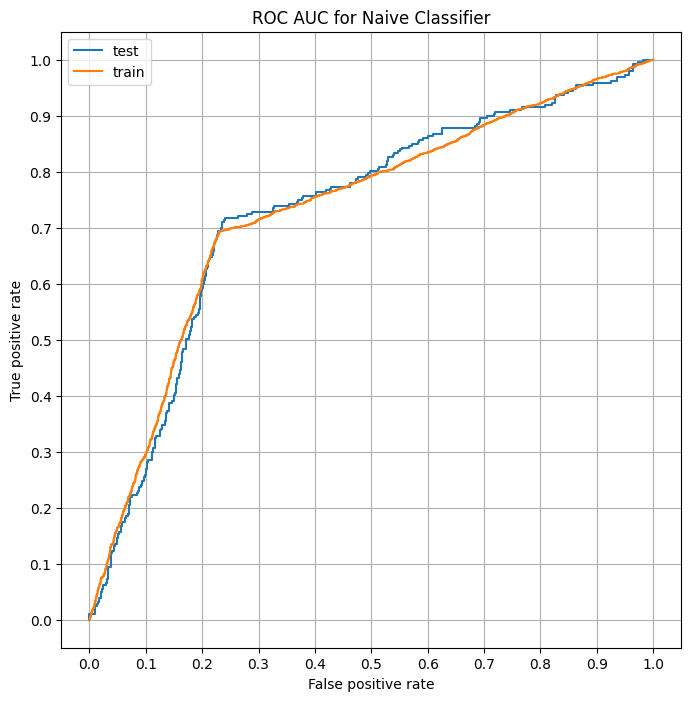

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for Naive Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
naive_roc_auc = roc_auc_score(y_val, val_preds)
naive_roc_auc

0.7302502375673107

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, val_preds)
naive_auc_pr = auc(recall, precision)
naive_auc_pr

0.46631003832490925

In [ ]:
naive_ap = average_precision_score(y_val, val_preds)
naive_ap

0.46825158070405826

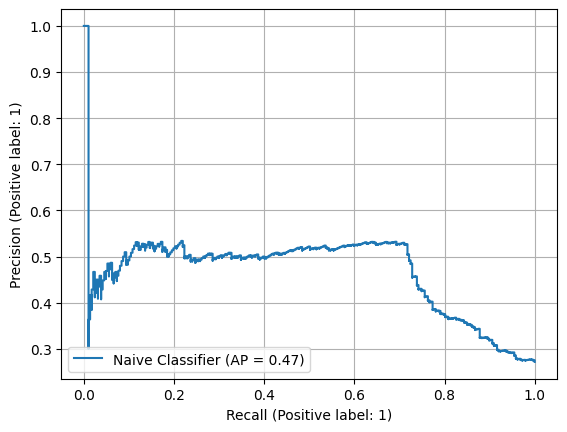

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, val_preds, name='Naive Classifier')
plt.grid()
plt.show()

###А теперь попробуем зарандомить

In [ ]:
np.random.seed(42)
train_randoms = []
for i in X_train.loc[:, features[0]].index:
    train_randoms.append(np.random.random())

In [ ]:
np.random.seed(42)
val_randoms = []
for i in X_val.loc[:, features[0]].index:
    val_randoms.append(np.random.random())

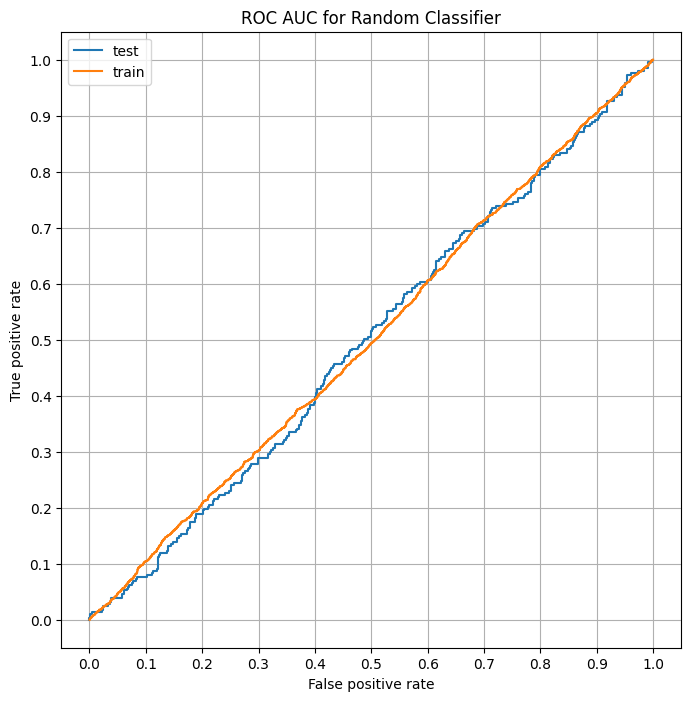

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))

axs.plot(*roc_curve(y_val, val_randoms)[:2], label = 'test')
axs.plot(*roc_curve(y_train, train_randoms)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for Random Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
random_roc_auc = roc_auc_score(y_val, val_randoms)
random_roc_auc

0.498538395402507

In [ ]:
precision_randoms, recall_randoms, thresholds = precision_recall_curve(y_val, val_randoms)
random_auc_pr = auc(recall_randoms, precision_randoms)
random_auc_pr

0.2721038268842779

In [ ]:
random_ap = average_precision_score(y_val, val_randoms)
random_ap

0.2740551179571147

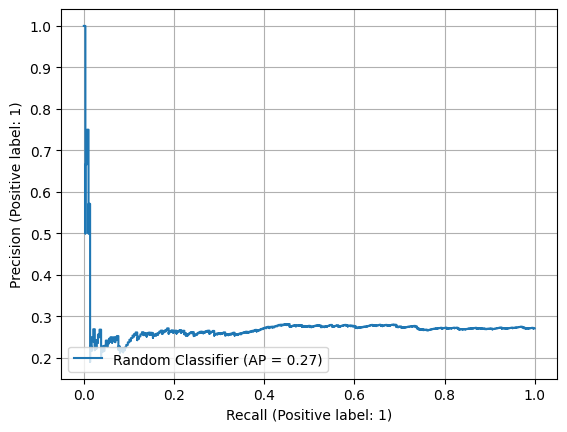

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, val_randoms, name='Random Classifier')
plt.grid()
plt.show()

Получилось как-то не очень — типичное угадывание.

##Итог

In [ ]:
metrics = np.array([naive_roc_auc, naive_auc_pr, naive_ap, random_roc_auc,
                    random_auc_pr, random_ap]).reshape(2, 3)

rows = ['Naive Classifier (4 features)',
        'Random Classifier']
cols = ['AUC ROC', 'AUC PR', 'AP']

df_metrics = pd.DataFrame(metrics, index=rows, columns=cols)

df_metrics

AUC ROC    AUC PR        AP
Naive Classifier (4 features)  0.730250  0.466310  0.468252
Random Classifier              0.498538  0.272104  0.274055

Получили неплохой бейзлайн, который даже лучше банального угадывания, основываясь лишь на значениях 4-х признаков, 3 из которых бинарные, но изначально были категориальными. Однако метрики $AUC~PR$ и $AP$ выглядят слабенько.

##$Gaussian~Naive~Bayes$

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
train_preds = gnb.predict_proba(X_train)[:, 1]
val_preds = gnb.predict_proba(X_val)[:, 1]

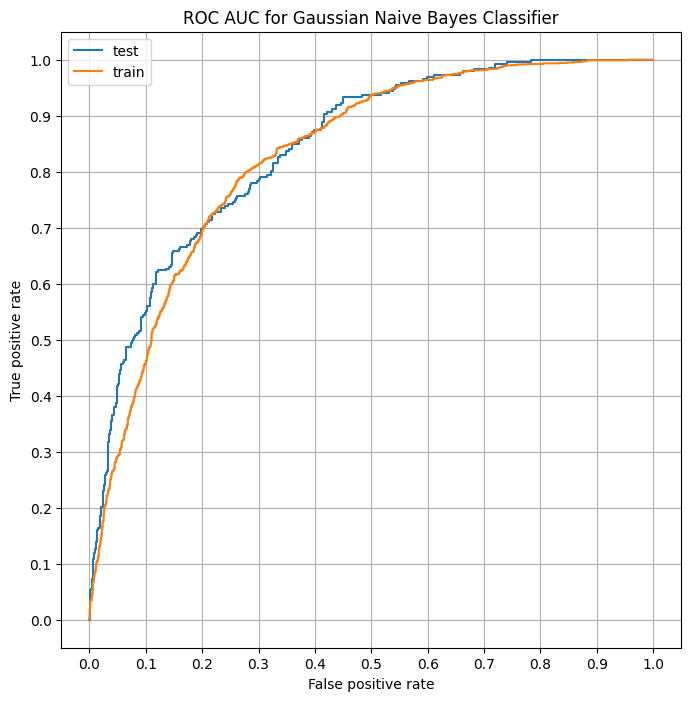

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for Gaussian Naive Bayes Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
gnb_auc_roc = roc_auc_score(y_val, val_preds)
gnb_auc_roc

0.8416760939409024

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, val_preds)
gnb_auc_pr = auc(recall, precision)
gnb_auc_pr

0.6573834049061593

In [ ]:
gnb_ap = average_precision_score(y_val, val_preds)
gnb_ap

0.6599413451186301

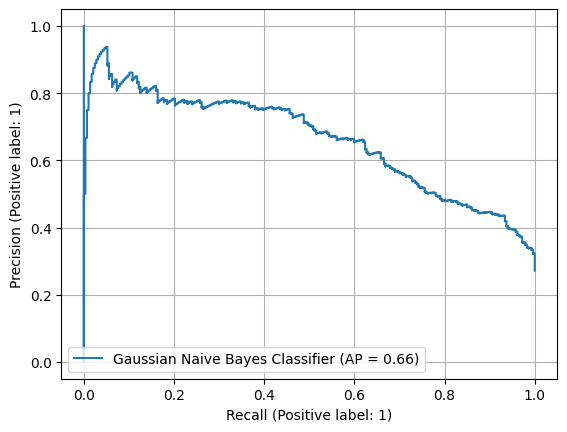

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, val_preds, name='Gaussian Naive Bayes Classifier')
plt.grid()
plt.show()

##Не реализовано

Возможно есть смысл обучать на полном наборе без разделения на трейн и валидацию, т.к. можно делать сабмиты на $Kaggle$. Дальнейший код - заготовка.

In [ ]:
X_train = X
y_train = target

In [ ]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

3898
1384


In [ ]:
to_add = np.sum(y_train==0) - np.sum(y_train==1)
to_add

2514

In [ ]:
indices_to_add = np.random.randint(0, 1032, size=to_add)

In [ ]:
X_train = np.array(X_train)
X_train_to_add = X_train[y_train.to_numpy() == 1, :][indices_to_add, :]
X_train_to_add

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
X_train = np.vstack([X_train, X_train_to_add])
X_train.shape

(7796, 32)

In [ ]:
y_train_to_add = np.ones(X_train_to_add.shape[0])
y_train = np.hstack([y_train, y_train_to_add])
y_train.shape, X_train.shape

((7796,), (7796, 32))

In [ ]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

3898
3898


In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
y_train = pd.Series(y_train.astype('int'))

In [ ]:
X_train

Sex  IsSeniorCitizen  HasPartner  HasChild  HasPhoneService  \
0     1.0              0.0         1.0       1.0              1.0   
1     1.0              0.0         1.0       0.0              1.0   
2     1.0              0.0         0.0       0.0              1.0   
3     0.0              1.0         1.0       0.0              1.0   
4     0.0              0.0         1.0       1.0              1.0   
...   ...              ...         ...       ...              ...   
7791  1.0              0.0         0.0       0.0              1.0   
7792  0.0              0.0         0.0       0.0              1.0   
7793  1.0              1.0         0.0       0.0              1.0   
7794  0.0              0.0         0.0       0.0              1.0   
7795  1.0              0.0         0.0       0.0              0.0   

      IsBillingPaperless  ClientPeriod  MonthlySpending  TotalSpent  \
0                    0.0          55.0            19.50     1026.35   
1                    0.0          72.0            25.85     1872.20   
2                    1.0           1.0            75.90       75.90   
3                    0.0          32.0            79.30     2570.00   
4                    0.0          60.0           115.25     6758.45   
...                  ...           ...              ...         ...   
7791                 0.0           3.0            79.25      267.60   
7792                 1.0           1.0            49.95       49.95   
7793                 1.0          17.0            45.05      770.60   
7794                 1.0           1.0            19.10       19.10   
7795                 0.0           3.0            24.75       66.95   

      HasInternetService_DSL  ...  HasTechSupportAccess_Yes  \
0                        0.0  ...                       0.0   
1                        0.0  ...                       0.0   
2                        0.0  ...                       1.0   
3                        0.0  ...                       0.0   
4                        0.0  ...                       1.0   
...                      ...  ...                       ...   
7791                     0.0  ...                       0.0   
7792                     1.0  ...                       0.0   
7793                     1.0  ...                       0.0   
7794                     0.0  ...                       0.0   
7795                     1.0  ...                       0.0   

      HasOnlineBackup_No  HasOnlineBackup_Yes  HasOnlineSecurityService_No  \
0                    0.0                  0.0                          0.0   
1                    0.0                  0.0                          0.0   
2                    1.0                  0.0                          1.0   
3                    1.0                  0.0                          1.0   
4                    0.0                  1.0                          0.0   
...                  ...                  ...                          ...   
7791                 1.0                  0.0                          1.0   
7792                 1.0                  0.0                          1.0   
7793                 1.0                  0.0                          1.0   
7794                 0.0                  0.0                          0.0   
7795                 1.0                  0.0                          1.0   

      HasOnlineSecurityService_Yes  HasMultiplePhoneNumbers_Yes  \
0                              0.0                          0.0   
1                              0.0                          1.0   
2                              0.0                          0.0   
3                              0.0                          1.0   
4                              1.0                          1.0   
...                            ...                          ...   
7791                           0.0                          0.0   
7792                           0.0                          1.0   
7793                       

In [ ]:
y_train

0       0
1       0
2       1
3       0
4       0
       ..
7791    1
7792    1
7793    1
7794    1
7795    1
Length: 7796, dtype: int64

#2. Обучение моделей (1-я часть)

В первой части обучения моделей будем обучать 3 модели классификаторов: решающее дерево, классификатор на основе метода опорных векторов ($SVM$) и логистическую регрессию. Для всех моделей будем перебирать гиперпараметры с помощью $GridSearch$ и выбирать наиболее оптимальные для нашей задачи.

##$Decision~Tree$

Решающее древо ($Decision~Tree$) - это такая модель, которая строит разделяющую гиперплоскость (гиперплоскости), изучая простые (бинарного типа) правила принятия решений, выведенные из особенностей данных. Древо можно рассматривать как кусочно-постоянную аппроксимацию. Своего рода графовая (сетевая) структура, где каждой вершине $V$ преписан предикат $\beta_V:\mathbb{X}\rightarrow\{0, 1\}$, а каждой листовой вершине преписан прогноз $C_V\in\mathbb{Y}$. Предикат как раз и представляет собой некое правило, например:

$$\beta_V(x, i, t)=[x_i>t],$$

где $x~-~$объект (наблюдение); $i~-~$признак; $t~-~$некоторый порог, который определяет прогноз.

In [ ]:
import graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 5, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.1, 0.01, 0.001]
}

In [ ]:
%%time
%%capture captured
np.random.seed(777)
dt = DecisionTreeClassifier(random_state=777)
gs_dt = GridSearchCV(dt, param, cv=5, scoring=['roc_auc', 'average_precision', 'precision', 'recall'], verbose=10, refit='roc_auc')
gs_dt.fit(X_train, y_train)

CPU times: user 1min 5s, sys: 202 ms, total: 1min 5s
Wall time: 1min 6s


In [ ]:
gs_dt.best_params_, gs_dt.best_score_

({'ccp_alpha': 0.001,
  'criterion': 'entropy',
  'max_depth': 17,
  'max_features': 'sqrt',
  'splitter': 'best'},
 0.8525907815737632)

In [ ]:
dt_train_preds = gs_dt.predict_proba(X_train)[:, 1]
dt_val_preds = gs_dt.predict_proba(X_val)[:, 1]

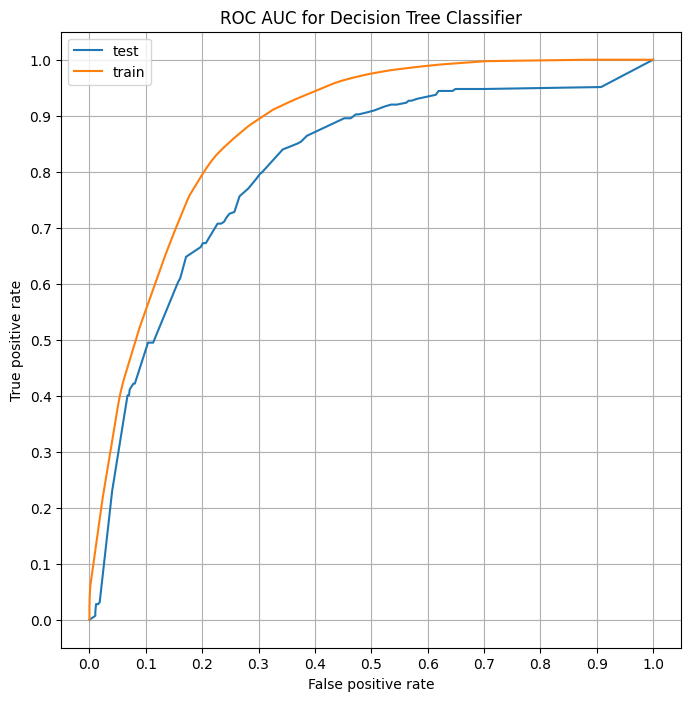

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, dt_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, dt_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for Decision Tree Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
dt_roc_auc = roc_auc_score(y_val, dt_val_preds)
dt_roc_auc

0.8040499570116294

In [ ]:
dt_precision, dt_recall, thresholds = precision_recall_curve(y_val, dt_val_preds)
dt_auc_pr = auc(dt_recall, dt_precision)
dt_auc_pr

0.5489762034340298

In [ ]:
dt_ap = average_precision_score(y_val, dt_val_preds)
dt_ap

0.5724459932648441

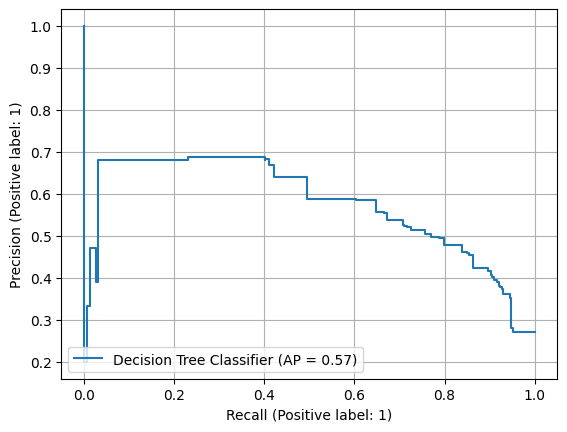

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, dt_val_preds, name='Decision Tree Classifier')
plt.grid()
plt.show()

###Визуализация дерева решений.

In [ ]:
np.random.seed(777)
dt = tree.DecisionTreeClassifier(
    ccp_alpha=0.001, criterion='entropy', max_depth=20, max_features='sqrt',
    splitter='best', random_state=777
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=20,
                       max_features='sqrt', random_state=777)

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("DT")

'DT.pdf'

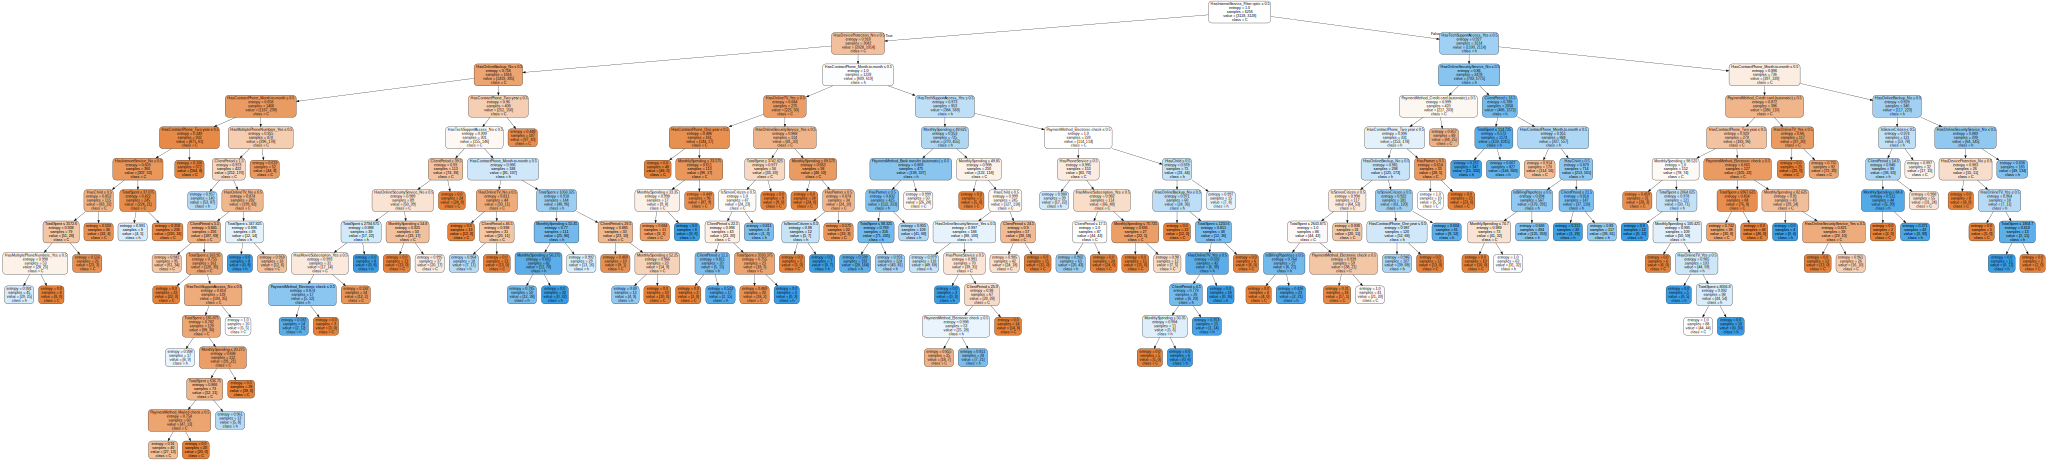

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None,
                      feature_names=X.columns,
                      class_names='Churn',
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

##$Support~Vector~Machines~(SVM)$

Метод опорных векторов $-$ это такой метод, который позволяет сконструировать гиперплоскость или набор гиперплоскостей в многомерном или бесконечномерном пространстве, которые можно использовать для решения задач классификации, регрессии и некоторых других. За ним стоит следующая интуиция: хорошее разделение достигается за счёт гиперплоскости, которая имеет наибольшее расстояние до ближайших точек обучающих данных (так называемый $margin~-$ зазор), поскольку чем больше этот зазор, тем ниже ошибка обобщения классификатора. Безусловная оптимизация сводится к миимизации функционала:

$$\mathcal{F}(y,\langle w,~x\rangle)=\min_{w,~b}{\lVert{w}\rVert_{2}^{2}+\dfrac{1}{n}C\sum\limits_{i=1}^{n}\max{(0,~1-y_i(\langle w,~x_i\rangle+b))}},$$

где $w~-~$веса; $C~-~$коэффициент регуляризации; $y_i~-~$значение целевой переменной на $i$-м объекте; $x_i$ - $i$-й объект из выборки $\mathbb{X}.$

$$\mathcal{L}(y,~z)=\max{(0,~1-y_iz)}\qquad-~Hinge~loss,$$

где $z=\langle w, x\rangle.$

На рисунке показано решение задачи с линейно разделимой выборкой:

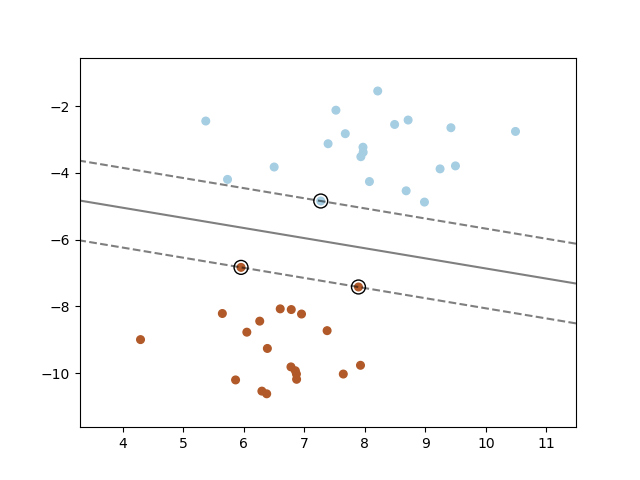

Будем использовать $GridSearch$ без инициализации в модели $SVM$ параметра ${probability=True}$, поскольку иначе процесс обучения сильно затягивается. Здесь при переборе параметров мы затрагиваем такое понятие, как ядро ($kernel$). К нему приводит двойственная постановка оптимизационной задачи $SVM$:

$$h(x)=sign(\sum\limits_{i=1}^{n}\alpha_i y_i\langle x_i,~x\rangle+b),$$

где $\alpha_i~-~$веса $w$, выраженные через коэффициенты Лагранжа $\alpha$, которые почти на всех объектах выборки равны $0$, а те, на которых они ненулевые, участвуют в формировании опорного вектора, т.е. важные (наиболее близкие к гиперплоскости) объекты зададут расположение гиперплоскости.

Однако, если мы знаем, что выборка $X\in\mathbb{R}^n$ не является линейно разделимой, то мы можем предположить, что существует некоторое пространство $H$, скорее всего, большей размерности, при переходе в которое выборка станет линейно разделимой. Функцию перехода $\phi:X\rightarrow H$ называют спрямляющим отображением, а $H~-~$спрямляющим пространством. Скалярное произведение $\langle x_i,~x_j\rangle$ в пространстве $X$ заменяется скалярным произведением $\langle \phi(x_i),~\phi(x_j)\rangle$ в пространстве $H$. Отсюда следует, что пространство $H$ должно быть гильбертовым и в нём должно быть определено скалярное произедение. Постановка задачи и алгоритм классификации не используют в явном виде признаковое описание и оперируют только скалярными произведениями признаков объектов. Это даёт возможность заменить скалярное произведение в пространстве $X$ на ядро $-$ функцию, являющуюся скалярным произведением в некотором пространстве $H$. Такая постановка избавляет нас от необходимости строит спрямляющее пространство в явном виде и вместо подбора спрямляющего отображения даёт возможность подбирать непосредственно ядро, т.е.:

$$h(x)=sign(\sum\limits_{i=1}^{n}\alpha_i y_i\ker{(x_i,~x_j)}+b),$$

где $\ker{(x_i,~x_j)}~-~$ядро, которое требуется подобрать. Таким образом перешли к математически удобной задаче квадратичной оптимизации с использованием множителей Лагранжа. Вычисление оптимума в расширенных пространствах огромных размерностей оказалось возможным потому, что ядро формируется только для ограниченного набора векторов.

Используемые ядра (симметричная положительно полуопределённая матрица):

$$linear: \langle x_i,~x_j\rangle=x_i^Tx_j,$$

где $x_i$ и $x_j~-~$два вектора признаков в некотором входном пространстве;

$$polynomial: (\gamma\langle x_i,~x_j\rangle+r)^{d}=(\gamma x_i^Tx_j+r)^{d},$$

где $d~-~$степень, специальный параметр $degree$; $r~-~$некоторое смещение, специальный параметр $coef0$; $\gamma=\frac{1}{2\sigma^2}~-~$некоторый коэффициент, специальный параметр $gamma$, обязательно $>0$; $\sigma~-~$стандартное отклонение;

$$Radial~Basis~Function~(RBF): e^{-\gamma\lVert{x_i-x_j}\rVert_2^2};$$

$$sigmoid: \tanh{(\gamma\langle x_i,~x_j\rangle+r)}=\tanh{(\gamma x_i^Tx_j+r)}.$$

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.fit_transform(X_val)

In [ ]:
%%time
%%capture captured
np.random.seed(777)
param = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm = SVC(kernel='rbf', random_state=777)
gs_svm = GridSearchCV(svm, param, cv=5, scoring=['roc_auc', 'average_precision', 'precision', 'recall'], verbose=10, refit='roc_auc')
gs_svm.fit(X_train, y_train)

CPU times: user 42min 59s, sys: 5.13 s, total: 43min 4s
Wall time: 44min 6s


In [ ]:
gs_svm.best_params_, gs_svm.best_score_

({'C': 10, 'gamma': 1, 'kernel': 'rbf'}, 0.9409787349059396)

In [ ]:
np.random.seed(777)
svm = SVC(C=10, gamma=1, kernel='rbf', probability=True, random_state=777)
svm.fit(X_train, y_train)

SVC(C=10, gamma=1, probability=True, random_state=777)

In [ ]:
svm_train_preds = svm.predict_proba(X_train)[:, 1]
svm_val_preds = svm.predict_proba(X_val)[:, 1]

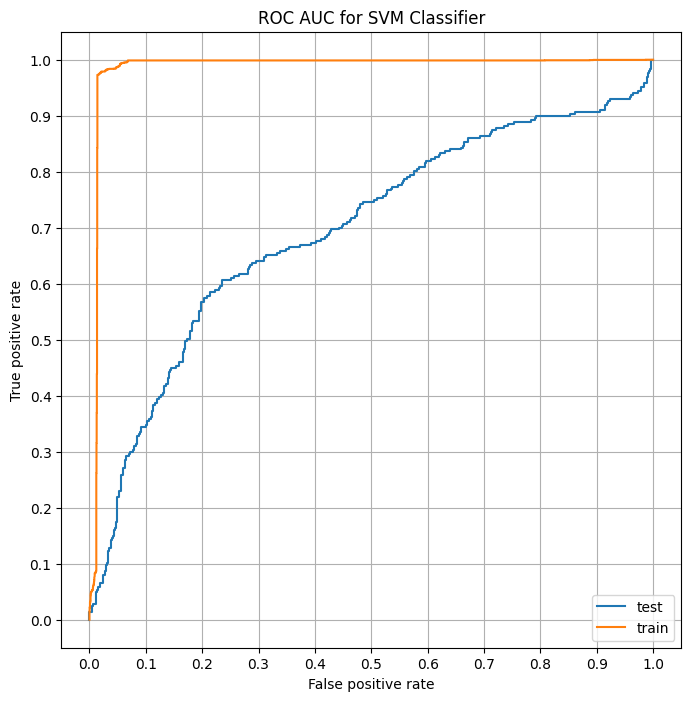

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, svm_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, svm_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for SVM Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
svm_roc_auc = roc_auc_score(y_val, svm_val_preds)
svm_roc_auc

0.6959771935381692

In [ ]:
svm_precision, svm_recall, thresholds = precision_recall_curve(y_val, svm_val_preds)
svm_auc_pr = auc(svm_recall, svm_precision)
svm_auc_pr

0.47799658153770974

In [ ]:
svm_ap = average_precision_score(y_val, svm_val_preds)
svm_ap

0.4798136307873765

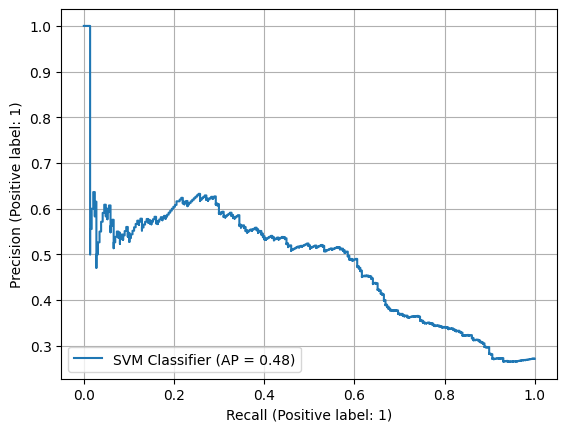

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, svm_val_preds, name='SVM Classifier')
plt.grid()
plt.show()

###$Principal~component~analysis~(PCA)$

Попробуем использовать метод главных компонент ($Principal~component~analysis~-~PCA$), чтобы улучшить результат и понять, какую долю данных стоит сохранить, чтобы прогноз на валидации был наилучшим.

In [ ]:
from sklearn.decomposition import PCA

def n_component_analysis(n, X_train, y_train, X_val, y_val, kernel, C, gamma):

    pca = PCA(n_components=n)
    print(f'PCA begin with n_components: {n}')
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)

    print('SVC begin')
    svm_clf = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, random_state=777)
    svm_clf.fit(X_train_pca, y_train)

    svm_train_preds = svm_clf.predict_proba(X_train_pca)[:, 1]
    svm_val_preds = svm_clf.predict_proba(X_val_pca)[:, 1]

    svm_roc_auc = roc_auc_score(y_val, svm_val_preds)
    svm_precision, svm_recall, thresholds = precision_recall_curve(y_val, svm_val_preds)
    svm_auc_pr = auc(svm_recall, svm_precision)
    svm_ap = average_precision_score(y_val, svm_val_preds)

    print(f'AUC ROC: {svm_roc_auc}')
    print(f'AUC Precision-Recall: {svm_auc_pr}')
    print(f'Average Precision: {svm_ap}')

    return svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds

In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.7, 0.9, num=15)

svc_auc_roc = []
svc_auc_pr = []
svc_ap = []
svc_train_preds = []
svc_val_preds = []
for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, kernel='rbf', C=10, gamma=1
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 3min 19s, sys: 2.95 s, total: 3min 22s
Wall time: 3min 26s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.5, 0.7, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, kernel='rbf', C=10, gamma=1
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 2min 56s, sys: 2.29 s, total: 2min 58s
Wall time: 3min 9s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.3, 0.5, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, kernel='rbf', C=10, gamma=1
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 3min 40s, sys: 2.27 s, total: 3min 42s
Wall time: 3min 43s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.1, 0.3, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, kernel='rbf', C=10, gamma=1
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 10min 37s, sys: 2.32 s, total: 10min 39s
Wall time: 10min 47s


In [ ]:
print(f'Max AUC ROC - {np.max(svc_auc_roc)}; idx - {np.argmax(svc_auc_roc)}')
print(f'Max AUC PR - {svc_auc_pr[np.argmax(svc_auc_roc)]}; idx - {np.argmax(svc_auc_roc)}')
print(f'Max AP - {svc_ap[np.argmax(svc_auc_roc)]}; idx - {np.argmax(svc_auc_roc)}')

Max AUC ROC - 0.7544730530793249; idx - 15
Max AUC PR - 0.4440798346635344; idx - 15
Max AP - 0.4468242770218183; idx - 15


In [ ]:
svm_train_preds = svc_train_preds[15]
svm_val_preds = svc_val_preds[15]

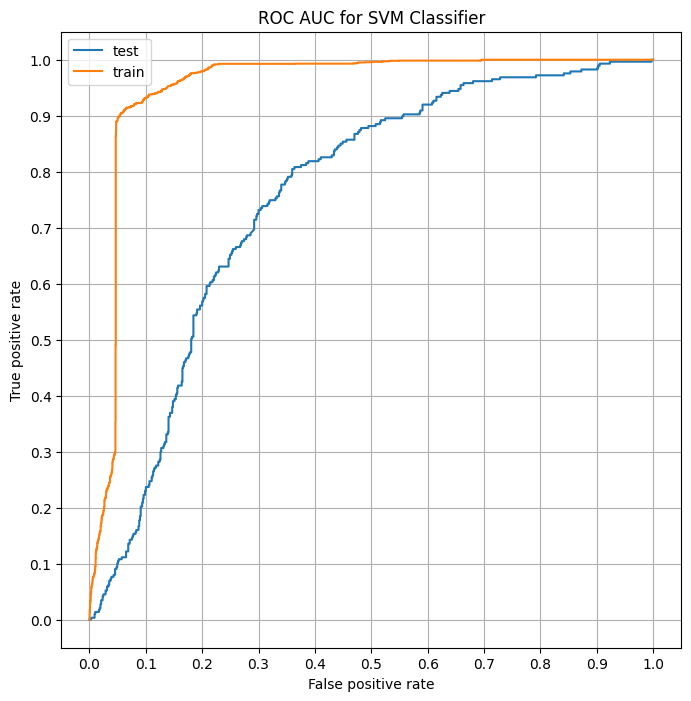

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, svm_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, svm_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for SVM Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

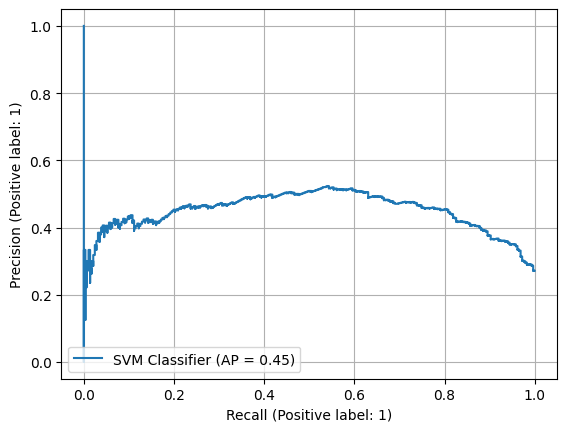

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, svm_val_preds, name='SVM Classifier')
plt.grid()
plt.show()

Слегка понизились метрики $AUC~PR$ и $Average~Precision$, но зато удалось ощутимо увеличить показатели по целевой метрике $-~AUC~ROC$. Однако это не избавляет нас от факта переобучения модели и не объясняет его.

###Ядро $precomputed$

Окей, обучим модель на ядре $precomputed$, для этого непосредственно обучением преобразуем наши данные в матрицу Грама и будем использовать её для обучения нашей модели.

In [ ]:
precomp_train = np.dot(X_train, X_train.T)

In [ ]:
%%time
%%capture captured
np.random.seed(777)
param = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001]
}

pc_svm = SVC(kernel='precomputed', random_state=777)
gs_pc_svm = GridSearchCV(pc_svm, param, cv=5, scoring=['roc_auc', 'average_precision', 'precision', 'recall'], verbose=10, refit='roc_auc')
gs_pc_svm.fit(precomp_train, y_train)

CPU times: user 13min 30s, sys: 3.77 s, total: 13min 34s
Wall time: 13min 38s


In [ ]:
gs_pc_svm.best_params_, gs_pc_svm.best_score_

({'C': 10, 'gamma': 1}, 0.833820424828262)

In [ ]:
np.random.seed(777)
svm = SVC(C=10, gamma=1, kernel='precomputed', probability=True, random_state=777)
svm.fit(precomp_train, y_train)

SVC(C=10, gamma=1, kernel='precomputed', probability=True, random_state=777)

Обученная модель принимает на вход количество признаков, равное количеству объектов в обучающих данных, поэтому матрицу валидационных данных домножаем на транспонированную матрицу обучающих данных.

In [ ]:
precomp_val = np.dot(X_val, X_train.T)

svm_train_preds = svm.predict_proba(precomp_train)[:, 1]
svm_val_preds = svm.predict_proba(precomp_val)[:, 1]

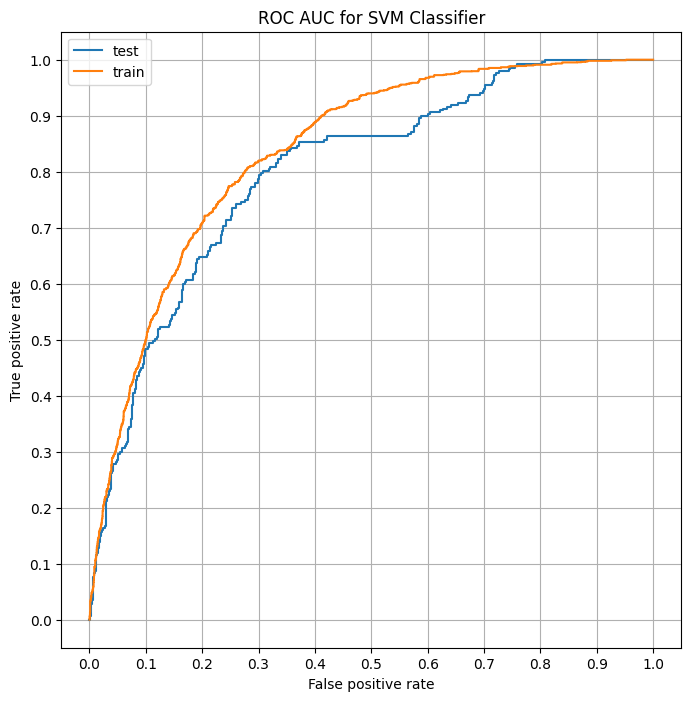

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, svm_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, svm_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for SVM Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
svm_roc_auc = roc_auc_score(y_val, svm_val_preds)
svm_roc_auc

0.8008054663106928

In [ ]:
svm_precision, svm_recall, thresholds = precision_recall_curve(y_val, svm_val_preds)
svm_auc_pr = auc(svm_recall, svm_precision)
svm_auc_pr

0.584236944717604

In [ ]:
svm_ap = average_precision_score(y_val, svm_val_preds)
svm_ap

0.5872483217406108

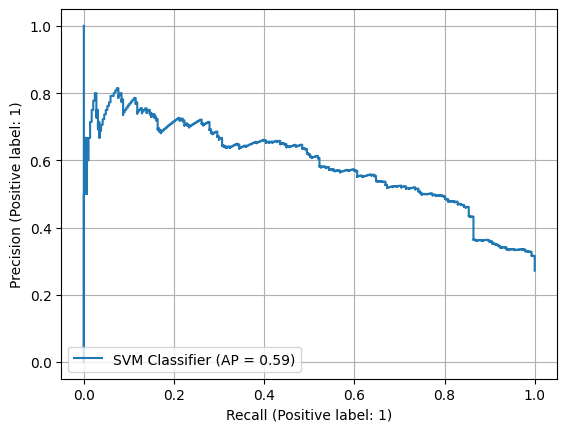

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, svm_val_preds, name='SVM Classifier')
plt.grid()
plt.show()

###$PCA$

In [ ]:
def n_component_analysis_pc(n, X_train, y_train, X_val, y_val, kernel, C, gamma):

    pca = PCA(n_components=n)
    print(f'PCA begin with n_components: {n}')
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    a = X_train_pca.copy()
    X_train_pca = np.dot(X_train_pca, X_train_pca.T)
    X_val_pca = pca.transform(X_val)
    X_val_pca = np.dot(X_val_pca, a.T)

    print('SVC begin')
    svm_clf = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, random_state=777)
    svm_clf.fit(X_train_pca, y_train)

    svm_train_preds = svm_clf.predict_proba(X_train_pca)[:, 1]
    svm_val_preds = svm_clf.predict_proba(X_val_pca)[:, 1]

    svm_roc_auc = roc_auc_score(y_val, svm_val_preds)
    svm_precision, svm_recall, thresholds = precision_recall_curve(y_val, svm_val_preds)
    svm_auc_pr = auc(svm_recall, svm_precision)
    svm_ap = average_precision_score(y_val, svm_val_preds)

    print(f'AUC ROC: {svm_roc_auc}')
    print(f'AUC Precision-Recall: {svm_auc_pr}')
    print(f'Average Precision: {svm_ap}')

    return svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds

In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.7, 0.9, num=15)

svc_auc_roc = []
svc_auc_pr = []
svc_ap = []
svc_train_preds = []
svc_val_preds = []
for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis_pc(
        n, X_train, y_train, X_val, y_val, kernel='precomputed', C=1, gamma=1
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 2min 27s, sys: 5.94 s, total: 2min 33s
Wall time: 2min 30s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.5, 0.7, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis_pc(
        n, X_train, y_train, X_val, y_val, kernel='precomputed', C=1, gamma=1
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 1min 54s, sys: 5.79 s, total: 2min
Wall time: 1min 55s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.3, 0.5, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis_pc(
        n, X_train, y_train, X_val, y_val, kernel='precomputed', C=1, gamma=1
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 1min 49s, sys: 5.64 s, total: 1min 54s
Wall time: 1min 50s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.1, 0.3, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis_pc(
        n, X_train, y_train, X_val, y_val, kernel='precomputed', C=1, gamma=1
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 1min 46s, sys: 5.48 s, total: 1min 51s
Wall time: 1min 47s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.9, 0.9999999, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis_pc(
        n, X_train, y_train, X_val, y_val, kernel='precomputed', C=1, gamma=1
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 3min 34s, sys: 6.43 s, total: 3min 41s
Wall time: 3min 42s


In [ ]:
print(f'Max AUC ROC - {np.max(svc_auc_roc)}; idx - {np.argmax(svc_auc_roc)}')
print(f'Max AUC PR - {svc_auc_pr[np.argmax(svc_auc_roc)]}; idx - {np.argmax(svc_auc_roc)}')
print(f'Max AP - {svc_ap[np.argmax(svc_auc_roc)]}; idx - {np.argmax(svc_auc_roc)}')

Max AUC ROC - 0.8512330874700212; idx - 13
Max AUC PR - 0.6795264511376466; idx - 13
Max AP - 0.6820143207678653; idx - 13


In [ ]:
svm_train_preds = svc_train_preds[13]
svm_val_preds = svc_val_preds[13]

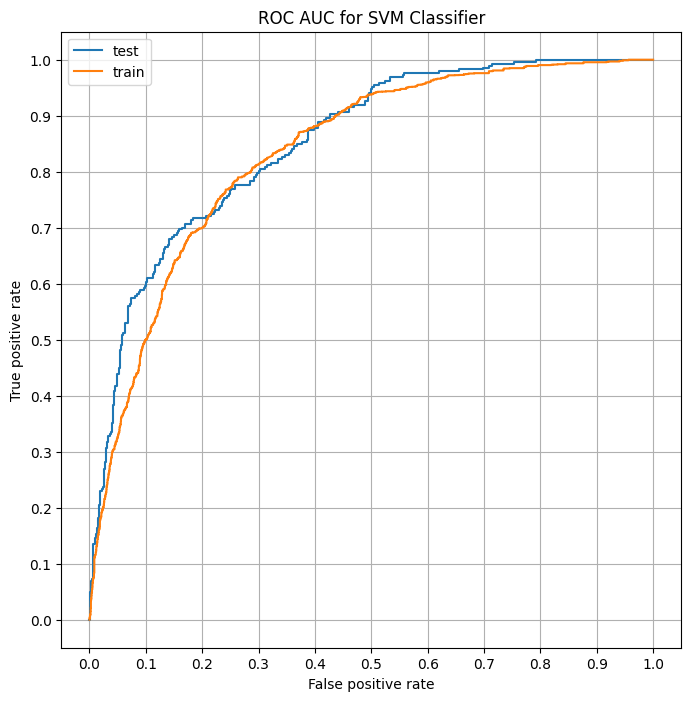

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, svm_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, svm_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for SVM Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

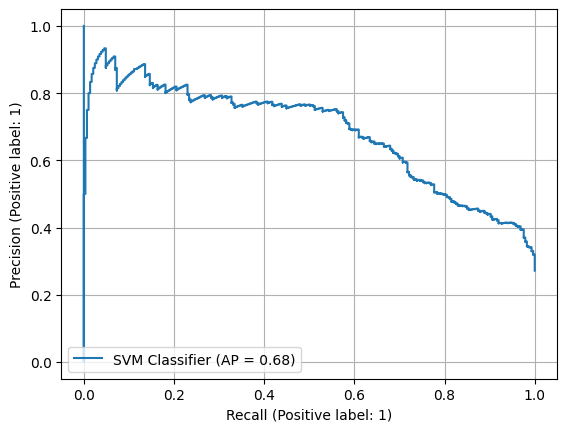

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, svm_val_preds, name='SVM Classifier')
plt.grid()
plt.show()

Выглядит неплохо.

###Результат ручного перебора параметров для модели на ядре $RBF$

Модель на ядре $precomputed$, если судить по обучению и валидации, не переобучена (как и на всех остальных ядрах), поэтому вручную будем перебирать параметры только для ядра $RBF$. На нём модель демонстрирует довольно внушительный трейн скор, однако на валидации видно, что модель переобучилась. Попробуем разобраться в этом и устранить переобучение.

P.S. В ноутбуке я не стал приводить ВСЕ результаты ручного перебора гиперпараметров и ядер, оставил только лучший результат.

In [ ]:
np.random.seed(777)
svm = SVC(C=0.9, gamma=0.0016, kernel='rbf', probability=True, random_state=777)
svm.fit(X_train, y_train)

SVC(C=0.9, gamma=0.0016, probability=True, random_state=777)

In [ ]:
svm_train_preds = svm.predict_proba(X_train)[:, 1]
svm_val_preds = svm.predict_proba(X_val)[:, 1]

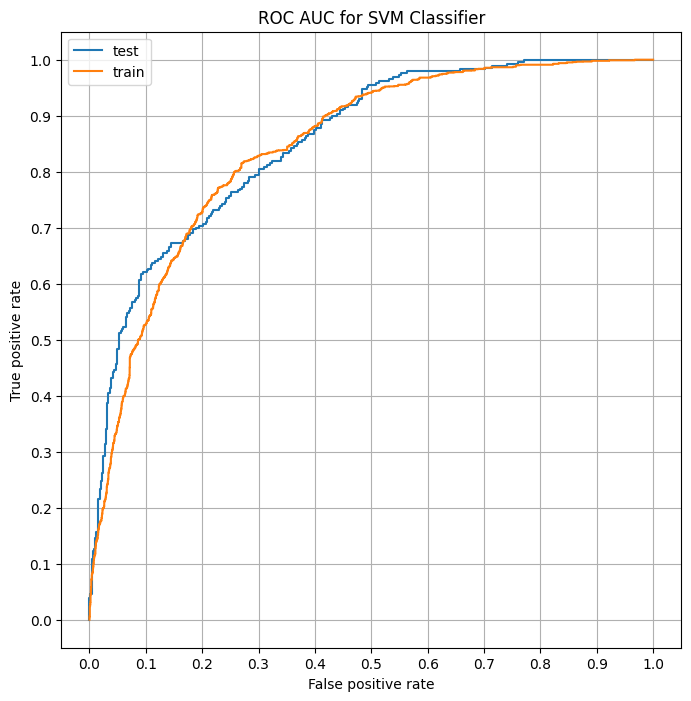

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, svm_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, svm_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for SVM Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
svm_roc_auc = roc_auc_score(y_val, svm_val_preds)
svm_roc_auc

0.8532060274220553

In [ ]:
svm_precision, svm_recall, thresholds = precision_recall_curve(y_val, svm_val_preds)
svm_auc_pr = auc(svm_recall, svm_precision)
svm_auc_pr

0.6958861983150577

In [ ]:
svm_ap = average_precision_score(y_val, svm_val_preds)
svm_ap

0.6967838079907596

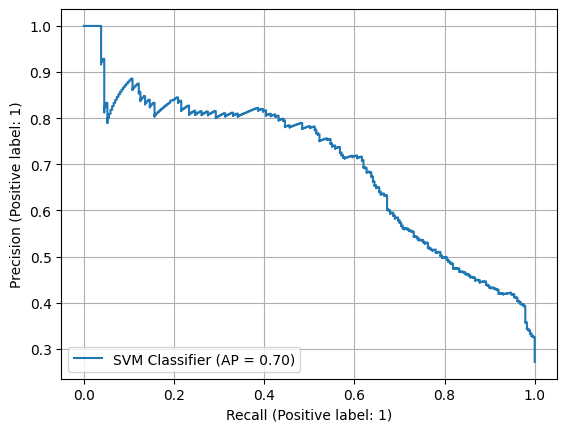

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, svm_val_preds, name='SVM Classifier')
plt.grid()
plt.show()

###$PCA$

In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.7, 0.9, num=15)

svc_auc_roc = []
svc_auc_pr = []
svc_ap = []
svc_train_preds = []
svc_val_preds = []
for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, kernel='rbf', C=0.9, gamma=0.0016
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 2min 23s, sys: 1.94 s, total: 2min 24s
Wall time: 2min 26s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.5, 0.7, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, kernel='rbf', C=0.9, gamma=0.0016
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 2min, sys: 1.64 s, total: 2min 1s
Wall time: 2min


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.3, 0.5, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, kernel='rbf', C=0.9, gamma=0.0016
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 1min 48s, sys: 1.81 s, total: 1min 50s
Wall time: 1min 49s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.1, 0.3, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, kernel='rbf', C=0.9, gamma=0.0016
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 1min 57s, sys: 2.1 s, total: 1min 59s
Wall time: 1min 57s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.9, 0.99999999, num=15)

for n in n_s:
    svm_roc_auc, svm_auc_pr, svm_ap, svm_train_preds, svm_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, kernel='rbf', C=0.9, gamma=0.0016
    )
    svc_auc_roc.append(svm_roc_auc)
    svc_auc_pr.append(svm_auc_pr)
    svc_ap.append(svm_ap)
    svc_train_preds.append(svm_train_preds)
    svc_val_preds.append(svm_val_preds)

CPU times: user 2min 26s, sys: 1.94 s, total: 2min 28s
Wall time: 2min 26s


In [ ]:
print(f'Max AUC ROC - {np.max(svc_auc_roc)}; idx - {np.argmax(svc_auc_roc)}')
print(f'Max AUC PR - {svc_auc_pr[np.argmax(svc_auc_roc)]}; idx - {np.argmax(svc_auc_roc)}')
print(f'Max AP - {svc_ap[np.argmax(svc_auc_roc)]}; idx - {np.argmax(svc_auc_roc)}')

Max AUC ROC - 0.8536540114937328; idx - 68
Max AUC PR - 0.7000597895514362; idx - 68
Max AP - 0.7008986653322749; idx - 68


In [ ]:
svm_train_preds = svc_train_preds[68]
svm_val_preds = svc_val_preds[68]

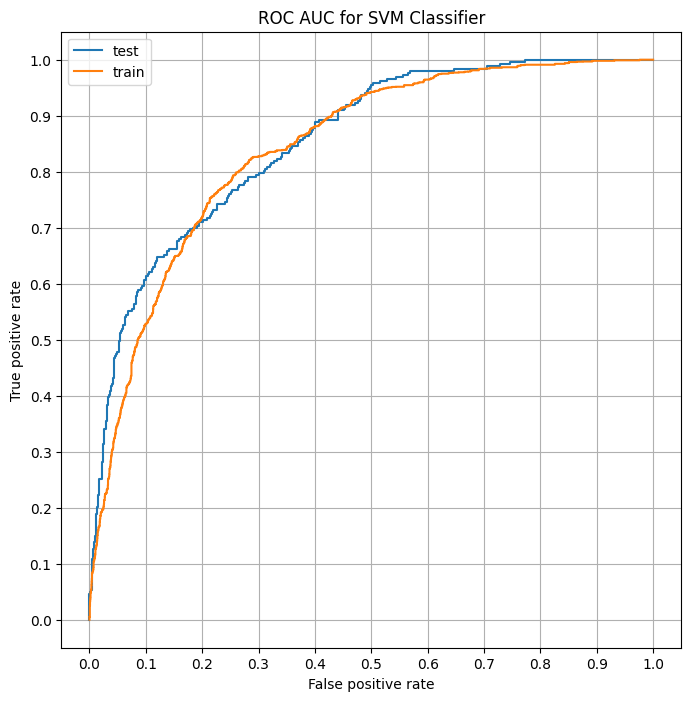

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, svm_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, svm_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for SVM Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

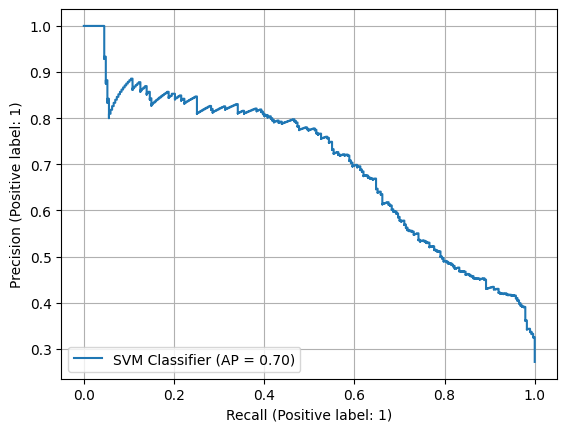

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, svm_val_preds, name='SVM Classifier')
plt.grid()
plt.show()

###Небольшой вывод по $SVM$

Для модели на ядре $RBF$ удалось добиться лишь незначительного прироста в качестве после применения $PCA$, причем "ужимание" данных, по сути, не давало прироста. В целом отметим, что для радиально-базисного функционального ($RBF$) ядра значение параметра $\gamma$ должно быть $<1$. Тогда модель не переобучается, что продемонстрировано на графиках чуть выше. Касаемо ядра, стоит отметить, что в основном достаточно хорошие результаты демонстрирует полиномиальное ($poly$) ядро (в ноутбук это не вошло), но всё же его результаты немного отстают от $RBF$, возможно стоило взять степень (параметр $degree$) $>5$, однако это выходило очень накладно по времени и вряд ли бы внесло серьёзный импакт. Ядро $precomputed$ тоже продемонстрировало неплохие результаты, но они так же не дотягивают до ядра $RBF$.

Подытоживая отметим, что с практической точки зрения, возможно, не имело смысла вручную перебирать гиперпараметры, чтобы избавиться от переобучения модели на ядре $RBF$, т.к. близкие результаты демонстрируют модели на ядрах $poly$ и $precomputed$, для которых имеет смысл применять $PCA$.

##$Logistic~Regression~-~is~my~profession$

На входе у нас есть матрица объект-признак $X$ и столбец-вектор $y~-~$метки из $\{0, 1\}$ для каждого объекта. Мы хотим найти такую матрицу весов $W$ и смещение $b$ ($bias$), что наша модель $XW+b$ будет каким-то образом предсказывать класс объекта. Как видно на выходе наша модель может выдавать число в интервале от $(-\infty;\infty)$. Этот выход как правило называют "логитами" ($logits$). Нам необходимо перевести его на интервал от $(0;1)$ для того, чтобы он выдавал нам вероятность принадлежности объекта к классу один, также лучше, чтобы эта функция была монотонной, быстро считалась, имела производную и на $-\infty$ имела значение $0$, а на $+\infty$ имела значение $1$. Такая постановка задачи приводит нас к рассмотрению функции правдоподобия:

$$\prod\limits_{i=1}^{n}{h(x_i)^{[y_i=+1]}*(1-h(x_i))^{[y_i=-1]}}\rightarrow\max_w,$$

но для того, чтобы перейти к привычной задаче минимизации возьмём $-\log$ и к сумме вместо произведения:

$$-\sum\limits_{i=1}^{n}{[y_i=+1]*\log{h(x_i)}+[y_i=-1]*\log{(1-h(x_i))}}\rightarrow\min_w,$$

где $w~-~$веса; $y_i~-~$значение целевой переменной на $i$-м объекте $x$; $h(x_i)~-~$выход модели (logit) на $i$-м объекте.

В таком случае, функция потерь из предположения правдоподобия выглядит следующим образом:

$$\mathcal{L}(y,~h(x))=-[y=+1]*\log{h(x)}-[y=-1]*\log{(1-h(x))}=y*\log{h(x)}-(1-y)*\log{(1-h(x))}.$$

Такая функция потерь называется $LogLoss$ или $Binary~Cross~Entropy$. У неё есть производная, однако существует проблема: значения $h(x)=\langle w, x\rangle$ могут не лежать на интервале $(0;1)$. Эта проблема решаема$~-~$будем брать сигмоиду:

$$\sigma(x) = \frac{1}{1 + e^{-x}}.$$

Тогда функция потерь переписывается в следующем виде:

$$\mathcal{L}(y,~h(x))=-\sum\limits_{i=1}^{n}{[y_i=+1]*\log{\frac{1}{1+e^{-\langle w,~x_i\rangle}}}+[y_i=-1]*\log{\frac{e^{-\langle w,~x_i\rangle}}{1+e^{-\langle w,~x_i\rangle}}}}=\sum\limits_{i=1}^{n}{[y_i=+1]*\log{(1+e^{-\langle w,~x_i\rangle})}}+[y_i=-1]*\log{(1+e^{\langle w,~x_i\rangle})}=\sum\limits_{i=1}^{n}{\log{(1+e^{-y_i\langle w,~x_i\rangle})}}\rightarrow\min_w,$$

где $-y_i\langle w,~x_i\rangle~-~$отступ классификатора.

In [ ]:
param = {
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [ ]:
%%time
%%capture captured
np.random.seed(777)
lr = LogisticRegression(penalty='l2', max_iter=10000, random_state=777)
gs_lr = GridSearchCV(lr, param, cv=5, scoring=['roc_auc', 'average_precision', 'precision', 'recall'], verbose=10, refit='roc_auc')
gs_lr.fit(X_train, y_train)

CPU times: user 41.9 s, sys: 14.5 s, total: 56.4 s
Wall time: 42.9 s


In [ ]:
gs_lr.best_params_, gs_lr.best_score_

({'C': 10, 'class_weight': 'balanced', 'solver': 'newton-cholesky'},
 0.8436098953750676)

In [ ]:
lr_train_preds = gs_lr.predict_proba(X_train)[:, 1]
lr_val_preds = gs_lr.predict_proba(X_val)[:, 1]

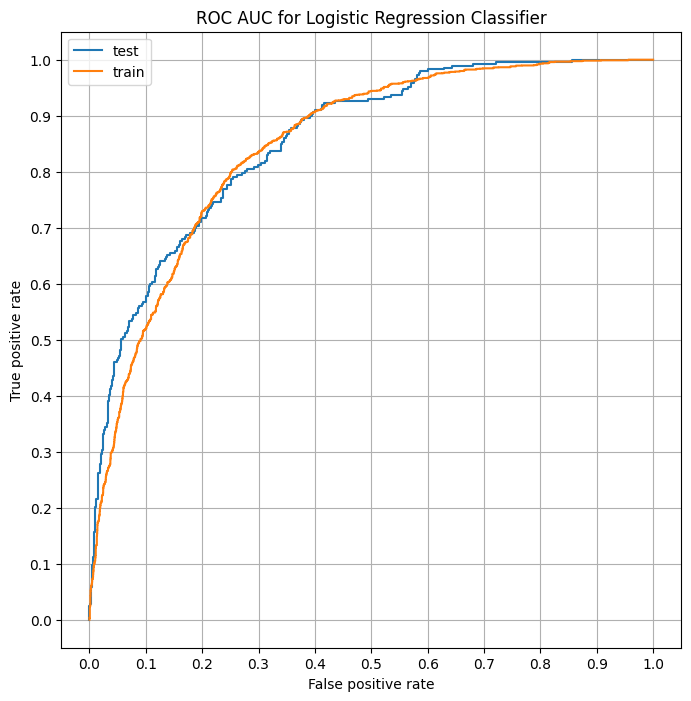

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, lr_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, lr_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for Logistic Regression Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
lr_roc_auc = roc_auc_score(y_val, lr_val_preds)
lr_roc_auc

0.8555409747047377

In [ ]:
lr_precision, lr_recall, thresholds = precision_recall_curve(y_val, lr_val_preds)
lr_auc_pr = auc(lr_recall, lr_precision)
lr_auc_pr

0.6993219840260828

In [ ]:
lr_ap = average_precision_score(y_val, lr_val_preds)
lr_ap

0.7002731662502625

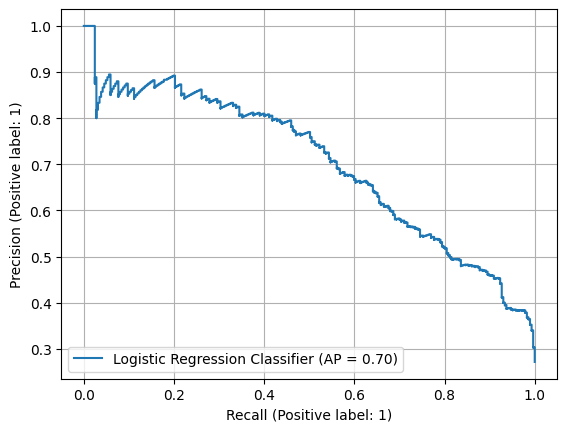

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, lr_val_preds, name='Logistic Regression Classifier')
plt.grid()
plt.show()

In [ ]:
def n_component_analysis(n, X_train, y_train, X_val, y_val, solver, C, class_weight):

    pca = PCA(n_components=n)
    print(f'PCA begin with n_components: {n}')
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)

    print('SVC begin')
    lr_clf = LogisticRegression(
        C=C, class_weight=class_weight, penalty='l2', solver=solver,
        max_iter=10000, random_state=777
    )
    lr_clf.fit(X_train_pca, y_train)

    lr_train_preds = lr_clf.predict_proba(X_train_pca)[:, 1]
    lr_val_preds = lr_clf.predict_proba(X_val_pca)[:, 1]

    lr_roc_auc = roc_auc_score(y_val, lr_val_preds)
    lr_precision, lr_recall, thresholds = precision_recall_curve(y_val, lr_val_preds)
    lr_auc_pr = auc(lr_recall, lr_precision)
    lr_ap = average_precision_score(y_val, lr_val_preds)

    print(f'AUC ROC: {lr_roc_auc}')
    print(f'AUC Precision-Recall: {lr_auc_pr}')
    print(f'Average Precision: {lr_ap}')

    return lr_roc_auc, lr_auc_pr, lr_ap, lr_train_preds, lr_val_preds

In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.7, 0.9, num=15)

logr_auc_roc = []
logr_auc_pr = []
logr_ap = []
logr_train_preds = []
logr_val_preds = []
for n in n_s:
    lr_roc_auc, lr_auc_pr, lr_ap, lr_train_preds, lr_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, C=10, class_weight='balanced',
        solver='newton-cholesky'
    )
    logr_auc_roc.append(lr_roc_auc)
    logr_auc_pr.append(lr_auc_pr)
    logr_ap.append(lr_ap)
    logr_train_preds.append(lr_train_preds)
    logr_val_preds.append(lr_val_preds)

CPU times: user 815 ms, sys: 899 ms, total: 1.71 s
Wall time: 1.23 s


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.5, 0.7, num=15)

for n in n_s:
    lr_roc_auc, lr_auc_pr, lr_ap, lr_train_preds, lr_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, C=10, class_weight='balanced',
        solver='newton-cholesky'
    )
    logr_auc_roc.append(lr_roc_auc)
    logr_auc_pr.append(lr_auc_pr)
    logr_ap.append(lr_ap)
    logr_train_preds.append(lr_train_preds)
    logr_val_preds.append(lr_val_preds)

CPU times: user 742 ms, sys: 1.04 s, total: 1.78 s
Wall time: 926 ms


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.3, 0.5, num=15)

for n in n_s:
    lr_roc_auc, lr_auc_pr, lr_ap, lr_train_preds, lr_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, C=10, class_weight='balanced',
        solver='newton-cholesky'
    )
    logr_auc_roc.append(lr_roc_auc)
    logr_auc_pr.append(lr_auc_pr)
    logr_ap.append(lr_ap)
    logr_train_preds.append(lr_train_preds)
    logr_val_preds.append(lr_val_preds)

CPU times: user 690 ms, sys: 899 ms, total: 1.59 s
Wall time: 854 ms


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.1, 0.3, num=15)

for n in n_s:
    lr_roc_auc, lr_auc_pr, lr_ap, lr_train_preds, lr_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, C=10, class_weight='balanced',
        solver='newton-cholesky'
    )
    logr_auc_roc.append(lr_roc_auc)
    logr_auc_pr.append(lr_auc_pr)
    logr_ap.append(lr_ap)
    logr_train_preds.append(lr_train_preds)
    logr_val_preds.append(lr_val_preds)

CPU times: user 667 ms, sys: 948 ms, total: 1.61 s
Wall time: 861 ms


In [ ]:
%%time
%%capture captured
np.random.seed(777)
n_s = np.linspace(0.9, 0.9999999, num=15)

for n in n_s:
    lr_roc_auc, lr_auc_pr, lr_ap, lr_train_preds, lr_val_preds = n_component_analysis(
        n, X_train, y_train, X_val, y_val, C=10, class_weight='balanced',
        solver='newton-cholesky'
    )
    logr_auc_roc.append(lr_roc_auc)
    logr_auc_pr.append(lr_auc_pr)
    logr_ap.append(lr_ap)
    logr_train_preds.append(lr_train_preds)
    logr_val_preds.append(lr_val_preds)

CPU times: user 769 ms, sys: 551 ms, total: 1.32 s
Wall time: 687 ms


In [ ]:
print(f'Max AUC ROC - {np.max(logr_auc_roc)}; idx - {np.argmax(logr_auc_roc)}')
print(f'Max AUC PR - {logr_auc_pr[np.argmax(logr_auc_roc)]}; idx - {np.argmax(logr_auc_roc)}')
print(f'Max AP - {logr_ap[np.argmax(logr_auc_roc)]}; idx - {np.argmax(logr_auc_roc)}')

Max AUC ROC - 0.8555636001629033; idx - 74
Max AUC PR - 0.6993719588202305; idx - 74
Max AP - 0.700322926499625; idx - 74


Для логистической регрессии метод $PCA$ не даёт ощутимого прироста в качестве модели.

##Итог по обучению моделей

In [ ]:
metrics = np.array([naive_roc_auc, naive_auc_pr, naive_ap, random_roc_auc,
                    random_auc_pr, random_ap, gnb_auc_roc, gnb_auc_pr, gnb_ap,
                    dt_roc_auc, dt_auc_pr, dt_ap, svm_roc_auc, svm_auc_pr,
                    svm_ap, lr_roc_auc, lr_auc_pr, lr_ap]).reshape(6, 3)

rows = ['Naive Classifier (4 features)',
        'Random Classifier',
        'Gaussian Naive Bayes Classifier',
        'Decision Tree Classifier',
        'SVM Classifier',
        'Logistic Regression']
cols = ['AUC ROC', 'AUC PR', 'AP']

metrics1 = pd.DataFrame(metrics, index=rows, columns=cols)

metrics1

AUC ROC    AUC PR        AP
Naive Classifier (4 features)    0.730250  0.466310  0.468252
Random Classifier                0.498538  0.272104  0.274055
Gaussian Naive Bayes Classifier  0.841676  0.657383  0.659941
Decision Tree Classifier         0.764994  0.527831  0.547293
SVM Classifier                   0.853206  0.695886  0.696784
Logistic Regression              0.855541  0.699322  0.700273

Результаты лучше, чем на бейзлайне, что уже хорошо. Немного отстаёт от остальных моделей решающее древо, что разочаровывает, но не удивляет (сама по себе модель менее хитрая, чем все остальные - деревянная, в общем). Отметим, что решающее древо обучалось на неотмасштабированных данных, но, как оказывается, на них оно даёт свой максимальный результат. А вот $SVM$-классификатор и логистическая регрессия очень близки, однако $SVM$ пришлось дополнительно "подкручивать" (добавили $PCA$, который в данном случае дал прирост качества, и вручную перебирали параметры для ядра $RBF$, чтобы избавиться от переобучения на тренировочнных данных), а результат логистической регрессии прямо "из коробки".

#Обучение моделей (2-я часть)

Во второй части обучения моделей будем обучать 2 модели классификаторов: Случайный лес ($Random~Forest$) и $Gradient~Boosting~Machines~(GBM)$. Для всех моделей будем перебирать гиперпараметры с помощью $Optuna$ и выбирать наиболее оптимальные для нашей задачи.

##$Random~Forest~(RF)$

Алгоритм случайного леса представляет собой композицию моделей, где в качестве каждой модели (метода обучения$~-~\mu:~(\mathbb{X}\times\mathbb{Y})^l\rightarrow A$) используется решающее древо. Ошибка метода обучения ($\mathcal{L}$) формулируется следующим образом:

$$\mathcal{L}(\mu)=\underset{\mathbb{X}}{\mathbb{E}}~[\underset{x,y}{\mathbb{E}}~[(y-\mu(\mathbb{X})(x))^2]]=\underbrace{\underset{x,y}{\mathbb{E}}~[(y-\overbrace{\mathbb{E}~[y|x]}^{лучшая~модель})^2]}_{ошибка~лучшей~модели~-~шум}+\underbrace{\underset{x,y}{\mathbb{E}}~[(\underset{\mathbb{X}}{\mathbb{E}}~[\mu(\mathbb{X})(x)]-\mathbb{E}~[y|x])^2]}_{bias}+\underbrace{\underset{\mathbb{x,y}}{\mathbb{E}}~[\underset{\mathbb{X}}{\mathbb{E}}~[(\mu(\mathbb{X})(x)-\underset{\mathbb{X}}{\mathbb{E}}~[\mu(\mathbb{X})(x)])^2]]}_{variance}\quad,$$

*   где $\mathbb{X}~-~$признаковое описание объектов;
*   $x~-~$признаковое описание объекта из $\mathbb{X}$;
*   $y~-~$ответ для объекта $x$;
*   $\mu(\mathbb{X})$ — алгоритм, обученный по выборке $\mathbb{X} = \{(x_1, y_1), \dots (x_\ell, y_\ell)\}$;
*   $\mu(\mathbb{X})(x)~-~$ответ метода обучения, обученного на выборке $\mathbb{X}$, на объекте $x$;
*   $\underset{\mathbb{X}}{\mathbb{E}}$ — математическое ожидание по всем возможным выборкам;
*   $\underset{\mathbb{X}}{\mathbb{E}}[\mu(\mathbb{X})(x)]$ — "средний" ответ алгоритма, обученного по всем возможным выборкам $\mathbb{X}$, на объекте $x$.

Выборки $\mathbb{X}$ строятся методом бутстрапа ($Bootstrap$), т.е. строим $n$ ***независимых*** подвыборок размера $|\mathbb{X}|$ с возращением (не выкидывая из $\mathbb{X}$ сэмплированные объекты). Это означает, что объекты в построенной выборке могут повторятся. Представим, что в выборке $l$ объектов и они распределены равномерно, тогда вероятность попадания каждого объекта в выборку $x$ на $i$-м шаге составляет $\frac{1}{l}$, а вероятность непопадания $(1-\frac{1}{l})^{l}$. Устремляя $l\rightarrow\infty$, осуществим предельный переход и получим, что:

$$\lim_{l\rightarrow\infty}\left(1-\frac{1}{l}\right)^{l}=\frac{1}{e}.$$

Таким образом оценили вероятность непопадания в выборку для конкретного объекта, а вероятность попадания в таком случае $1-\frac{1}{e}\approx 63\% \approx\frac{2}{3}l$, т.е. $\frac{2}{3}$ изначальной выборки предположительно попадут в бутстрапированную выборку.

Обозначим $\tilde{x}$ сгенерированную бутстрапом выборку, тогда $\tilde{\mu}(x)=\mu(\tilde{x})$. Тогда наша задача сводится к построению классификатора $a_N$, состоящего из $N$ моделей, такого, что:

$$a_N=\underset{y~\in~\mathbb{Y}}{\arg\max}\frac{1}{N}\sum\limits_{n=1}^{N}[\tilde{\mu}_n(x)=y]=\underset{y~\in~\mathbb{Y}}{\arg\max}\frac{1}{N}\sum\limits_{n=1}^{N}[b_n(x)=y],$$

где $\mathbb{Y}~-~$множество ответов для объектов из $\mathbb{X}$; $b(x)~-~$базовая модель.

Сформулируем ошибку нашей результирующей модели $a_N$:

$$\mathcal{L}(\tilde{\mu})=\underbrace{\underset{x,y}{\mathbb{E}}~[(y-\overbrace{\mathbb{E}~[y|x]}^{лучшая~модель})^2]}_{ошибка~лучшей~модели~-~шум}+\underbrace{\underset{x,y}{\mathbb{E}}~[(\underset{\mathbb{X}}{\mathbb{E}}~[\frac{1}{N}\sum\limits_{n=1}^{N}\tilde{\mu}(\mathbb{X})(x)-\mathbb{E}~[y|x])^2]}_{bias}+\underbrace{\underset{x,y}{\mathbb{E}}~[\underset{\mathbb{X}}{\mathbb{E}}~[(\frac{1}{N}\sum\limits_{n=1}^{N}\tilde{\mu}(\mathbb{X})(x)-\underset{\mathbb{X}}{\mathbb{E}}~[\frac{1}{N}\sum\limits_{n=1}^{N}\tilde{\mu}(\mathbb{X})(x)])^2]]}_{variance}$$

В целом, данную конструкцию можно немного преобразовать:

$$\mathcal{L}(\tilde{\mu})=\underbrace{\underset{x,y}{\mathbb{E}}~[(y-\overbrace{\mathbb{E}~[y|x]}^{лучшая~модель})^2]}_{ошибка~лучшей~модели~-~шум}+\underbrace{\underset{x,y}{\mathbb{E}}~[(\underset{\mathbb{X}}{\mathbb{E}}~[\tilde{\mu}(\mathbb{X})(x)]-\mathbb{E}~[y|x])^2]}_{bias}+\underbrace{\frac{N(N-1)}{N^2}\underset{x,y}{\mathbb{E}}~[\underset{\mathbb{X}}{\mathbb{E}}~[(\tilde{\mu}_1(\mathbb{X})(x)-\underset{\mathbb{X}}{\mathbb{E}}~[\tilde{\mu}_1(\mathbb{X})(x)])*(\tilde{\mu}_2(\mathbb{X})(x)-\underset{\mathbb{X}}{\mathbb{E}}~[\tilde{\mu}_2(\mathbb{X})(x)])]]}_{variance}.$$

Получается, что смещение ($bias$) композиции моделей равно смещению базовой модели, т.е. желательно брать модели с низким смещением (посложнее). А разброс ($variance$) представляет собой ковариацию двух базовых моделей, т.е. мы можем влиять на разброс увеличением количества моделей, которые не сильно скоррелированы.

In [ ]:
!pip install -q optuna scikit-learn
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    # Гиперпараметры для оптимизации
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    n_estimators = trial.suggest_int('n_estimators', 50, 400)
    max_depth = trial.suggest_int('max_depth', 15, 30, log=True)
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.001, 0.1, log=True)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])


    clf = RandomForestClassifier(
        bootstrap=bootstrap, n_estimators=n_estimators, max_depth=max_depth,
        ccp_alpha=ccp_alpha, criterion=criterion, max_features=max_features,
        random_state=777
    )

    return cross_val_score(
        clf, X_train, y_train, n_jobs=-1, cv=5, scoring='roc_auc'
    ).mean()

rf = optuna.create_study(direction='maximize')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.3 MB/s eta 0:00:00


[I 2023-11-13 18:56:09,272] A new study created in memory with name: no-name-e3d03cc0-ef08-4d7f-964a-a55377ef17e3


In [ ]:
%%time
%%capture captured
np.random.seed(777)
rf.optimize(objective, n_trials=200)

In [ ]:
trial = rf.best_trial
print("Best params:", trial.params)
print("Best cross validaton score", trial.value)

Best params: {'bootstrap': True, 'n_estimators': 345, 'max_depth': 21, 'ccp_alpha': 0.0010004346942932606, 'criterion': 'log_loss', 'max_features': 'log2'}
Best cross validaton score 0.9189884636977002


In [ ]:
rf = RandomForestClassifier(
    bootstrap=True, n_estimators=345, max_depth=21,
    ccp_alpha=0.001, criterion='log_loss', max_features='log2',
    random_state=777
)
rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, criterion='log_loss', max_depth=21,
                       max_features='log2', n_estimators=345, random_state=777)

In [ ]:
rf_train_preds = rf.predict_proba(X_train)[:, 1]
rf_val_preds = rf.predict_proba(X_val)[:, 1]

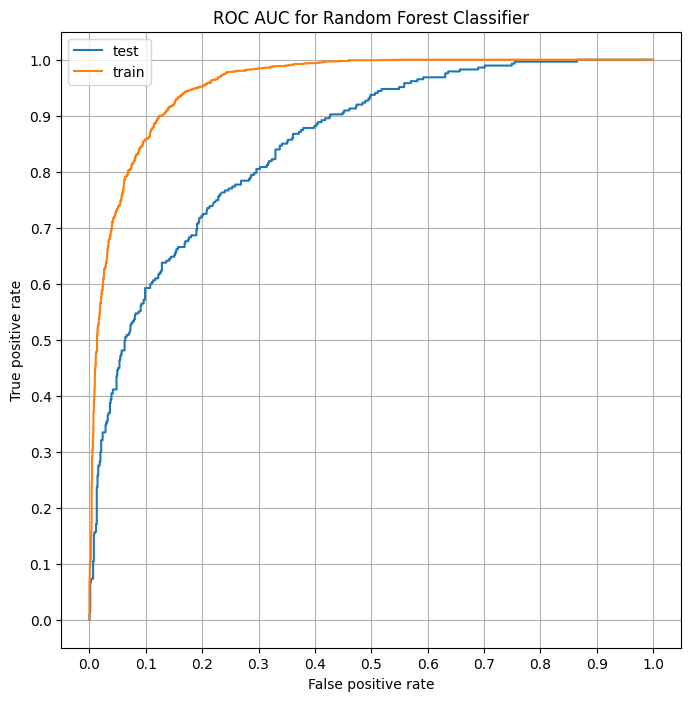

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, rf_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, rf_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for Random Forest Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
rf_roc_auc = roc_auc_score(y_val, rf_val_preds)
rf_roc_auc

0.849914023258971

In [ ]:
rf_precision, rf_recall, thresholds = precision_recall_curve(y_val, rf_val_preds)
rf_auc_pr = auc(rf_recall, rf_precision)
rf_auc_pr

0.6923685602191898

In [ ]:
rf_ap = average_precision_score(y_val, rf_val_preds)
rf_ap

0.6930384347216604

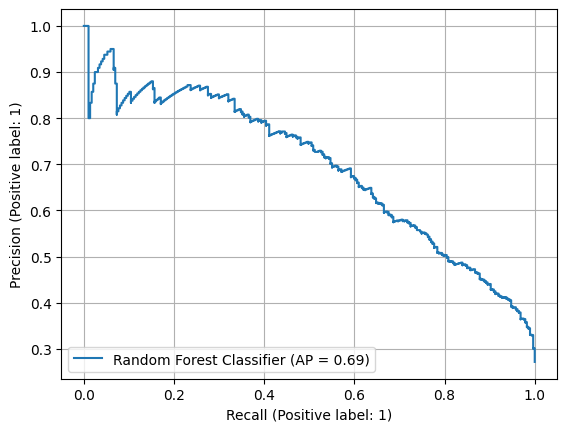

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, rf_val_preds, name='Random Forest Classifier')
plt.grid()
plt.show()

Модель переобучилась. Возможно стоит сделать деревья менее глубокими.

In [ ]:
rf = RandomForestClassifier(
    bootstrap=True, n_estimators=345, max_depth=6,
    ccp_alpha=0.001, criterion='log_loss', max_features='log2',
    random_state=777
)
rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, criterion='log_loss', max_depth=6,
                       max_features='log2', n_estimators=345, random_state=777)

In [ ]:
rf_train_preds = rf.predict_proba(X_train)[:, 1]
rf_val_preds = rf.predict_proba(X_val)[:, 1]

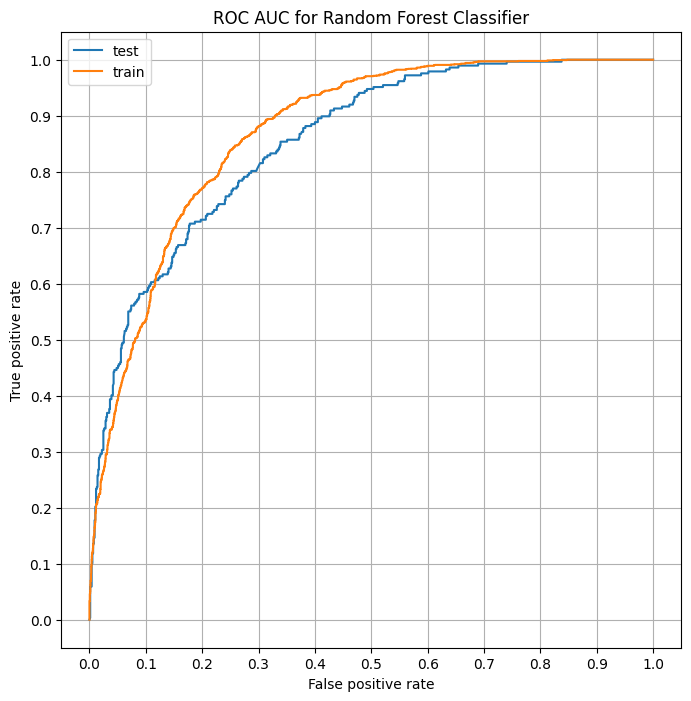

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, rf_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, rf_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for Random Forest Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
rf_roc_auc = roc_auc_score(y_val, rf_val_preds)
rf_roc_auc

0.8541404588442916

In [ ]:
rf_precision, rf_recall, thresholds = precision_recall_curve(y_val, rf_val_preds)
rf_auc_pr = auc(rf_recall, rf_precision)
rf_auc_pr

0.6959850414102395

In [ ]:
rf_ap = average_precision_score(y_val, rf_val_preds)
rf_ap

0.6968874986026111

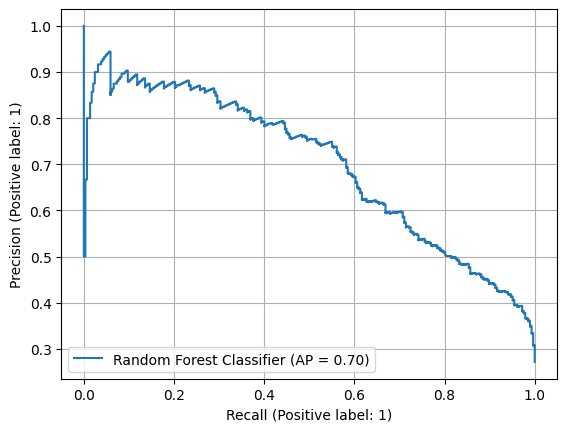

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, rf_val_preds, name='Random Forest Classifier')
plt.grid()
plt.show()

Избавились от переобучения, но ощутимого прироста качества в целом добиться не удалось.

###$Features~selection$

Text(0.5, 1.0, 'Feature importance')

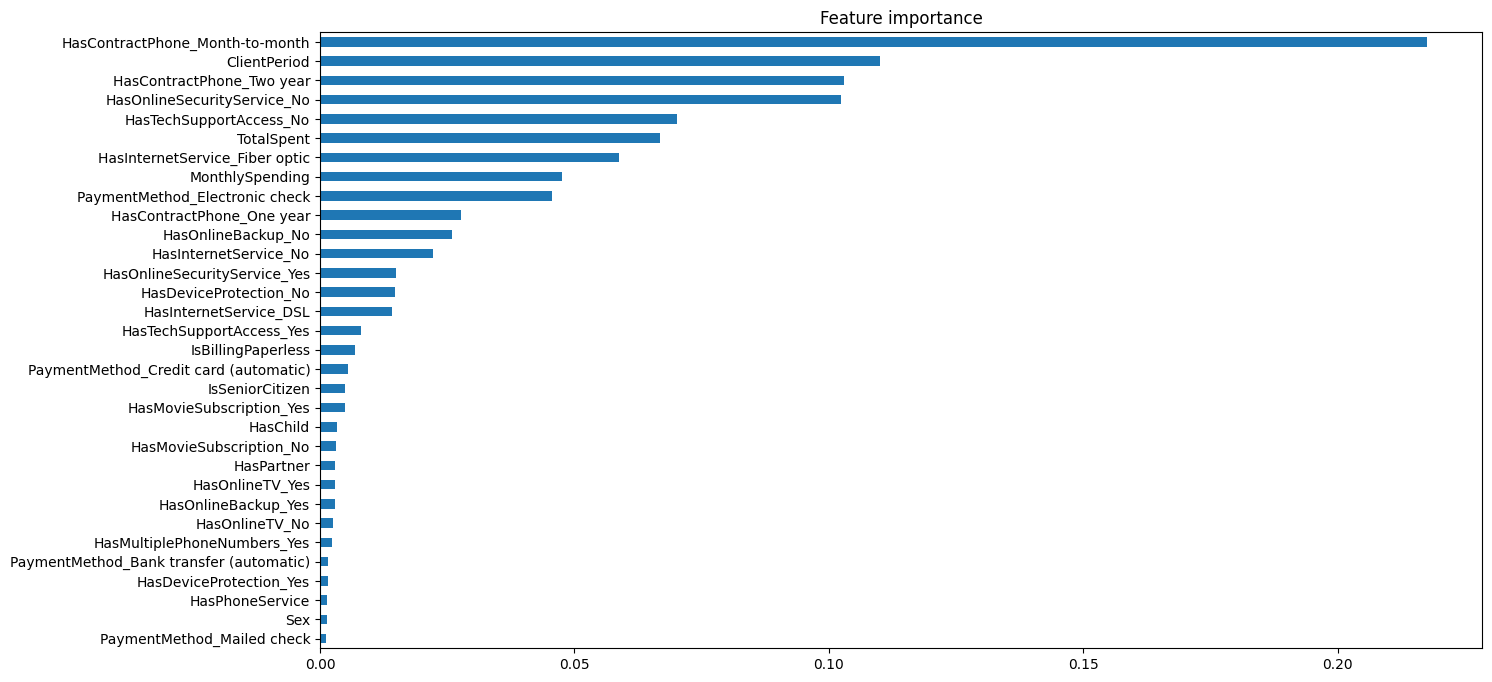

In [ ]:
fi = RandomForestClassifier(n_estimators=2000, min_impurity_decrease=0.001, random_state=777)
fi.fit(X_train, y_train)
feature_importances = fi.feature_importances_
pd.DataFrame(feature_importances, index=X.columns, columns=['importance']) \
              .sort_values('importance').plot(kind='barh', legend=False, figsize=(15, 8));
plt.title('Feature importance')

In [ ]:
np.mean(feature_importances)

0.03125

Как можно видеть, наиболее важны для модели около первых 10-ти признаков.

In [ ]:
# Первоначальная оценка модели дерева решений без выбора признаков
initial_score = np.mean(cross_val_score(RandomForestClassifier(
    n_estimators=2000, min_impurity_decrease=0.001, random_state=777),
                                        X_train, y_train, cv=5))

# Оценка модели дерева решений, используя признаки, выбранные деревом решений
selected_X_by_rf = X_train[:, feature_importances > np.mean(feature_importances)]
score_with_rf_selected_features = np.mean(cross_val_score(
    RandomForestClassifier(n_estimators=2000, min_impurity_decrease=0.001,
                           random_state=777),
    selected_X_by_rf, y_train, cv=5))

print("No features selection: ", initial_score)
print("RF feature selection: ", score_with_rf_selected_features)

No features selection:  0.7750960892627752
RF feature selection:  0.7765339166366587


In [ ]:
def add_del_feature_selection_dt(X, y, feature_importances, initial_features=[], threshold=0.01):
    """
    ADD-DEL Feature Selection Algorithm using Decision Tree feature importances
    :param X: Feature set
    :param y: Target variable
    :param feature_importances: Importance of features as determined by a decision tree
    :param initial_features: List of initially selected features (indices)
    :param threshold: Improvement threshold for feature addition/removal
    :return: List of selected feature indices
    """
    selected_features = list(initial_features)
    features = list(range(X.shape[1]))
    improvement = True

    while improvement:
        improvement = False

        # ADD Step
        for feature in set(features) - set(selected_features):
            current_features = selected_features + [feature]
            score = np.mean(cross_val_score(RandomForestClassifier(
                n_estimators=2000, min_impurity_decrease=0.001, random_state=777),
                                            X[:, current_features], y, cv=5))
            if score - threshold > 0.01:  # Use a fixed threshold for improvement
                selected_features.append(feature)
                threshold = score
                improvement = True

        # DEL Step
        for feature in selected_features:
            if feature_importances[feature] < np.mean(feature_importances):  # Consider removing less important features
                current_features = list(selected_features)
                current_features.remove(feature)
                score = np.mean(cross_val_score(RandomForestClassifier(
                    n_estimators=2000, min_impurity_decrease=0.001, random_state=777),
                                                X[:, current_features], y, cv=5))
                if score - threshold > 0.01:
                    selected_features.remove(feature)
                    threshold = score
                    improvement = True

    return selected_features

In [ ]:
# Выбор признаков с помощью алгоритма ADD-DEL
selected_features = add_del_feature_selection_dt(X_train, y_train, feature_importances)
selected_X = X_train[:, selected_features]
# Обучение и оценка модели RF на выбранных признаках
rf_final = RandomForestClassifier(
    bootstrap=True, n_estimators=345, max_depth=6,
    ccp_alpha=0.001, criterion='log_loss', max_features='log2',
    random_state=777
)
rf_final.fit(selected_X, y_train)

RandomForestClassifier(ccp_alpha=0.001, criterion='log_loss', max_depth=6,
                       max_features='log2', n_estimators=345, random_state=777)

Сличая исходный датафрейм и массив выбранных фичей, идентефицируем названия признаков для каждого вектор-столбца в массиве выбранных фичей. Это делается для того, чтобы "подогнать" валидационный сет под трейн сет по количеству признаков, иначе говоря, чтобы использовать одинковые признаки и на обучении, и на валидации.

In [ ]:
X_tr = pd.DataFrame(X_train, columns=X.columns)
X_v = pd.DataFrame(X_val, columns=X.columns)

In [ ]:
X_tr.iloc[:, 7:]

MonthlySpending  TotalSpent  HasOnlineSecurityService_No  \
0           -1.297350   -0.232893                     0.836660   
1            0.784000   -0.119218                     0.836660   
2            0.251119    1.508963                    -1.195229   
3            0.822063    1.347583                    -1.195229   
4            0.851475    1.849896                     0.836660   
...               ...         ...                          ...   
6251        -0.579345   -0.913125                     0.836660   
6252         1.098884    0.182013                     0.836660   
6253        -1.480744   -0.905695                     0.836660   
6254         0.379149   -0.825143                     0.836660   
6255         0.059074   -0.904637                     0.836660   

      HasOnlineSecurityService_Yes  HasInternetService_DSL  \
0                         -0.57169                1.455022   
1                         -0.57169               -0.687275   
2                          1.74920                1.455022   
3                          1.74920                1.455022   
4                         -0.57169               -0.687275   
...                            ...                     ...   
6251                      -0.57169                1.455022   
6252                      -0.57169               -0.687275   
6253                      -0.57169                1.455022   
6254                      -0.57169               -0.687275   
6255                      -0.57169               -0.687275   

      HasInternetService_Fiber optic  HasInternetService_No  \
0                          -1.027882              -0.445239   
1                           0.972874              -0.445239   
2                          -1.027882              -0.445239   
3                          -1.027882              -0.445239   
4                           0.972874              -0.445239   
...                              ...                    ...   
6251                       -1.027882              -0.445239   
6252                        0.972874              -0.445239   
6253                       -1.027882              -0.445239   
6254                        0.972874              -0.445239   
6255                        0.972874              -0.445239   

      HasTechSupportAccess_No  HasTechSupportAccess_Yes  \
0                    0.849144                 -0.582765   
1                    0.849144                 -0.582765   
2                   -1.177657                  1.715959   
3                   -1.177657                  1.715959   
4                    0.849144                 -0.582765   
...                       ...                       ...   
6251                 0.849144                 -0.582765   
6252                 0.849144                 -0.582765   
6253                 0.849144                 -0.582765   
6254                 0.849144                 -0.582765   
6255                 0.849144                 -0.582765   

      HasContractPhone_Month-to-month  ...  HasOnlineBackup_No  \
0                            0.717730  ...           -1.028869   
1                            0.717730  ...            0.971941   
2                           -1.393281  ...            0.971941   
3                           -1.393281  ...           -1.028869   
4                           -1.393281  ...            0.971941   
...                               ...  ...                 ...   
6251                         0.717730  ...           -1.028869   
6252                         0.717730  ...           -1.028869   
6253                         0.717730  ...            0.971941   
6254                         0.717730  ...            0.971941   
6255                         0.717730  ...            0.971941   

      HasOnlineBackup_Yes  HasOnlineTV_No  HasOnlineTV_Yes  \
0                1.456625        1.130952        -0.809337   
1               -0.686518       -0.884211         1.235579   
2               -0.6865

In [ ]:
selected_X[:, 4:]

array([[ 0.97755539, -1.29734969,  0.71773034],
       [-0.31997308,  0.78399978,  0.71773034],
       [ 1.77281478,  0.25111895, -1.39328094],
       ...,
       [-1.03152095, -1.48074374,  0.71773034],
       [-1.03152095,  0.37914876,  0.71773034],
       [-1.11523247,  0.05907424,  0.71773034]])

In [ ]:
sel_col = ['Sex', 'IsSeniorCitizen', 'HasPartner', 'IsBillingPaperless', 'ClientPeriod',
           'MonthlySpending', 'HasContractPhone_Month-to-month']
selected_X = pd.DataFrame(selected_X, columns=sel_col)

In [ ]:
selected_val = pd.DataFrame(X_v[sel_col], columns=sel_col)

In [ ]:
rf_final_train_preds = rf_final.predict_proba(selected_X)[:, 1]
rf_final_val_preds = rf_final.predict_proba(selected_val)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


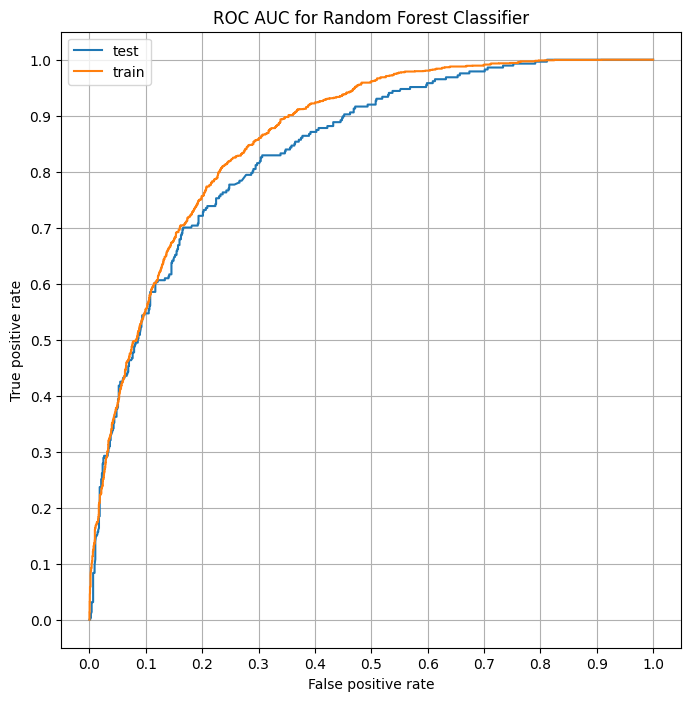

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, rf_final_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, rf_final_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for Random Forest Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
rf_final_roc_auc = roc_auc_score(y_val, rf_final_val_preds)
rf_final_roc_auc

0.8410425811122675

In [ ]:
rf_final_precision, rf_final_recall, thresholds = precision_recall_curve(y_val, rf_final_val_preds)
rf_final_auc_pr = auc(rf_final_recall, rf_final_precision)
rf_final_auc_pr

0.6471198320950894

In [ ]:
rf_final_ap = average_precision_score(y_val, rf_final_val_preds)
rf_final_ap

0.6505030634029009

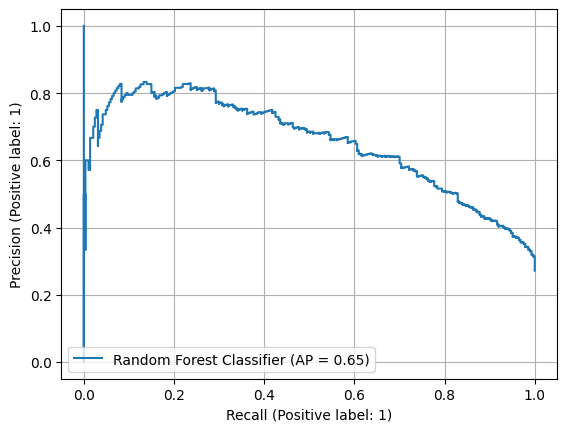

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, rf_final_val_preds, name='Random Forest Classifier')
plt.grid()
plt.show()

В итоге обучили модель случайного леса на 7-ми более важных для модели признаках и получили довольно неплохой скор. Однако выбор наиболее важных для модели признаков не повысил качество предыдущей модели $Random~Forest$. Но, стоит отметить, что отставание не слишком сильное, если учитывать, что мы оставили менее четверти исходного количества признаков. Возможно, больший импакт данное действие дало бы на простом древе решений ($Decision~Tree$).

##$Gradient~Boosting~on~Decision~Trees~(GBDT)$

Градиентный бустинг представляет собой градиентный спуск в пространстве прогнозов композиции моделей на обучающей выборке (эти градиенты могут быть не совсем точные). В качестве базовых моделей можно использовать как линейные модели, так и решающие древа, однако последние зачастую являются традиционным выбором.

Непопулярность линейных моделей для бустинга связана с тем, что градиентный бустинг над линейными моделями в результате даст линейную комбинацию линейных моделей, а линейная комбинация линейных комбинаций есть линейная комбинация. В итоге так же будем иметь линейную модель (или нейросеть с одним полносвязным слоем). Возможности ансамбля эффективно определять нелинейные зависимости в данных уменьшаются.

Попробуем описать интуицию, стоящую за градиентным бустингом. Для решения задачи будем строить композицию $a_N(x)$ из $N$ моделей:
$$a_N(x)=\sum\limits_{i=1}^{N}\gamma_ib_i(x),$$

где $b(x)~-~$базовая модель; для простоты положим $\gamma=1$.

Рассмотрим на примере задачи регрессии с $Huber$-лоссом, у которого $\delta\rightarrow\infty$, и будем минимизировать сумму ошибок:

$$\mathcal{L}(y,~x)=\frac{1}{2}\sum\limits_{i=1}^{N}(y_i-a(x_i))^2\rightarrow\min,$$

где $y_i~-~$ответ для объекта $x_i$.

Используя методы построения решающих деревьев, обучим алгоритм $b_1(x)\in\mathcal{B}$, который наилучшим образом приближает целевую переменную, т.е.:

$$b_1(x)=\underset{b~\in~\mathcal{B}}{\arg\min}~\mathcal{L}(y,~b(x)).$$

Первый алгоритм, скорее всего работает не очень хорошо, в противном случае высока вероятность переобучения (низкий показатель смещения и большой разброс). Для корректировки первого алгоритма $b_1(x)$ строим вторую базовую модель $b_2(x)$, предсказывающую смещение $s_i^{(1)}$:

$$s_i^{(1)}=y_i-b_1(x_i),$$

$$a_2(x_i)=b_1(x_i)+b_2(x_i)=b_1(x_i)+s_i^{(1)}=b_1(x_i)+(y_i-b_1(x_i))=y_i.$$

Выше описан идеальный случай, когда наш второй алгоритм идеально предсказал смещение. Однако на практике всё происходит иначе и необходимо минимизировать функционал:

$$b_2(x)=\underset{b~\in~\mathcal{B}}{\arg\min}~\mathcal{L}(s^{(1)},~b(x)).$$

Ожидаем, что композиция из двух таких моделей $a_2(x)=b_1(x)+b_2(x)$ будет предсказывать целевую переменную более качественно. Далее рассуждения повторяются по индукции и на $N$-м шаге:

$$s_i^{(N-1)}=y_i-\sum\limits_{i=1}^{N-1}b_{N-1}(x_i)=y_i-a_{N-1}(x_i),$$

$$b_N(x)=\underset{b~\in~\mathcal{B}}{\arg\min}~\mathcal{L}(s^{(N-1)},~b(x)),$$

$$a_N=a_{N-1}(x)+b_N(x).$$

Теперь хочется обобщить этот последовательный алгоритм обучения на произвольную функцию потерь. Попробуем это сделать через производную. Для этого посмотрим на производную функции потерь по предсказанию $z=a_k(x_i)$ модели на $k$-м шаге для $i$-го объекта:

$$\left.\frac{\partial\mathcal{L}(y_i,z)}{\partial z}\right\vert_{z=a_k(x_i)}=\left.\frac{\partial}{\partial z}\frac{1}{2}(y_i-z)^2\right\vert_{z=a_k(x_i)}=\left.\frac{2}{2}(y_i-z)*(-1)\right\vert_{z=a_k(x_i)}=a_k(x_i)-y_i.$$

Теперь заметим, что:

$$s_i^{(k)}=y_i-a_k(x_i)=\left.-\frac{\partial\mathcal{L}(y_i,z)}{\partial z}\right\vert_{z=a_k(x_i)}$$

Таким образом, для каждого объекта $x_i$, очередной алгоритм в бустинге учится предсказывать антиградиент функции потерь по предсказанию модели в точке $a_k(x_i)$ предсказания текущей части композиции на объекте $x_i$. Это очень важное наблюдение, поскольку, опираясь на него, можно обобщить подход градиентного бустинга на произвольную дифференцируемую функцию потерь. Т.е. мы заменяем обучение на $s_i^{(k)}$ обучением на антиградиент функции потерь и ожидаем, что в конечном итоге предсказания нашей модели будут как можно ближе к значениям целевой переменной.

Но при обобщении на произвольные дифференцируемые функции мы можем взглянуть на задачу не с точки зрения уменьшения расстояния между вектором предсказаний и вектором истинных значений, а с точки зрения уменьшения значения функции потерь. Для наискорейшего уменьшения значений функции потерь необходимо двигаться в сторону её антиградиента по вектору предсказаний текущей композиции. Это направление не обязательно совпадает с шагом по направлению уменьшения разности предсказания и истинного значения, но оно оказывается наиболее выгодным (наиболее коротким), как показано на рисунке. В изображённом примере рассматриваются два объекта $x_1$ и $x_2$. Текущее предсказание для них – $(a_k(x_i),~a_k(x_2))$, а окружность определяет варианты следующего шага: первый вариант$~-~$пойти в направлении $(s_1^{(k)},~s_2^{(k)})$, как делалось ранее; второй$~-~$пойти в направлении антиградиента. Также показаны линии уровня значений функции потерь. Функция потерь в этом примере устроена таким образом, что $L_2<L_1$, из-за чего шаг по антиградиенту оказывается более выгодным.

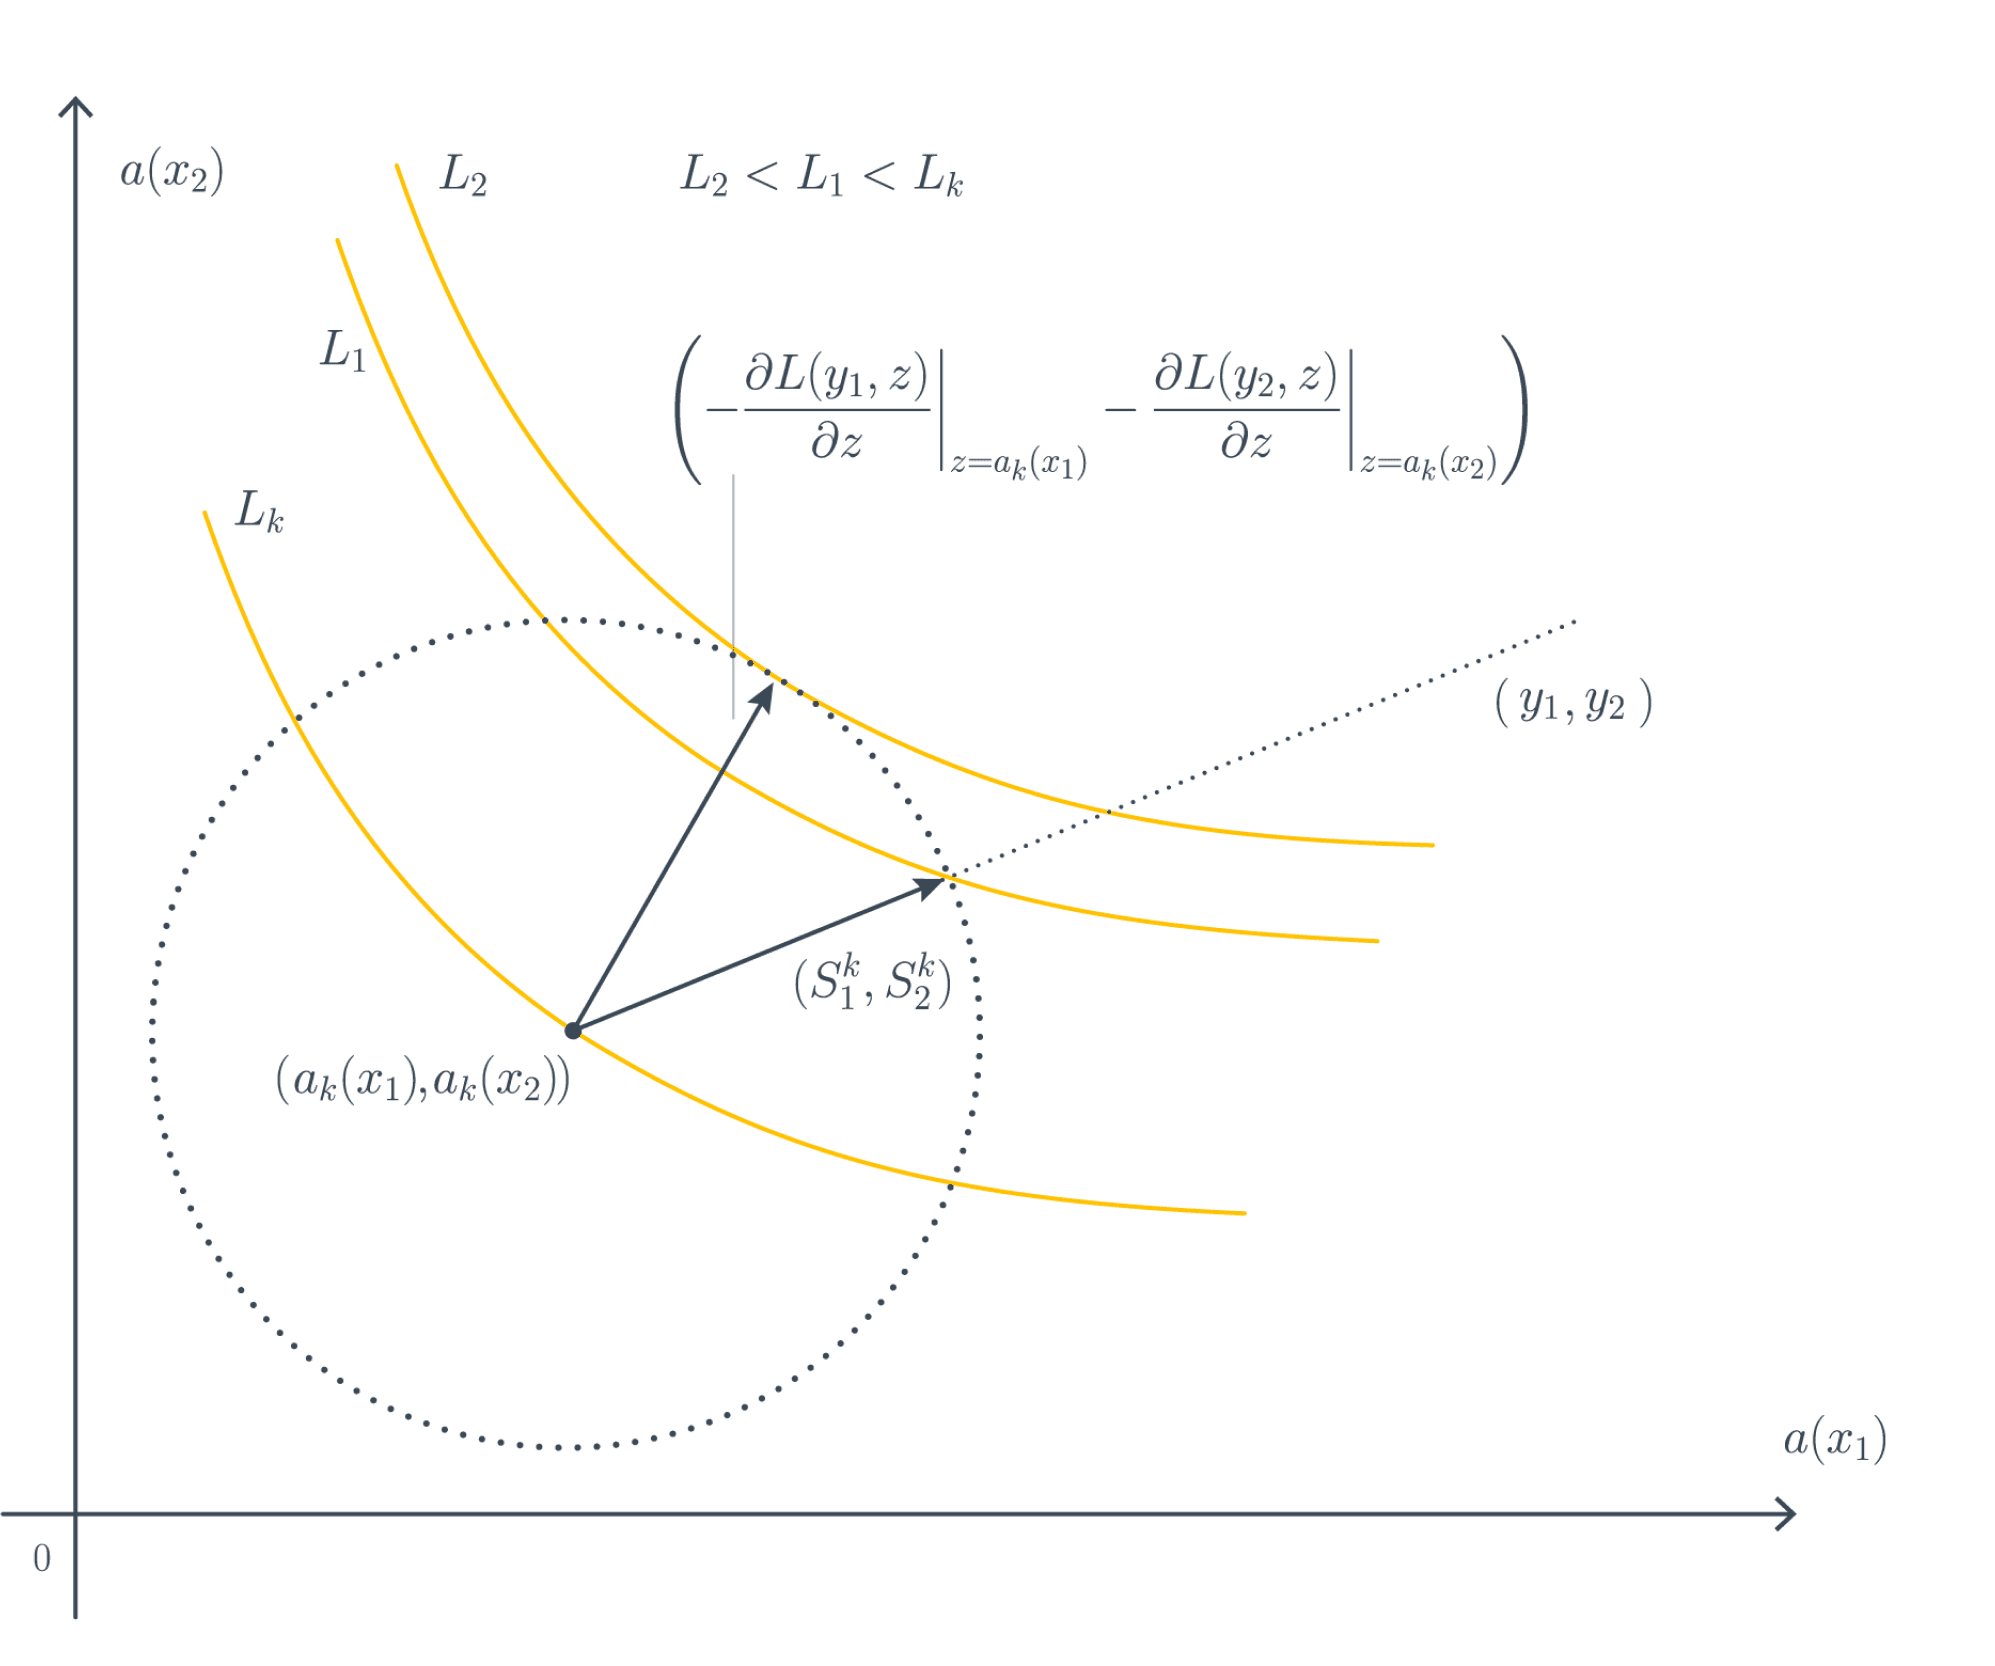

Для задач классификации меняется только лосс $\mathcal{L}(y, z)$, который можно взять, например, из логистической регрессии или $SVM$. Хорошей идеей является бустинг над решающими деревьями. На шаге обучения, не равном $1$, мы обучаем очередной алгоритм предсказывать смещение композиции на предыдущем шаге обучения, которое, как описано выше, для каждого объекта можно представить в виде производной выбранной функции потерь по предсказанию композиции для данного объекта. А затем умножаем это смещение на истинное значение целевой переменной для данного объекта (просто по определению смещения, или отступа, $margin$, для классификационных моделей):

$$s_i^{(k)}=\left.y_{i}\underbrace{\left(-\frac{\partial\mathcal{L}(y_i,z)}{\partial z}\right)}_{вес~ответа~модели}\right\vert_{z=a_{k-1}(x_i)}$$

Вспомним, что решающее дерево разбивает все пространство на непересекающиеся области, в каждой из которых его ответ равен константе:

$$b_k(x)=\sum\limits_{j=1}^{J_n}b_{nj}[x\in R_j],$$

где $J_n~-~$количество листьев в дереве; $R_j~-~$соответствующие области разбиения; $b_{nj}~-~$значения в листьях.

Значит, на $N$-й итерации бустинга композиция обновляется как:

$$a_N(x)=a_{N-1}(x)+\gamma_N\sum\limits_{j=1}^{J_N}b_{Nj}[x\in R_j]=a_{N-1}(x)+\sum\limits_{j-1}^{J_N}\gamma_Nb_{Nj}[x\in R_j].$$

Видно, что добавление в композицию одного дерева с $J_N$ листьями равносильно добавлению $J_N$ базовых алгоритмов, представляющих собой предикаты вида $[x\in R_j]$. Если бы вместо общего коэффициента $\gamma_N$ был свой коэффициент $\gamma_{Nj}$ при каждом предикате, то мы могли бы его подобрать так, чтобы повысить качество композиции. Если подбирать свой коэффициент $\gamma_{Nj}$ при каждом слагаемом, то потребность в $b_{Nj}$ отпадает, его можно просто убрать:

$$\sum\limits_{i=1}^{\mathcal{l}}\mathcal{L}\left(y_i,~a_{N-1}(x_i)+\sum\limits_{j=1}^{J_N}\gamma_{Nj}[x\in R_j]\right)\rightarrow\underset{\{\gamma_{Nj}\}_{j=1}^{J_N}}{\min}.$$

Поскольку области разбиения $R_j$ не пересекаются, данная задача распадается на $J_N$ независимых подзадач:

$$\gamma_{Nj}=\underset{\gamma}{\arg\min}\sum\limits_{x_i~\in~R_j}\mathcal{L}(y_i,~a_{N-1}(x_i)+\gamma)$$

Функционал для оптимизации градиентного бустинга можно получить разложением $\mathcal{L}$ в ряд Тейлора до второго члена с центром в ответе композиции $a_{N-1}(x_i)$:

$$\sum\limits_{i=1}^{l}\mathcal{L}(y_i,a_{N-1}(x_i)+b(x_i))\approx\sum\limits_{i=1}^l\left(\mathcal{L}(y_i,a_{N-1}(x_i))+b_N(x_i)\underbrace{\left.\frac{\partial\mathcal{L}(y_i,z)}{\partial z}\right\vert_{z=a_{N-1}(x_i)}}_{s_i}+\frac{1}{2}b_N^2(x_i)\underbrace{\left.\frac{\partial^2\mathcal{L}(y_i,z)}{\partial z^2}\right\vert_{z=a_{N-1}(x_i)}}_{h_i}\right)\rightarrow\min_{b~\in~\mathcal{B}}$$

В градиентном бустинге, используя аппроксимацию второго порядка при обучении очередного алгоритма, мы наивно полагаем $h_i=1$, предполагая таким образом одинаковую кривизну функции по всем направлениям.

###$LightGBM$

In [ ]:
!pip install lightgbm
import lightgbm as lgb

In [ ]:
def objective(trial):
    # Гиперпараметры для оптимизации
    n_estimators = trial.suggest_int('n_estimators', 2, 400, log=True)
    max_depth = trial.suggest_int('max_depth', 2, 30, log=True)
    max_bin = trial.suggest_int('max_bin', 8, 512, log=True)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 2, 64, log=True)
    min_sum_hess = trial.suggest_float('min_sum_hessian_in_leaf', 1e-5, 1e-1, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.1, log=True)
    boost = trial.suggest_categorical('boost_from_average', [True, False])
    num_leaves = trial.suggest_int('num_leaves', 32, 256, log=True)
    num_iterations = trial.suggest_int('num_iterations', 100, 10000, log=True)
    bag_frac = trial.suggest_float('bagging_fraction', 0.1, 1, log=True)
    bag_freq = trial.suggest_int('bagging_freq', 0, 20)
    feat_frac = trial.suggest_float('feature_fraction', 0.1, 1, log=True)
    l1 = trial.suggest_int('lambda_l1', 0, 100, step=5)
    l2 = trial.suggest_int('lambda_l2', 0, 100, step=5)
    smooth = trial.suggest_float('path_smooth', 0.1, 10, log=True)
    dropout = trial.suggest_float('drop_rate', 0.1, 0.9, log=True)
    extra = trial.suggest_categorical('extra_trees', [True, False])


    clf = lgb.LGBMClassifier(
        device_type='cpu', objective='binary', num_threads=0, max_bin=max_bin,
        n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
        boost_from_average=boost, num_leaves=num_leaves, num_iterations=num_iterations,
        data_sample_strategy='bagging', drop_rate=dropout,
        min_data_in_leaf=min_data_in_leaf, min_sum_hessian_in_leaf=min_sum_hess,
        bagging_fraction=bag_frac, bagging_freq=bag_freq, feature_fraction=feat_frac,
        lambda_l2=l2, lambda_l1=l1, path_smooth=smooth, extra_trees=extra, random_state=777
    )

    return cross_val_score(
        clf, X_train, y_train, n_jobs=-1, cv=5, scoring='roc_auc'
    ).mean()

lgboost = optuna.create_study(direction='maximize')

[I 2023-11-06 12:12:38,443] A new study created in memory with name: no-name-36fc7a89-65b6-4b1c-8387-47b1858aa90f


In [ ]:
%%time
%%capture captured
np.random.seed(777)
lgboost.optimize(objective, n_trials=200)

In [ ]:
trial = lgboost.best_trial
print("Best params:", trial.params)
print("Best cross validaton score", trial.value)

Best params: {'n_estimators': 29, 'max_depth': 5, 'max_bin': 364, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 0.002084875812954595, 'learning_rate': 0.06190202954464691, 'boost_from_average': True, 'num_leaves': 216, 'num_iterations': 3839, 'bagging_fraction': 0.5069247326194448, 'bagging_freq': 9, 'feature_fraction': 0.21978074874272813, 'lambda_l1': 0, 'lambda_l2': 0, 'path_smooth': 0.13580379067172513, 'drop_rate': 0.2923722664898069, 'extra_trees': False}
Best cross validaton score 0.9447370527411734


In [ ]:
lb = lgb.LGBMClassifier(
    device_type='cpu', objective='binary', num_threads=0, max_bin=364,
    n_estimators=29, max_depth=5, learning_rate=0.062, boost_from_average=True,
    num_leaves=216, num_iterations=3839, data_sample_strategy='bagging', drop_rate=0.292,
    min_data_in_leaf=7, min_sum_hessian_in_leaf=0.002, bagging_fraction=0.507,
    bagging_freq=9, feature_fraction=0.22, lambda_l2=0, lambda_l1=0, path_smooth=0.136,
    extra_trees=False, verbose=-1, random_state=777
)
lb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMClassifier(bagging_fraction=0.507, bagging_freq=9, boost_from_average=True,
               data_sample_strategy='bagging', device_type='cpu',
               drop_rate=0.292, extra_trees=False, feature_fraction=0.22,
               lambda_l1=0, lambda_l2=0, learning_rate=0.062, max_bin=364,
               max_depth=5, min_data_in_leaf=7, min_sum_hessian_in_leaf=0.002,
               n_estimators=29, num_iterations=3839, num_leaves=216,
               num_threads=0, objective='binary', path_smooth=0.136,
               random_state=777, verbose=-1)

In [ ]:
lb_train_preds = lb.predict_proba(X_train)[:, 1]
lb_val_preds = lb.predict_proba(X_val)[:, 1]

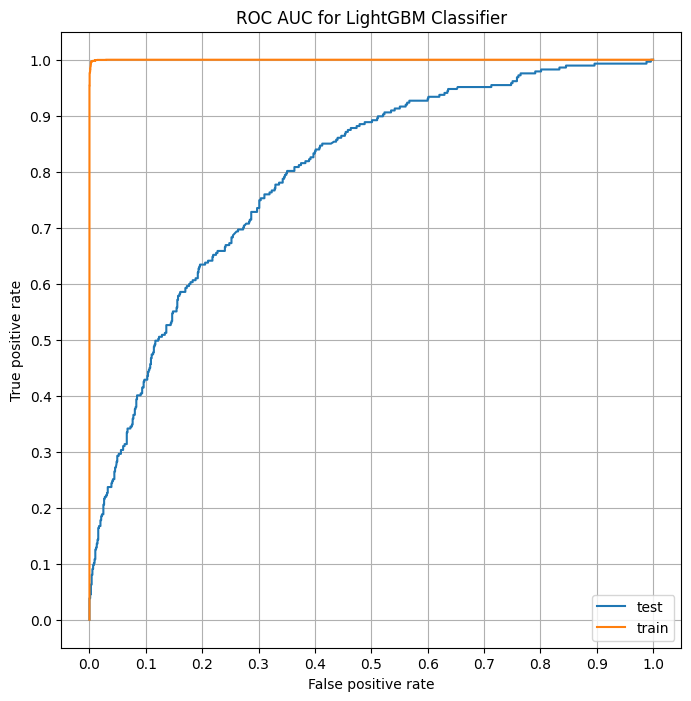

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, lb_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, lb_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for LightGBM Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
lb_roc_auc = roc_auc_score(y_val, lb_val_preds)
lb_roc_auc

0.7953776188967827

In [ ]:
lb_precision, lb_recall, thresholds = precision_recall_curve(y_val, lb_val_preds)
lb_auc_pr = auc(lb_recall, lb_precision)
lb_auc_pr

0.6008845378947458

In [ ]:
lb_ap = average_precision_score(y_val, lb_val_preds)
lb_ap

0.6018900532078818

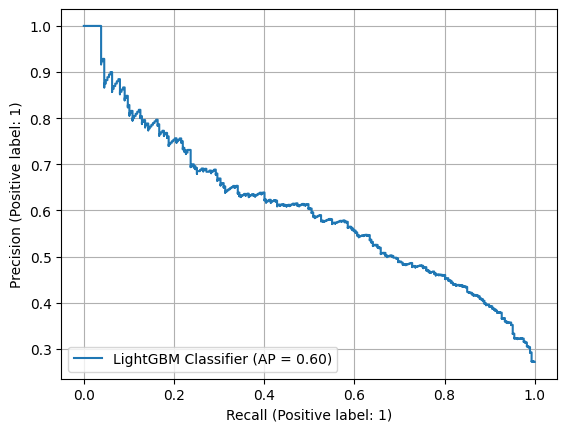

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, lb_val_preds, name='LightGBM Classifier')
plt.grid()
plt.show()

Снова очевидное переобучение, нужно выбирать более простые модели, чтобы избежать столь явного переобучения.

In [ ]:
lb = lgb.LGBMClassifier(
    device_type='cpu', objective='binary', num_threads=0, max_bin=128,
    n_estimators=50, max_depth=2, learning_rate=0.024, boost_from_average=True,
    num_leaves=128, num_iterations=295, data_sample_strategy='bagging', drop_rate=0.137,
    min_data_in_leaf=24, min_sum_hessian_in_leaf=0.0076, bagging_fraction=0.35,
    bagging_freq=10, feature_fraction=0.1, lambda_l2=0, lambda_l1=0, path_smooth=7.25,
    extra_trees=False, verbose=-1, random_state=777
)
lb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMClassifier(bagging_fraction=0.35, bagging_freq=10, boost_from_average=True,
               data_sample_strategy='bagging', device_type='cpu',
               drop_rate=0.137, extra_trees=False, feature_fraction=0.1,
               lambda_l1=0, lambda_l2=0, learning_rate=0.024, max_bin=128,
               max_depth=2, min_data_in_leaf=24, min_sum_hessian_in_leaf=0.0076,
               n_estimators=50, num_iterations=295, num_leaves=128,
               num_threads=0, objective='binary', path_smooth=7.25,
               random_state=777, verbose=-1)

In [ ]:
lb_train_preds = lb.predict_proba(X_train)[:, 1]
lb_val_preds = lb.predict_proba(X_val)[:, 1]

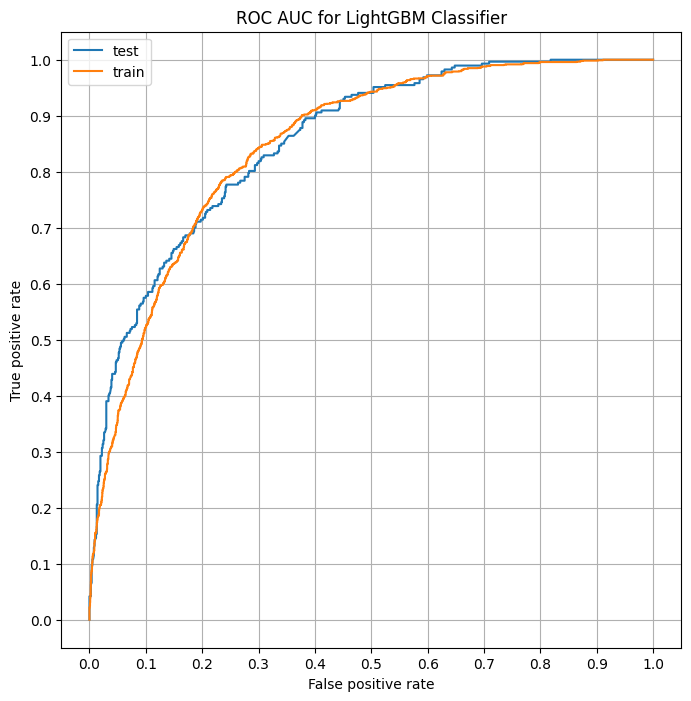

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, lb_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, lb_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for LightGBM Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
lb_roc_auc = roc_auc_score(y_val, lb_val_preds)
lb_roc_auc

0.8545748676410697

In [ ]:
lb_precision, lb_recall, thresholds = precision_recall_curve(y_val, lb_val_preds)
lb_auc_pr = auc(lb_recall, lb_precision)
lb_auc_pr

0.6986828622751544

In [ ]:
lb_ap = average_precision_score(y_val, lb_val_preds)
lb_ap

0.699400549278529

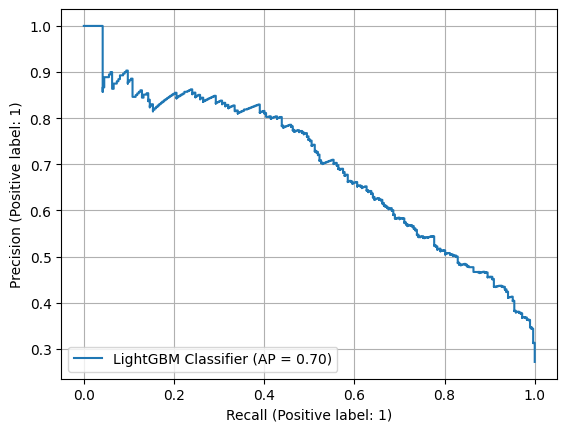

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, lb_val_preds, name='LightGBM Classifier')
plt.grid()
plt.show()

###$XGBoost$

In [ ]:
!pip install xgboost

from xgboost import XGBClassifier

def objective(trial):
    # Гиперпараметры для оптимизации
    n_estimators = trial.suggest_int('n_estimators', 2, 400, log=True)
    max_depth = trial.suggest_int('max_depth', 2, 10, log=True)
    binary = trial.suggest_categorical('objective', ['binary:logistic', 'binary:logitraw', 'binary:hinge'])
    booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])
    max_bin = trial.suggest_int('max_bin', 8, 512, log=True)
    method = trial.suggest_categorical('tree_method', ['exact', 'approx', 'hist'])
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.1, log=True)
    num_leaves = trial.suggest_int('num_leaves', 32, 256, log=True)
    norm = trial.suggest_categorical('normalize_type', ['tree', 'forest'])
    child_weight = trial.suggest_int('min_child_weight', 1, 10, log=True)
    gamma = trial.suggest_float('gamma', 0.5, 5.0, log=True)
    subsample = trial.suggest_float('subsample', 0.2, 1.0, log=True)
    colsample = trial.suggest_float('colsample_bytree', 0.2, 1.0, log=True)

    clf = XGBClassifier(
        n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
        objective=binary, booster=booster, max_bin=max_bin, tree_method=method,
        num_leaves=num_leaves, normalize_type=norm, min_child_weight=child_weight,
        gamma=gamma, subsample=subsample, colsample_bytree=colsample, random_state=777
    )

    return cross_val_score(
        clf, X_train, y_train, n_jobs=-1, cv=5, scoring='roc_auc'
    ).mean()

xgboost = optuna.create_study(direction='maximize')

[I 2023-11-13 18:57:11,911] A new study created in memory with name: no-name-a73e4071-968c-4e94-a4f5-39a03b9e1803


In [ ]:
%%time
%%capture captured
np.random.seed(777)
xgboost.optimize(objective, n_trials=200)

In [ ]:
trial = xgboost.best_trial
print("Best params:", trial.params)
print("Best cross validaton score", trial.value)

Best params: {'n_estimators': 395, 'max_depth': 9, 'objective': 'binary:logitraw', 'booster': 'dart', 'max_bin': 373, 'tree_method': 'approx', 'learning_rate': 0.08770889493658117, 'num_leaves': 108, 'normalize_type': 'forest', 'min_child_weight': 1, 'gamma': 0.5679310962995355, 'subsample': 0.6594331711206101, 'colsample_bytree': 0.933541732975806}
Best cross validaton score 0.9453632859373883


In [ ]:
xgb = XGBClassifier(
    n_estimators=395, max_depth=9, learning_rate=0.088, objective='binary:logitraw',
    booster='dart', max_bin=373, tree_method='approx', num_leaves=108,
    normalize_type='forest', min_child_weight=1, gamma=0.57, subsample=0.66,
    colsample_bytree=0.93, verbose=-1, random_state=777
)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:57:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_leaves", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.93, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.57, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.088, max_bin=373,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=395, n_jobs=None,
              normalize_type='forest', num_leaves=108, ...)

In [ ]:
xgb_train_preds = xgb.predict_proba(X_train)[:, 1]
xgb_val_preds = xgb.predict_proba(X_val)[:, 1]

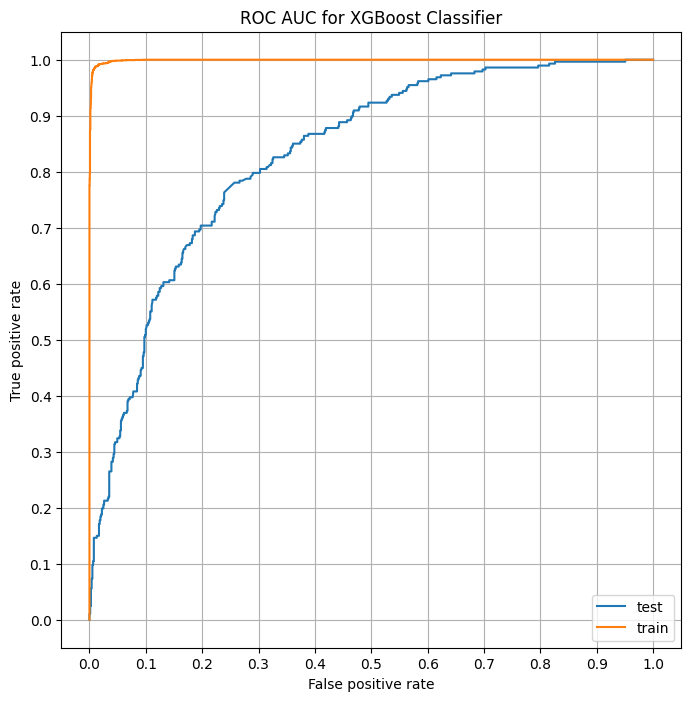

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, xgb_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, xgb_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for XGBoost Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
xgb_roc_auc = roc_auc_score(y_val, xgb_val_preds)
xgb_roc_auc

0.8300828091768858

In [ ]:
xgb_precision, xgb_recall, thresholds = precision_recall_curve(y_val, xgb_val_preds)
xgb_auc_pr = auc(xgb_recall, xgb_precision)
xgb_auc_pr

0.6359323082960844

In [ ]:
xgb_ap = average_precision_score(y_val, xgb_val_preds)
xgb_ap

0.6371554571591647

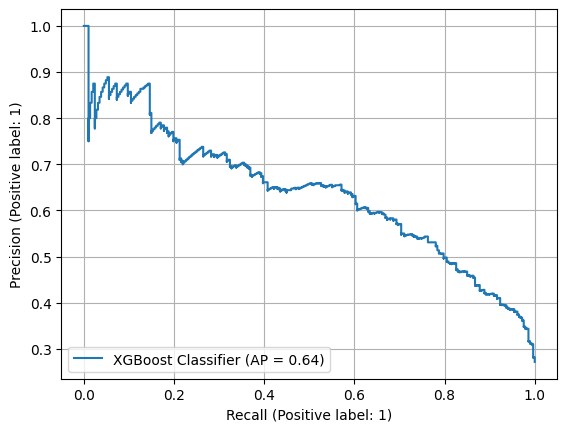

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, xgb_val_preds, name='XGBoost Classifier')
plt.grid()
plt.show()

Переобучение.

In [ ]:
xgb = XGBClassifier(
    n_estimators=95, max_depth=2, learning_rate=0.118, objective='binary:logitraw',
    booster='dart', max_bin=15, tree_method='approx', num_leaves=32,
    normalize_type='forest', min_child_weight=1, gamma=0.57, subsample=0.6,
    colsample_bytree=0.93, verbose=-1, random_state=777
)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:58:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_leaves", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.93, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.57, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.118, max_bin=15,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=95, n_jobs=None,
              normalize_type='forest', num_leaves=32, ...)

In [ ]:
xgb_train_preds = xgb.predict_proba(X_train)[:, 1]
xgb_val_preds = xgb.predict_proba(X_val)[:, 1]

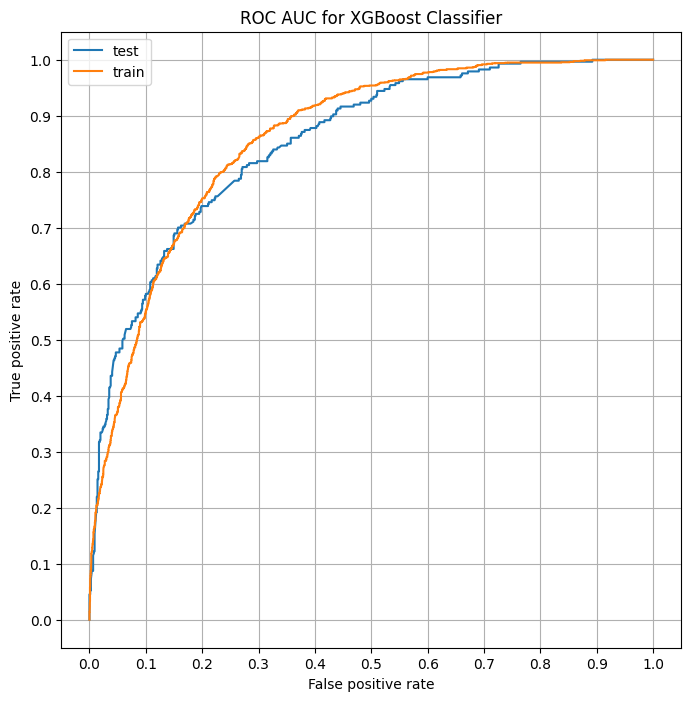

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, xgb_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, xgb_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for XGBoost Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
xgb_roc_auc = roc_auc_score(y_val, xgb_val_preds)
xgb_roc_auc

0.8542241730395039

In [ ]:
xgb_precision, xgb_recall, thresholds = precision_recall_curve(y_val, xgb_val_preds)
xgb_auc_pr = auc(xgb_recall, xgb_precision)
xgb_auc_pr

0.7062724381316274

In [ ]:
xgb_ap = average_precision_score(y_val, xgb_val_preds)
xgb_ap

0.7063943950548586

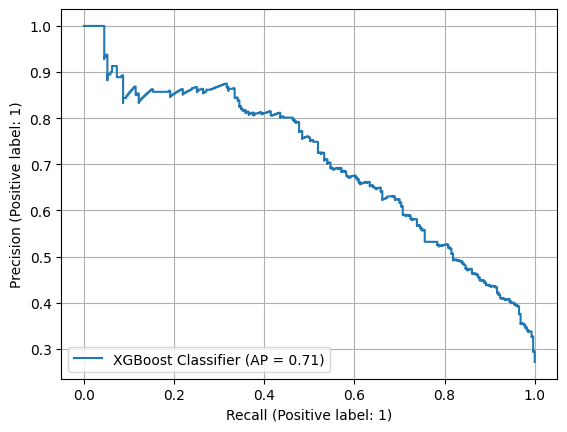

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, xgb_val_preds, name='XGBoost Classifier')
plt.grid()
plt.show()

###$CatBoost$

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier, Pool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [ ]:
def objective(trial):
    # Гиперпараметры для оптимизации
    n_estimators = trial.suggest_int('n_estimators', 50, 300, log=True)
    max_depth = trial.suggest_int('max_depth', 2, 6, log=True)
    min_data = trial.suggest_int('min_data_in_leaf', 5, 21, log=True)
    eta = trial.suggest_float('eta', 0.08, 0.12, log=True)
    l2 = trial.suggest_float('l2_leaf_reg', 0.5, 3.5, log=True)
    strength = trial.suggest_float('random_strength', 0.8, 1.2, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.1, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0, log=True)

    clf = CatBoostClassifier(
        grow_policy='Lossguide', eval_metric='AUC:hints=skip_train~false',
        loss_function='Logloss', auto_class_weights='Balanced', logging_level='Silent',
        n_estimators=n_estimators, max_depth=max_depth, subsample=subsample,
        l2_leaf_reg=l2, random_strength=strength, eta=eta, min_data_in_leaf=min_data,
        random_state=777
    )

    return cross_val_score(
        clf, X_train, y_train, n_jobs=-1, cv=5, scoring='roc_auc'
    ).mean()

catboost = optuna.create_study(direction='maximize')

[I 2023-11-06 20:55:53,878] A new study created in memory with name: no-name-9151e013-5417-4779-be53-6680ee9bc303


In [ ]:
%%time
%%capture captured
np.random.seed(777)
catboost.optimize(objective, n_trials=200)

In [ ]:
trial = catboost.best_trial
print("Best params:", trial.params)
print("Best cross validaton score", trial.value)

Best params: {'n_estimators': 299, 'max_depth': 6, 'min_data_in_leaf': 6, 'eta': 0.1156397399549964, 'l2_leaf_reg': 0.6274097939384029, 'random_strength': 0.868927091469372, 'learning_rate': 0.012902235128513786, 'subsample': 0.9272510155942822}
Best cross validaton score 0.9567762308485337


In [ ]:
CBC = CatBoostClassifier(**{'loss_function': 'Logloss',
                                'logging_level': 'Silent',
                                'auto_class_weights': 'Balanced',
                                'eval_metric': 'AUC:hints=skip_train~false',
                                'grow_policy': 'Lossguide',
                                'min_data_in_leaf': 6,
                                'random_seed': 777,
                                'depth': 6,
                                'iterations': 200,
                                'subsample': 0.9272510155942822,
                                'random_strength': 0.868927091469372,
                                'learning_rate': 0.013,
                                'l2_leaf_reg': 0.6274097939384029})

train = Pool(X_train, label=y_train)
CBC.fit(train)

In [ ]:
CBC.best_score_

{'learn': {'Logloss': 0.41387722963654894, 'AUC': 0.8988754938481565}}

In [ ]:
cbc_train_preds = CBC.predict_proba(X_train)[:, 1]
cbc_val_preds = CBC.predict_proba(X_val)[:, 1]

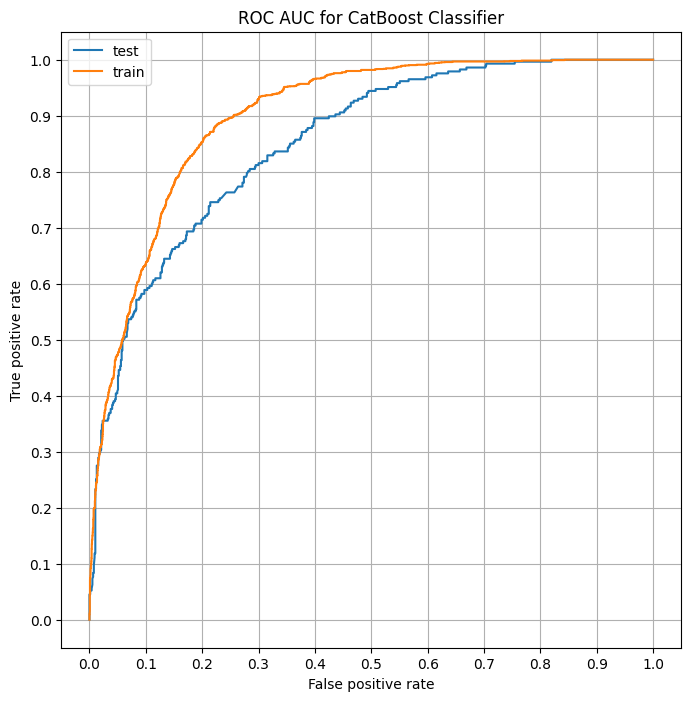

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, cbc_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, cbc_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for CatBoost Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
cbc_roc_auc = roc_auc_score(y_val, cbc_val_preds)
cbc_roc_auc

0.8520521290556132

In [ ]:
cbc_precision, cbc_recall, thresholds = precision_recall_curve(y_val, cbc_val_preds)
cbc_auc_pr = auc(cbc_recall, cbc_precision)
cbc_auc_pr

0.6971847244552493

In [ ]:
cbc_ap = average_precision_score(y_val, cbc_val_preds)
cbc_ap

0.6977779546395942

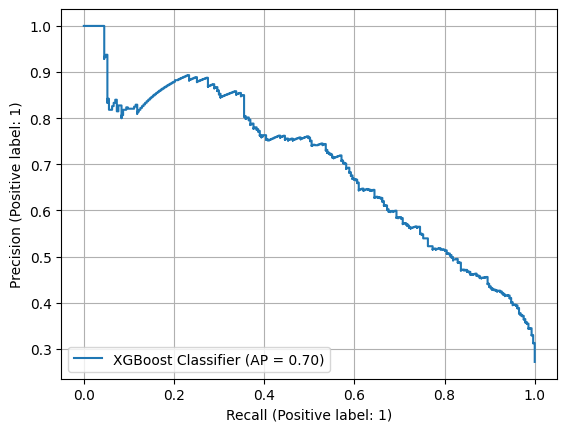

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, cbc_val_preds, name='XGBoost Classifier')
plt.grid()
plt.show()

Опять немного переобучились.

In [ ]:
CBC = CatBoostClassifier(**{'loss_function': 'Logloss',
                                'logging_level': 'Silent',
                                'auto_class_weights': 'Balanced',
                                'eval_metric': 'AUC:hints=skip_train~false',
                                'grow_policy': 'Lossguide',
                                'min_data_in_leaf': 3,
                                'random_seed': 777,
                                'depth': 3,
                                'iterations': 250,
                                'subsample': 0.56,
                                'random_strength': 1.14,
                                'learning_rate': 0.03,
                                'l2_leaf_reg': 2.5})

train = Pool(X_train, label=y_train)
CBC.fit(train)

In [ ]:
CBC.best_score_

{'learn': {'Logloss': 0.45039673816744974, 'AUC': 0.8689691655601416}}

In [ ]:
cbc_train_preds = CBC.predict_proba(X_train)[:, 1]
cbc_val_preds = CBC.predict_proba(X_val)[:, 1]

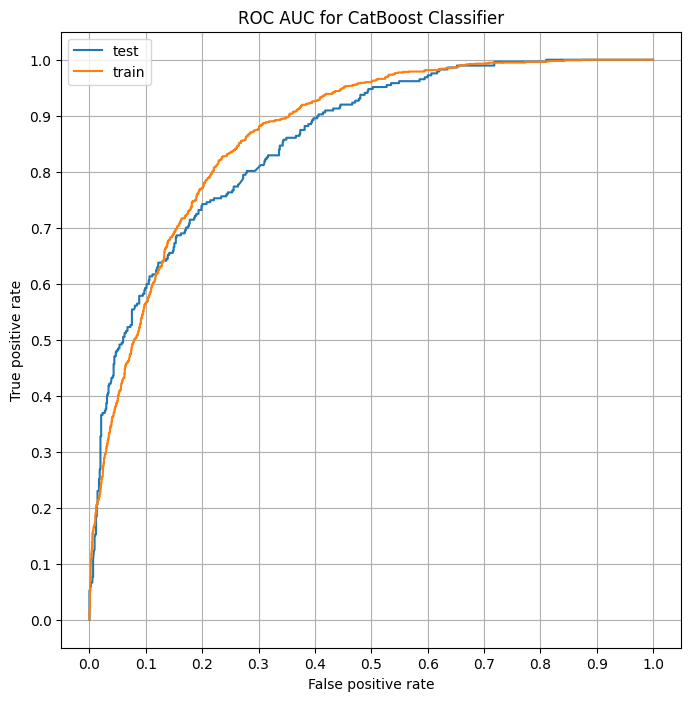

In [ ]:
fig, axs = plt.subplots(figsize = (8, 8))
axs.plot(*roc_curve(y_val, cbc_val_preds)[:2], label = 'test')
axs.plot(*roc_curve(y_train, cbc_train_preds)[:2], label = 'train')
axs.legend()
axs.set(xlabel = 'False positive rate', ylabel = 'True positive rate',
        title = f'ROC AUC for CatBoost Classifier')
plt.grid()
axs.set_yticks(np.linspace(0, 1, 11))
axs.set_xticks(np.linspace(0, 1, 11));

In [ ]:
cbc_roc_auc = roc_auc_score(y_val, cbc_val_preds)
cbc_roc_auc

0.8571066564097922

In [ ]:
cbc_precision, cbc_recall, thresholds = precision_recall_curve(y_val, cbc_val_preds)
cbc_auc_pr = auc(cbc_recall, cbc_precision)
cbc_auc_pr

0.7066904559770002

In [ ]:
cbc_ap = average_precision_score(y_val, cbc_val_preds)
cbc_ap

0.7073077991325395

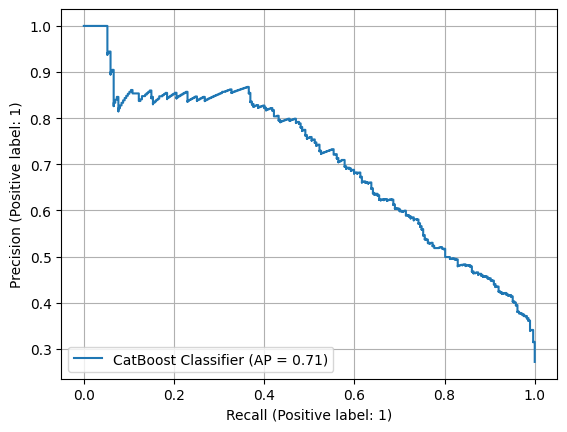

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, cbc_val_preds, name='CatBoost Classifier')
plt.grid()
plt.show()

#Итог

In [ ]:
metrics = np.array([naive_roc_auc, naive_auc_pr, naive_ap, random_roc_auc,
                    random_auc_pr, random_ap, gnb_auc_roc, gnb_auc_pr, gnb_ap,
                    dt_roc_auc, dt_auc_pr, dt_ap, svm_roc_auc, svm_auc_pr,
                    svm_ap, lr_roc_auc, lr_auc_pr, lr_ap, rf_roc_auc,
                    rf_auc_pr, rf_ap, rf_final_roc_auc, rf_final_auc_pr,
                    rf_final_ap, lb_roc_auc, lb_auc_pr, lb_ap, xgb_roc_auc,
                    xgb_auc_pr, xgb_ap, cbc_roc_auc, cbc_auc_pr, cbc_ap]).reshape(11, 3)

rows = ['Naive Classifier (4 features)',
        'Random Classifier',
        'Gaussian Naive Bayes Classifier',
        'Decision Tree Classifier',
        'SVM Classifier',
        'Logistic Regression',
        'Random Forest',
        'Random Forest with features selection',
        'LightGBM',
        'XGBoost',
        'CatBoost']
cols = ['AUC ROC', 'AUC PR', 'AP']

metrics2 = pd.DataFrame(metrics, index=rows, columns=cols)

metrics2.sort_values(by=cols, ascending=False)

AUC ROC    AUC PR        AP
CatBoost                               0.857107  0.706690  0.707308
Logistic Regression                    0.855541  0.699322  0.700273
LightGBM                               0.854575  0.698683  0.699401
XGBoost                                0.854224  0.706272  0.706394
Random Forest                          0.854140  0.695985  0.696887
SVM Classifier                         0.853206  0.695886  0.696784
Gaussian Naive Bayes Classifier        0.841676  0.657383  0.659941
Random Forest with features selection  0.841043  0.647120  0.650503
Decision Tree Classifier               0.804050  0.548976  0.572446
Naive Classifier (4 features)          0.730250  0.466310  0.468252
Random Classifier                      0.498538  0.272104  0.274055

В целом, все модели превзошли бейзлайны (рандомный классификатор и классификатор на основе 4-х признаков), и, как оказалось позже, достаточно всего 7-ми признаков, чтобы делать хорошие предсказания моделью $Random~Forest$. Много раз пришлось столкнуться с переобучением: в методе опорных векторов, случайном лесу, бустинге. Однако во всех случаях удалось успешно его побороть. Наилучшие результаты демонстрируют бустинги, но стоит отметить, что логистическая регрессия в общем зачёте занимает второе место. По результатам ожидал большего, но и так продемонстрированы неплохие метрики.

Улучшить показатели целевой метрики можно несколькими путями, но из наиболее очевидных:

*   стекинг лучших моделей. Даже кажется, что для стекинга было бы хорошо обучить ещё и $KNN$-классификатор.
*   также стоит обучаться на всём датасете, а не делить его на трейн и валидацию. На данный момент это не реализовано, поскольку для тестовой выборки есть только признаковое описание, а ответы модели тестируются и оцениваются на $Kaggle$ по метрике $AUC~ROC$. Неудобство состоит в том, что количество посылок в день там ограничено. Именно поэтому в рамках нашей учебной задачи было решено поделить обучающую выборку в соотношении $80\%$ на $20\%$. Однако $CatBoost$ был протестирован и получен в целом неплохой скор, который продемонстрирован на рисунке ниже.
*   возможно, повысить показатели метрики поможет также грамотный $feature~engineering$.  

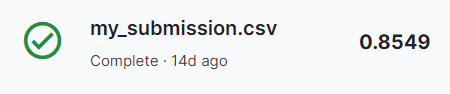